## Inspect Data:
    DataFrame (data in general, shape, NaN values, types, etc)
    Plot all

In [1]:
import pandas as pd
import numpy as np

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.shape, train_df.shape

((4277, 13), (8693, 14))

In [5]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [6]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_df[train_df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
import missingno
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

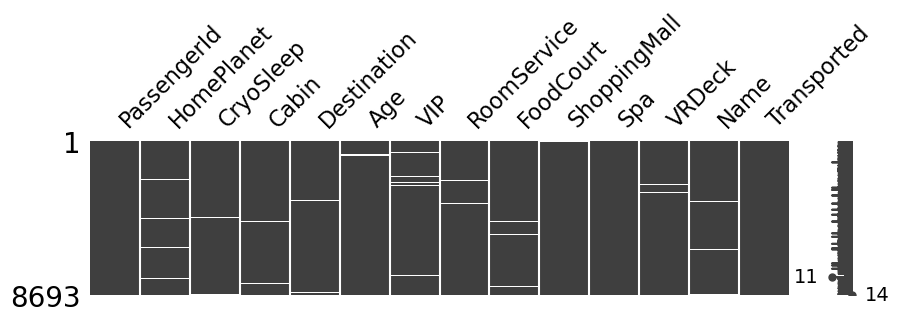

In [9]:
missingno.matrix(train_df, figsize=(10,2));

In [10]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

/tmp/ipykernel_405933/904241863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


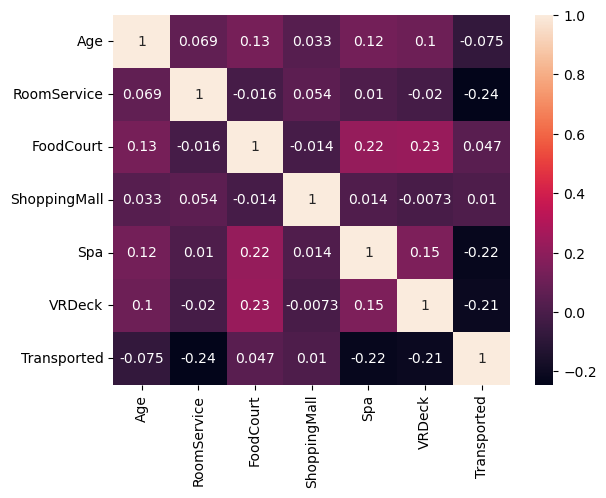

In [11]:
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show();

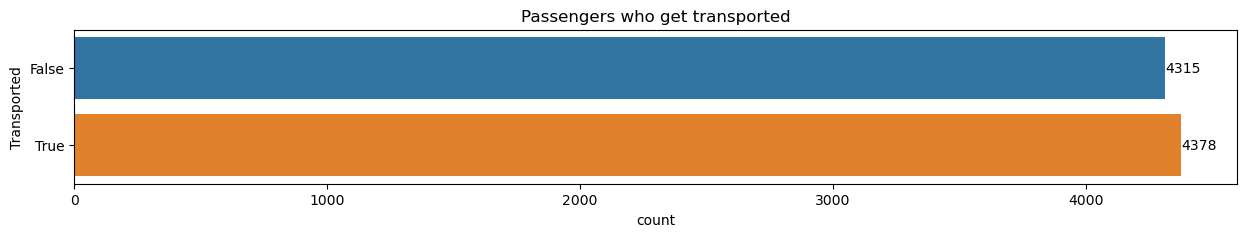

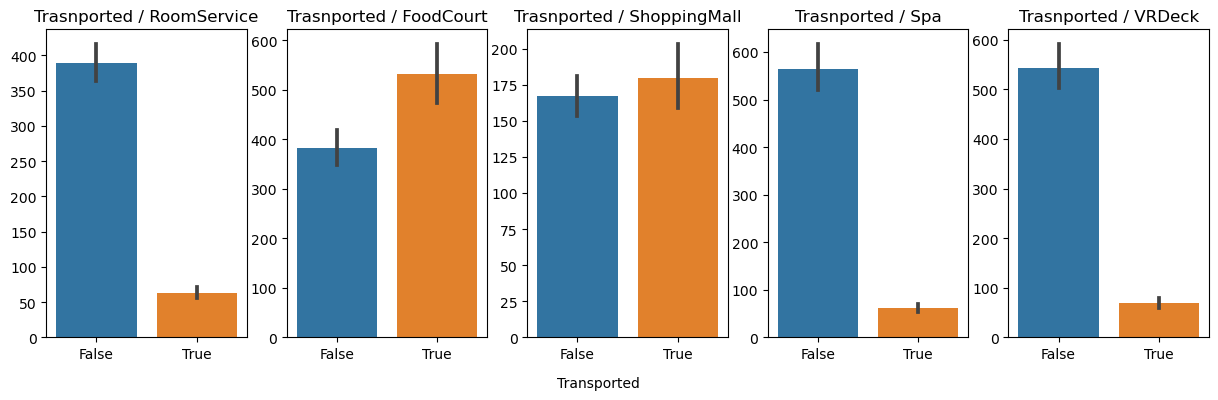

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
counts = train_df['Transported'].value_counts().rename_axis('Transported').reset_index(name='count')
ax1 = sns.barplot(ax=axes, data=counts, x='count', y='Transported', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who get transported')

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
labels = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in range(len(labels)):
    ax = sns.barplot(ax=axes[i], data=train_df, x='Transported', y=labels[i])
    ax.set(title=f'Trasnported / {labels[i]}', ylabel='', xlabel='')
    
plt.text(x=-5, y=-100, s="Transported", size='medium', color='black')
plt.show();

In [13]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

categorical_features = ['HomePlanet', 'Cabin', 'Destination', 'Name']
number_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
number_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', number_transformer, number_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostClassifier())
])

clf_grid = {
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}

cat_grid = {
    'model__loss_function': ['Logloss'],
    'model__n_estimators': [500, 1000],
    'model__learning_rate': [0.5, 0.8],
    'model__max_depth': [None, 4]
}
# Convert bool to 0/1
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mean(), inplace=True)
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'].fillna(train_df['VIP'].mean(), inplace=True)
train_df['VIP'] = train_df['VIP'].astype(int)
train_df['Transported'] = train_df['Transported'].astype(int)

X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#model.fit(X_train, y_train)
#model.score(X_test, y_test)

#r_clf = GridSearchCV(model, clf_grid, cv=5, verbose=0)
#r_clf.fit(X_train, y_train)
#r_clf.score(X_test, y_test)

cat_grs = GridSearchCV(model, cat_grid, cv=5, verbose=0)
cat_grs.fit(X_train, y_train)
cat_grs.score(X_test, y_test)

0:	learn: 0.5795943	total: 18.1ms	remaining: 9.05s
1:	learn: 0.5436199	total: 35.9ms	remaining: 8.93s
2:	learn: 0.5369567	total: 52.9ms	remaining: 8.76s
3:	learn: 0.5324548	total: 69.4ms	remaining: 8.6s
4:	learn: 0.5311982	total: 81ms	remaining: 8.02s
5:	learn: 0.5300135	total: 97.6ms	remaining: 8.03s
6:	learn: 0.5284727	total: 114ms	remaining: 8.06s
7:	learn: 0.5271942	total: 131ms	remaining: 8.07s
8:	learn: 0.5263137	total: 148ms	remaining: 8.06s
9:	learn: 0.5253939	total: 165ms	remaining: 8.07s
10:	learn: 0.5249112	total: 181ms	remaining: 8.06s
11:	learn: 0.5231786	total: 199ms	remaining: 8.08s
12:	learn: 0.5228503	total: 215ms	remaining: 8.06s
13:	learn: 0.5205657	total: 237ms	remaining: 8.23s
14:	learn: 0.5199859	total: 255ms	remaining: 8.24s
15:	learn: 0.5187146	total: 272ms	remaining: 8.23s
16:	learn: 0.5178330	total: 289ms	remaining: 8.2s
17:	learn: 0.5156400	total: 305ms	remaining: 8.18s
18:	learn: 0.5138759	total: 322ms	remaining: 8.15s
19:	learn: 0.5117596	total: 339ms	remai

168:	learn: 0.3562117	total: 3.19s	remaining: 6.25s
169:	learn: 0.3549458	total: 3.21s	remaining: 6.24s
170:	learn: 0.3544501	total: 3.23s	remaining: 6.22s
171:	learn: 0.3539308	total: 3.25s	remaining: 6.2s
172:	learn: 0.3532042	total: 3.27s	remaining: 6.19s
173:	learn: 0.3526708	total: 3.29s	remaining: 6.17s
174:	learn: 0.3521567	total: 3.32s	remaining: 6.16s
175:	learn: 0.3516472	total: 3.33s	remaining: 6.14s
176:	learn: 0.3511853	total: 3.36s	remaining: 6.13s
177:	learn: 0.3507161	total: 3.38s	remaining: 6.11s
178:	learn: 0.3502152	total: 3.39s	remaining: 6.09s
179:	learn: 0.3497465	total: 3.42s	remaining: 6.07s
180:	learn: 0.3492594	total: 3.43s	remaining: 6.05s
181:	learn: 0.3487783	total: 3.45s	remaining: 6.03s
182:	learn: 0.3478347	total: 3.47s	remaining: 6.01s
183:	learn: 0.3471139	total: 3.49s	remaining: 5.99s
184:	learn: 0.3466295	total: 3.51s	remaining: 5.97s
185:	learn: 0.3461461	total: 3.52s	remaining: 5.95s
186:	learn: 0.3454193	total: 3.54s	remaining: 5.93s
187:	learn: 0

331:	learn: 0.2741443	total: 6.34s	remaining: 3.21s
332:	learn: 0.2737997	total: 6.37s	remaining: 3.19s
333:	learn: 0.2734579	total: 6.39s	remaining: 3.17s
334:	learn: 0.2731195	total: 6.41s	remaining: 3.16s
335:	learn: 0.2727341	total: 6.43s	remaining: 3.14s
336:	learn: 0.2723928	total: 6.45s	remaining: 3.12s
337:	learn: 0.2720530	total: 6.48s	remaining: 3.1s
338:	learn: 0.2717120	total: 6.5s	remaining: 3.09s
339:	learn: 0.2711851	total: 6.52s	remaining: 3.07s
340:	learn: 0.2707543	total: 6.54s	remaining: 3.05s
341:	learn: 0.2704433	total: 6.57s	remaining: 3.03s
342:	learn: 0.2700973	total: 6.59s	remaining: 3.02s
343:	learn: 0.2697514	total: 6.61s	remaining: 3s
344:	learn: 0.2694100	total: 6.63s	remaining: 2.98s
345:	learn: 0.2690623	total: 6.65s	remaining: 2.96s
346:	learn: 0.2687231	total: 6.67s	remaining: 2.94s
347:	learn: 0.2683753	total: 6.69s	remaining: 2.92s
348:	learn: 0.2680299	total: 6.71s	remaining: 2.9s
349:	learn: 0.2676963	total: 6.73s	remaining: 2.88s
350:	learn: 0.2673

491:	learn: 0.2194701	total: 9.46s	remaining: 154ms
492:	learn: 0.2192295	total: 9.49s	remaining: 135ms
493:	learn: 0.2189885	total: 9.51s	remaining: 115ms
494:	learn: 0.2187461	total: 9.53s	remaining: 96.3ms
495:	learn: 0.2185068	total: 9.55s	remaining: 77ms
496:	learn: 0.2182798	total: 9.57s	remaining: 57.8ms
497:	learn: 0.2180691	total: 9.6s	remaining: 38.6ms
498:	learn: 0.2178362	total: 9.62s	remaining: 19.3ms
499:	learn: 0.2176037	total: 9.64s	remaining: 0us
0:	learn: 0.5763567	total: 20.9ms	remaining: 10.4s
1:	learn: 0.5460811	total: 42.4ms	remaining: 10.5s
2:	learn: 0.5324777	total: 60.6ms	remaining: 10s
3:	learn: 0.5304627	total: 80.3ms	remaining: 9.95s
4:	learn: 0.5270660	total: 98.3ms	remaining: 9.73s
5:	learn: 0.5253678	total: 118ms	remaining: 9.75s
6:	learn: 0.5233078	total: 128ms	remaining: 9s
7:	learn: 0.5223107	total: 146ms	remaining: 8.99s
8:	learn: 0.5216608	total: 166ms	remaining: 9.07s
9:	learn: 0.5213239	total: 184ms	remaining: 9.02s
10:	learn: 0.5205453	total: 203m

154:	learn: 0.3645657	total: 2.81s	remaining: 6.25s
155:	learn: 0.3640384	total: 2.83s	remaining: 6.23s
156:	learn: 0.3633817	total: 2.84s	remaining: 6.21s
157:	learn: 0.3628638	total: 2.86s	remaining: 6.19s
158:	learn: 0.3621271	total: 2.88s	remaining: 6.17s
159:	learn: 0.3612416	total: 2.9s	remaining: 6.16s
160:	learn: 0.3607113	total: 2.92s	remaining: 6.14s
161:	learn: 0.3601797	total: 2.93s	remaining: 6.12s
162:	learn: 0.3586288	total: 2.95s	remaining: 6.1s
163:	learn: 0.3580787	total: 2.97s	remaining: 6.08s
164:	learn: 0.3575376	total: 2.99s	remaining: 6.06s
165:	learn: 0.3569917	total: 3s	remaining: 6.04s
166:	learn: 0.3564423	total: 3.02s	remaining: 6.03s
167:	learn: 0.3558942	total: 3.04s	remaining: 6.01s
168:	learn: 0.3553703	total: 3.06s	remaining: 5.99s
169:	learn: 0.3548369	total: 3.08s	remaining: 5.97s
170:	learn: 0.3543194	total: 3.1s	remaining: 5.96s
171:	learn: 0.3538112	total: 3.11s	remaining: 5.94s
172:	learn: 0.3533051	total: 3.13s	remaining: 5.92s
173:	learn: 0.3523

320:	learn: 0.2794883	total: 5.8s	remaining: 3.24s
321:	learn: 0.2791661	total: 5.82s	remaining: 3.22s
322:	learn: 0.2788135	total: 5.84s	remaining: 3.2s
323:	learn: 0.2784646	total: 5.86s	remaining: 3.18s
324:	learn: 0.2781408	total: 5.88s	remaining: 3.17s
325:	learn: 0.2777989	total: 5.9s	remaining: 3.15s
326:	learn: 0.2774546	total: 5.91s	remaining: 3.13s
327:	learn: 0.2771106	total: 5.93s	remaining: 3.11s
328:	learn: 0.2767668	total: 5.95s	remaining: 3.09s
329:	learn: 0.2760837	total: 5.97s	remaining: 3.07s
330:	learn: 0.2757393	total: 5.98s	remaining: 3.06s
331:	learn: 0.2753835	total: 6s	remaining: 3.04s
332:	learn: 0.2750417	total: 6.02s	remaining: 3.02s
333:	learn: 0.2746953	total: 6.04s	remaining: 3s
334:	learn: 0.2743156	total: 6.06s	remaining: 2.98s
335:	learn: 0.2739688	total: 6.07s	remaining: 2.96s
336:	learn: 0.2736242	total: 6.09s	remaining: 2.95s
337:	learn: 0.2732784	total: 6.11s	remaining: 2.93s
338:	learn: 0.2729385	total: 6.13s	remaining: 2.91s
339:	learn: 0.2726025

486:	learn: 0.2244533	total: 8.81s	remaining: 235ms
487:	learn: 0.2242138	total: 8.83s	remaining: 217ms
488:	learn: 0.2239754	total: 8.85s	remaining: 199ms
489:	learn: 0.2236527	total: 8.87s	remaining: 181ms
490:	learn: 0.2234151	total: 8.88s	remaining: 163ms
491:	learn: 0.2231805	total: 8.9s	remaining: 145ms
492:	learn: 0.2229479	total: 8.92s	remaining: 127ms
493:	learn: 0.2227180	total: 8.94s	remaining: 109ms
494:	learn: 0.2224882	total: 8.96s	remaining: 90.5ms
495:	learn: 0.2222597	total: 8.97s	remaining: 72.4ms
496:	learn: 0.2220313	total: 8.99s	remaining: 54.3ms
497:	learn: 0.2218198	total: 9.01s	remaining: 36.2ms
498:	learn: 0.2215916	total: 9.03s	remaining: 18.1ms
499:	learn: 0.2210918	total: 9.04s	remaining: 0us
0:	learn: 0.5742786	total: 19.7ms	remaining: 9.85s
1:	learn: 0.5398027	total: 40.6ms	remaining: 10.1s
2:	learn: 0.5319193	total: 58.5ms	remaining: 9.7s
3:	learn: 0.5308001	total: 78.8ms	remaining: 9.77s
4:	learn: 0.5285855	total: 97.6ms	remaining: 9.66s
5:	learn: 0.5276

153:	learn: 0.3641029	total: 3.04s	remaining: 6.83s
154:	learn: 0.3635421	total: 3.06s	remaining: 6.81s
155:	learn: 0.3628667	total: 3.08s	remaining: 6.79s
156:	learn: 0.3623471	total: 3.1s	remaining: 6.77s
157:	learn: 0.3617842	total: 3.12s	remaining: 6.75s
158:	learn: 0.3612210	total: 3.14s	remaining: 6.73s
159:	learn: 0.3606605	total: 3.16s	remaining: 6.71s
160:	learn: 0.3601184	total: 3.18s	remaining: 6.69s
161:	learn: 0.3596261	total: 3.2s	remaining: 6.67s
162:	learn: 0.3590999	total: 3.21s	remaining: 6.64s
163:	learn: 0.3585585	total: 3.23s	remaining: 6.63s
164:	learn: 0.3580206	total: 3.25s	remaining: 6.61s
165:	learn: 0.3575213	total: 3.28s	remaining: 6.59s
166:	learn: 0.3569973	total: 3.29s	remaining: 6.57s
167:	learn: 0.3564800	total: 3.32s	remaining: 6.55s
168:	learn: 0.3558701	total: 3.33s	remaining: 6.53s
169:	learn: 0.3553591	total: 3.36s	remaining: 6.51s
170:	learn: 0.3548450	total: 3.37s	remaining: 6.49s
171:	learn: 0.3543325	total: 3.39s	remaining: 6.47s
172:	learn: 0.

318:	learn: 0.2836278	total: 6.28s	remaining: 3.56s
319:	learn: 0.2832728	total: 6.3s	remaining: 3.54s
320:	learn: 0.2824114	total: 6.32s	remaining: 3.52s
321:	learn: 0.2820326	total: 6.34s	remaining: 3.5s
322:	learn: 0.2817206	total: 6.36s	remaining: 3.48s
323:	learn: 0.2813658	total: 6.38s	remaining: 3.46s
324:	learn: 0.2810243	total: 6.39s	remaining: 3.44s
325:	learn: 0.2806841	total: 6.42s	remaining: 3.42s
326:	learn: 0.2801115	total: 6.44s	remaining: 3.4s
327:	learn: 0.2797706	total: 6.46s	remaining: 3.39s
328:	learn: 0.2792975	total: 6.47s	remaining: 3.37s
329:	learn: 0.2789572	total: 6.5s	remaining: 3.35s
330:	learn: 0.2786163	total: 6.52s	remaining: 3.33s
331:	learn: 0.2782760	total: 6.54s	remaining: 3.31s
332:	learn: 0.2777704	total: 6.55s	remaining: 3.29s
333:	learn: 0.2774299	total: 6.57s	remaining: 3.27s
334:	learn: 0.2770895	total: 6.59s	remaining: 3.25s
335:	learn: 0.2767492	total: 6.61s	remaining: 3.23s
336:	learn: 0.2764139	total: 6.63s	remaining: 3.21s
337:	learn: 0.27

479:	learn: 0.2258230	total: 9.46s	remaining: 394ms
480:	learn: 0.2253568	total: 9.48s	remaining: 375ms
481:	learn: 0.2250934	total: 9.51s	remaining: 355ms
482:	learn: 0.2248358	total: 9.53s	remaining: 335ms
483:	learn: 0.2245811	total: 9.55s	remaining: 316ms
484:	learn: 0.2243287	total: 9.57s	remaining: 296ms
485:	learn: 0.2240775	total: 9.59s	remaining: 276ms
486:	learn: 0.2237807	total: 9.61s	remaining: 256ms
487:	learn: 0.2235318	total: 9.63s	remaining: 237ms
488:	learn: 0.2232796	total: 9.64s	remaining: 217ms
489:	learn: 0.2230268	total: 9.66s	remaining: 197ms
490:	learn: 0.2227748	total: 9.69s	remaining: 178ms
491:	learn: 0.2225226	total: 9.71s	remaining: 158ms
492:	learn: 0.2222698	total: 9.73s	remaining: 138ms
493:	learn: 0.2220179	total: 9.75s	remaining: 118ms
494:	learn: 0.2217661	total: 9.77s	remaining: 98.7ms
495:	learn: 0.2215152	total: 9.79s	remaining: 79ms
496:	learn: 0.2212681	total: 9.82s	remaining: 59.3ms
497:	learn: 0.2205844	total: 9.85s	remaining: 39.6ms
498:	learn

147:	learn: 0.3680321	total: 2.96s	remaining: 7.04s
148:	learn: 0.3674133	total: 2.98s	remaining: 7.02s
149:	learn: 0.3668392	total: 3s	remaining: 7s
150:	learn: 0.3662581	total: 3.02s	remaining: 6.98s
151:	learn: 0.3656455	total: 3.04s	remaining: 6.95s
152:	learn: 0.3647254	total: 3.06s	remaining: 6.93s
153:	learn: 0.3641531	total: 3.07s	remaining: 6.91s
154:	learn: 0.3635933	total: 3.09s	remaining: 6.88s
155:	learn: 0.3630375	total: 3.11s	remaining: 6.86s
156:	learn: 0.3624860	total: 3.13s	remaining: 6.85s
157:	learn: 0.3619516	total: 3.15s	remaining: 6.83s
158:	learn: 0.3614228	total: 3.18s	remaining: 6.82s
159:	learn: 0.3607833	total: 3.2s	remaining: 6.8s
160:	learn: 0.3602578	total: 3.22s	remaining: 6.78s
161:	learn: 0.3591238	total: 3.24s	remaining: 6.76s
162:	learn: 0.3585921	total: 3.26s	remaining: 6.74s
163:	learn: 0.3580696	total: 3.28s	remaining: 6.72s
164:	learn: 0.3575572	total: 3.3s	remaining: 6.69s
165:	learn: 0.3568835	total: 3.31s	remaining: 6.67s
166:	learn: 0.3564170

310:	learn: 0.2822798	total: 6.66s	remaining: 4.04s
311:	learn: 0.2819130	total: 6.69s	remaining: 4.03s
312:	learn: 0.2815535	total: 6.72s	remaining: 4.01s
313:	learn: 0.2809126	total: 6.74s	remaining: 3.99s
314:	learn: 0.2805538	total: 6.77s	remaining: 3.98s
315:	learn: 0.2801339	total: 6.79s	remaining: 3.96s
316:	learn: 0.2797808	total: 6.82s	remaining: 3.94s
317:	learn: 0.2794684	total: 6.84s	remaining: 3.92s
318:	learn: 0.2791200	total: 6.87s	remaining: 3.9s
319:	learn: 0.2787727	total: 6.89s	remaining: 3.88s
320:	learn: 0.2784296	total: 6.91s	remaining: 3.85s
321:	learn: 0.2780877	total: 6.93s	remaining: 3.83s
322:	learn: 0.2777470	total: 6.96s	remaining: 3.82s
323:	learn: 0.2774103	total: 6.99s	remaining: 3.8s
324:	learn: 0.2770729	total: 7.01s	remaining: 3.78s
325:	learn: 0.2767352	total: 7.04s	remaining: 3.76s
326:	learn: 0.2762912	total: 7.06s	remaining: 3.73s
327:	learn: 0.2759546	total: 7.09s	remaining: 3.72s
328:	learn: 0.2754939	total: 7.11s	remaining: 3.7s
329:	learn: 0.2

472:	learn: 0.2245858	total: 10.5s	remaining: 601ms
473:	learn: 0.2243319	total: 10.6s	remaining: 579ms
474:	learn: 0.2240772	total: 10.6s	remaining: 556ms
475:	learn: 0.2238217	total: 10.6s	remaining: 534ms
476:	learn: 0.2231058	total: 10.6s	remaining: 512ms
477:	learn: 0.2228476	total: 10.6s	remaining: 490ms
478:	learn: 0.2224653	total: 10.7s	remaining: 468ms
479:	learn: 0.2222184	total: 10.7s	remaining: 446ms
480:	learn: 0.2219662	total: 10.7s	remaining: 423ms
481:	learn: 0.2217237	total: 10.7s	remaining: 401ms
482:	learn: 0.2214833	total: 10.8s	remaining: 379ms
483:	learn: 0.2212398	total: 10.8s	remaining: 357ms
484:	learn: 0.2210043	total: 10.8s	remaining: 335ms
485:	learn: 0.2206674	total: 10.9s	remaining: 313ms
486:	learn: 0.2204356	total: 10.9s	remaining: 291ms
487:	learn: 0.2202062	total: 10.9s	remaining: 268ms
488:	learn: 0.2199432	total: 10.9s	remaining: 246ms
489:	learn: 0.2197164	total: 10.9s	remaining: 223ms
490:	learn: 0.2194925	total: 11s	remaining: 201ms
491:	learn: 0.

135:	learn: 0.3848086	total: 3s	remaining: 8.02s
136:	learn: 0.3839171	total: 3.02s	remaining: 7.99s
137:	learn: 0.3833202	total: 3.03s	remaining: 7.96s
138:	learn: 0.3827397	total: 3.05s	remaining: 7.93s
139:	learn: 0.3822051	total: 3.07s	remaining: 7.9s
140:	learn: 0.3816296	total: 3.09s	remaining: 7.88s
141:	learn: 0.3800302	total: 3.12s	remaining: 7.86s
142:	learn: 0.3791347	total: 3.14s	remaining: 7.83s
143:	learn: 0.3783268	total: 3.16s	remaining: 7.81s
144:	learn: 0.3777242	total: 3.18s	remaining: 7.78s
145:	learn: 0.3771311	total: 3.2s	remaining: 7.75s
146:	learn: 0.3765694	total: 3.22s	remaining: 7.73s
147:	learn: 0.3760067	total: 3.24s	remaining: 7.7s
148:	learn: 0.3754827	total: 3.26s	remaining: 7.68s
149:	learn: 0.3748418	total: 3.28s	remaining: 7.65s
150:	learn: 0.3742905	total: 3.3s	remaining: 7.62s
151:	learn: 0.3737448	total: 3.32s	remaining: 7.6s
152:	learn: 0.3732063	total: 3.34s	remaining: 7.58s
153:	learn: 0.3726674	total: 3.37s	remaining: 7.56s
154:	learn: 0.372068

295:	learn: 0.2967549	total: 6.35s	remaining: 4.38s
296:	learn: 0.2963683	total: 6.38s	remaining: 4.36s
297:	learn: 0.2959944	total: 6.4s	remaining: 4.34s
298:	learn: 0.2943838	total: 6.42s	remaining: 4.32s
299:	learn: 0.2939932	total: 6.44s	remaining: 4.29s
300:	learn: 0.2934046	total: 6.46s	remaining: 4.27s
301:	learn: 0.2930310	total: 6.48s	remaining: 4.25s
302:	learn: 0.2926423	total: 6.5s	remaining: 4.23s
303:	learn: 0.2922533	total: 6.53s	remaining: 4.21s
304:	learn: 0.2918960	total: 6.55s	remaining: 4.19s
305:	learn: 0.2915441	total: 6.59s	remaining: 4.18s
306:	learn: 0.2911527	total: 6.62s	remaining: 4.16s
307:	learn: 0.2907622	total: 6.64s	remaining: 4.14s
308:	learn: 0.2903713	total: 6.66s	remaining: 4.12s
309:	learn: 0.2896679	total: 6.69s	remaining: 4.1s
310:	learn: 0.2892766	total: 6.72s	remaining: 4.08s
311:	learn: 0.2888843	total: 6.74s	remaining: 4.06s
312:	learn: 0.2884925	total: 6.76s	remaining: 4.04s
313:	learn: 0.2880909	total: 6.79s	remaining: 4.02s
314:	learn: 0.2

458:	learn: 0.2376465	total: 9.99s	remaining: 893ms
459:	learn: 0.2373902	total: 10s	remaining: 871ms
460:	learn: 0.2371329	total: 10s	remaining: 849ms
461:	learn: 0.2368759	total: 10.1s	remaining: 828ms
462:	learn: 0.2366189	total: 10.1s	remaining: 806ms
463:	learn: 0.2363624	total: 10.1s	remaining: 784ms
464:	learn: 0.2361073	total: 10.1s	remaining: 763ms
465:	learn: 0.2358532	total: 10.2s	remaining: 741ms
466:	learn: 0.2355981	total: 10.2s	remaining: 719ms
467:	learn: 0.2353429	total: 10.2s	remaining: 698ms
468:	learn: 0.2348271	total: 10.2s	remaining: 676ms
469:	learn: 0.2345702	total: 10.2s	remaining: 654ms
470:	learn: 0.2343127	total: 10.3s	remaining: 632ms
471:	learn: 0.2340562	total: 10.3s	remaining: 611ms
472:	learn: 0.2337981	total: 10.3s	remaining: 589ms
473:	learn: 0.2335411	total: 10.3s	remaining: 567ms
474:	learn: 0.2333142	total: 10.4s	remaining: 545ms
475:	learn: 0.2330560	total: 10.4s	remaining: 523ms
476:	learn: 0.2327980	total: 10.4s	remaining: 501ms
477:	learn: 0.23

119:	learn: 0.3893854	total: 2.6s	remaining: 19s
120:	learn: 0.3887656	total: 2.62s	remaining: 19s
121:	learn: 0.3881451	total: 2.63s	remaining: 19s
122:	learn: 0.3875187	total: 2.65s	remaining: 18.9s
123:	learn: 0.3869633	total: 2.67s	remaining: 18.9s
124:	learn: 0.3863532	total: 2.69s	remaining: 18.9s
125:	learn: 0.3857373	total: 2.71s	remaining: 18.8s
126:	learn: 0.3851293	total: 2.73s	remaining: 18.8s
127:	learn: 0.3845390	total: 2.75s	remaining: 18.7s
128:	learn: 0.3839627	total: 2.77s	remaining: 18.7s
129:	learn: 0.3833848	total: 2.79s	remaining: 18.7s
130:	learn: 0.3813971	total: 2.81s	remaining: 18.6s
131:	learn: 0.3798501	total: 2.83s	remaining: 18.6s
132:	learn: 0.3792671	total: 2.85s	remaining: 18.6s
133:	learn: 0.3786461	total: 2.87s	remaining: 18.5s
134:	learn: 0.3781173	total: 2.88s	remaining: 18.5s
135:	learn: 0.3772908	total: 2.9s	remaining: 18.5s
136:	learn: 0.3766980	total: 2.92s	remaining: 18.4s
137:	learn: 0.3761331	total: 2.94s	remaining: 18.4s
138:	learn: 0.375564

284:	learn: 0.2958096	total: 5.96s	remaining: 14.9s
285:	learn: 0.2954100	total: 5.97s	remaining: 14.9s
286:	learn: 0.2950097	total: 5.99s	remaining: 14.9s
287:	learn: 0.2946080	total: 6.01s	remaining: 14.9s
288:	learn: 0.2942078	total: 6.04s	remaining: 14.9s
289:	learn: 0.2938075	total: 6.06s	remaining: 14.8s
290:	learn: 0.2934064	total: 6.08s	remaining: 14.8s
291:	learn: 0.2930046	total: 6.1s	remaining: 14.8s
292:	learn: 0.2926109	total: 6.12s	remaining: 14.8s
293:	learn: 0.2906707	total: 6.14s	remaining: 14.8s
294:	learn: 0.2902219	total: 6.17s	remaining: 14.7s
295:	learn: 0.2898062	total: 6.19s	remaining: 14.7s
296:	learn: 0.2893907	total: 6.21s	remaining: 14.7s
297:	learn: 0.2889574	total: 6.23s	remaining: 14.7s
298:	learn: 0.2885412	total: 6.25s	remaining: 14.7s
299:	learn: 0.2881273	total: 6.27s	remaining: 14.6s
300:	learn: 0.2877112	total: 6.29s	remaining: 14.6s
301:	learn: 0.2872940	total: 6.3s	remaining: 14.6s
302:	learn: 0.2868799	total: 6.33s	remaining: 14.6s
303:	learn: 0.

452:	learn: 0.2328100	total: 9.33s	remaining: 11.3s
453:	learn: 0.2325432	total: 9.35s	remaining: 11.2s
454:	learn: 0.2322773	total: 9.37s	remaining: 11.2s
455:	learn: 0.2320123	total: 9.39s	remaining: 11.2s
456:	learn: 0.2308341	total: 9.4s	remaining: 11.2s
457:	learn: 0.2303341	total: 9.42s	remaining: 11.2s
458:	learn: 0.2300598	total: 9.44s	remaining: 11.1s
459:	learn: 0.2297824	total: 9.46s	remaining: 11.1s
460:	learn: 0.2293894	total: 9.47s	remaining: 11.1s
461:	learn: 0.2291122	total: 9.49s	remaining: 11.1s
462:	learn: 0.2288416	total: 9.51s	remaining: 11s
463:	learn: 0.2285646	total: 9.53s	remaining: 11s
464:	learn: 0.2282878	total: 9.55s	remaining: 11s
465:	learn: 0.2280106	total: 9.57s	remaining: 11s
466:	learn: 0.2277331	total: 9.59s	remaining: 10.9s
467:	learn: 0.2274599	total: 9.61s	remaining: 10.9s
468:	learn: 0.2271888	total: 9.63s	remaining: 10.9s
469:	learn: 0.2269177	total: 9.65s	remaining: 10.9s
470:	learn: 0.2266460	total: 9.67s	remaining: 10.9s
471:	learn: 0.2263782

618:	learn: 0.1890887	total: 12.5s	remaining: 7.68s
619:	learn: 0.1888946	total: 12.5s	remaining: 7.67s
620:	learn: 0.1887019	total: 12.5s	remaining: 7.65s
621:	learn: 0.1885088	total: 12.6s	remaining: 7.63s
622:	learn: 0.1883151	total: 12.6s	remaining: 7.61s
623:	learn: 0.1881217	total: 12.6s	remaining: 7.59s
624:	learn: 0.1879306	total: 12.6s	remaining: 7.57s
625:	learn: 0.1877481	total: 12.6s	remaining: 7.55s
626:	learn: 0.1875658	total: 12.7s	remaining: 7.54s
627:	learn: 0.1873838	total: 12.7s	remaining: 7.52s
628:	learn: 0.1871183	total: 12.7s	remaining: 7.5s
629:	learn: 0.1869404	total: 12.7s	remaining: 7.48s
630:	learn: 0.1867609	total: 12.8s	remaining: 7.46s
631:	learn: 0.1865798	total: 12.8s	remaining: 7.44s
632:	learn: 0.1863994	total: 12.8s	remaining: 7.42s
633:	learn: 0.1862237	total: 12.8s	remaining: 7.4s
634:	learn: 0.1860491	total: 12.8s	remaining: 7.39s
635:	learn: 0.1858751	total: 12.9s	remaining: 7.37s
636:	learn: 0.1852924	total: 12.9s	remaining: 7.35s
637:	learn: 0.

780:	learn: 0.1586982	total: 15.7s	remaining: 4.39s
781:	learn: 0.1585606	total: 15.7s	remaining: 4.38s
782:	learn: 0.1584236	total: 15.7s	remaining: 4.35s
783:	learn: 0.1582869	total: 15.7s	remaining: 4.33s
784:	learn: 0.1581495	total: 15.7s	remaining: 4.31s
785:	learn: 0.1580118	total: 15.8s	remaining: 4.29s
786:	learn: 0.1578338	total: 15.8s	remaining: 4.27s
787:	learn: 0.1576983	total: 15.8s	remaining: 4.25s
788:	learn: 0.1575648	total: 15.8s	remaining: 4.23s
789:	learn: 0.1570579	total: 15.8s	remaining: 4.21s
790:	learn: 0.1569213	total: 15.9s	remaining: 4.19s
791:	learn: 0.1567811	total: 15.9s	remaining: 4.17s
792:	learn: 0.1566439	total: 15.9s	remaining: 4.15s
793:	learn: 0.1565083	total: 15.9s	remaining: 4.13s
794:	learn: 0.1563736	total: 15.9s	remaining: 4.11s
795:	learn: 0.1562391	total: 15.9s	remaining: 4.09s
796:	learn: 0.1561049	total: 16s	remaining: 4.07s
797:	learn: 0.1559702	total: 16s	remaining: 4.05s
798:	learn: 0.1558374	total: 16s	remaining: 4.03s
799:	learn: 0.1557

947:	learn: 0.1344221	total: 18.8s	remaining: 1.03s
948:	learn: 0.1343184	total: 18.9s	remaining: 1.01s
949:	learn: 0.1342154	total: 18.9s	remaining: 993ms
950:	learn: 0.1341125	total: 18.9s	remaining: 974ms
951:	learn: 0.1340098	total: 18.9s	remaining: 954ms
952:	learn: 0.1339068	total: 18.9s	remaining: 934ms
953:	learn: 0.1338047	total: 19s	remaining: 914ms
954:	learn: 0.1337025	total: 19s	remaining: 894ms
955:	learn: 0.1335997	total: 19s	remaining: 874ms
956:	learn: 0.1334971	total: 19s	remaining: 855ms
957:	learn: 0.1333937	total: 19s	remaining: 835ms
958:	learn: 0.1332902	total: 19.1s	remaining: 815ms
959:	learn: 0.1331886	total: 19.1s	remaining: 795ms
960:	learn: 0.1330613	total: 19.1s	remaining: 775ms
961:	learn: 0.1329608	total: 19.1s	remaining: 755ms
962:	learn: 0.1328550	total: 19.1s	remaining: 735ms
963:	learn: 0.1327547	total: 19.2s	remaining: 716ms
964:	learn: 0.1326560	total: 19.2s	remaining: 696ms
965:	learn: 0.1325606	total: 19.2s	remaining: 676ms
966:	learn: 0.1324622	

111:	learn: 0.3948928	total: 2.35s	remaining: 18.6s
112:	learn: 0.3942787	total: 2.38s	remaining: 18.6s
113:	learn: 0.3936676	total: 2.4s	remaining: 18.6s
114:	learn: 0.3929188	total: 2.42s	remaining: 18.6s
115:	learn: 0.3923010	total: 2.44s	remaining: 18.6s
116:	learn: 0.3911967	total: 2.46s	remaining: 18.6s
117:	learn: 0.3901200	total: 2.48s	remaining: 18.5s
118:	learn: 0.3895053	total: 2.5s	remaining: 18.5s
119:	learn: 0.3889005	total: 2.52s	remaining: 18.5s
120:	learn: 0.3876254	total: 2.54s	remaining: 18.4s
121:	learn: 0.3869830	total: 2.56s	remaining: 18.4s
122:	learn: 0.3863613	total: 2.58s	remaining: 18.4s
123:	learn: 0.3857564	total: 2.59s	remaining: 18.3s
124:	learn: 0.3851595	total: 2.61s	remaining: 18.3s
125:	learn: 0.3846119	total: 2.63s	remaining: 18.2s
126:	learn: 0.3839732	total: 2.65s	remaining: 18.2s
127:	learn: 0.3833777	total: 2.67s	remaining: 18.2s
128:	learn: 0.3827730	total: 2.69s	remaining: 18.2s
129:	learn: 0.3818281	total: 2.71s	remaining: 18.2s
130:	learn: 0.

274:	learn: 0.2999377	total: 5.71s	remaining: 15.1s
275:	learn: 0.2995340	total: 5.73s	remaining: 15s
276:	learn: 0.2989374	total: 5.75s	remaining: 15s
277:	learn: 0.2985350	total: 5.77s	remaining: 15s
278:	learn: 0.2981361	total: 5.79s	remaining: 14.9s
279:	learn: 0.2977334	total: 5.8s	remaining: 14.9s
280:	learn: 0.2973295	total: 5.82s	remaining: 14.9s
281:	learn: 0.2969276	total: 5.84s	remaining: 14.9s
282:	learn: 0.2965233	total: 5.86s	remaining: 14.8s
283:	learn: 0.2961193	total: 5.87s	remaining: 14.8s
284:	learn: 0.2957155	total: 5.89s	remaining: 14.8s
285:	learn: 0.2953107	total: 5.91s	remaining: 14.8s
286:	learn: 0.2949054	total: 5.93s	remaining: 14.7s
287:	learn: 0.2944993	total: 5.95s	remaining: 14.7s
288:	learn: 0.2940931	total: 5.96s	remaining: 14.7s
289:	learn: 0.2936865	total: 5.98s	remaining: 14.6s
290:	learn: 0.2926338	total: 6s	remaining: 14.6s
291:	learn: 0.2922038	total: 6.02s	remaining: 14.6s
292:	learn: 0.2917879	total: 6.04s	remaining: 14.6s
293:	learn: 0.2913866	

433:	learn: 0.2411432	total: 8.89s	remaining: 11.6s
434:	learn: 0.2408854	total: 8.91s	remaining: 11.6s
435:	learn: 0.2406270	total: 8.94s	remaining: 11.6s
436:	learn: 0.2403684	total: 8.96s	remaining: 11.5s
437:	learn: 0.2401095	total: 8.98s	remaining: 11.5s
438:	learn: 0.2398511	total: 9s	remaining: 11.5s
439:	learn: 0.2389401	total: 9.02s	remaining: 11.5s
440:	learn: 0.2386966	total: 9.04s	remaining: 11.5s
441:	learn: 0.2384387	total: 9.06s	remaining: 11.4s
442:	learn: 0.2381723	total: 9.08s	remaining: 11.4s
443:	learn: 0.2379063	total: 9.1s	remaining: 11.4s
444:	learn: 0.2376426	total: 9.12s	remaining: 11.4s
445:	learn: 0.2373769	total: 9.14s	remaining: 11.4s
446:	learn: 0.2371122	total: 9.16s	remaining: 11.3s
447:	learn: 0.2368472	total: 9.18s	remaining: 11.3s
448:	learn: 0.2365817	total: 9.2s	remaining: 11.3s
449:	learn: 0.2363156	total: 9.21s	remaining: 11.3s
450:	learn: 0.2360849	total: 9.23s	remaining: 11.2s
451:	learn: 0.2358187	total: 9.25s	remaining: 11.2s
452:	learn: 0.235

600:	learn: 0.1940740	total: 12s	remaining: 7.99s
601:	learn: 0.1938846	total: 12.1s	remaining: 7.97s
602:	learn: 0.1936940	total: 12.1s	remaining: 7.95s
603:	learn: 0.1935096	total: 12.1s	remaining: 7.92s
604:	learn: 0.1933276	total: 12.1s	remaining: 7.9s
605:	learn: 0.1931136	total: 12.1s	remaining: 7.88s
606:	learn: 0.1927773	total: 12.1s	remaining: 7.86s
607:	learn: 0.1925718	total: 12.2s	remaining: 7.83s
608:	learn: 0.1923852	total: 12.2s	remaining: 7.81s
609:	learn: 0.1922018	total: 12.2s	remaining: 7.79s
610:	learn: 0.1920205	total: 12.2s	remaining: 7.77s
611:	learn: 0.1918385	total: 12.2s	remaining: 7.75s
612:	learn: 0.1911788	total: 12.2s	remaining: 7.73s
613:	learn: 0.1910083	total: 12.3s	remaining: 7.71s
614:	learn: 0.1907280	total: 12.3s	remaining: 7.69s
615:	learn: 0.1905450	total: 12.3s	remaining: 7.67s
616:	learn: 0.1903622	total: 12.3s	remaining: 7.64s
617:	learn: 0.1901799	total: 12.3s	remaining: 7.62s
618:	learn: 0.1899960	total: 12.3s	remaining: 7.6s
619:	learn: 0.18

766:	learn: 0.1613230	total: 15.4s	remaining: 4.68s
767:	learn: 0.1611884	total: 15.4s	remaining: 4.66s
768:	learn: 0.1610536	total: 15.5s	remaining: 4.64s
769:	learn: 0.1609185	total: 15.5s	remaining: 4.62s
770:	learn: 0.1607840	total: 15.5s	remaining: 4.6s
771:	learn: 0.1606326	total: 15.5s	remaining: 4.58s
772:	learn: 0.1604987	total: 15.5s	remaining: 4.56s
773:	learn: 0.1603648	total: 15.6s	remaining: 4.54s
774:	learn: 0.1602315	total: 15.6s	remaining: 4.52s
775:	learn: 0.1601012	total: 15.6s	remaining: 4.5s
776:	learn: 0.1599821	total: 15.6s	remaining: 4.48s
777:	learn: 0.1598496	total: 15.6s	remaining: 4.46s
778:	learn: 0.1597169	total: 15.7s	remaining: 4.44s
779:	learn: 0.1595848	total: 15.7s	remaining: 4.42s
780:	learn: 0.1594531	total: 15.7s	remaining: 4.4s
781:	learn: 0.1593154	total: 15.7s	remaining: 4.38s
782:	learn: 0.1591835	total: 15.7s	remaining: 4.36s
783:	learn: 0.1590526	total: 15.7s	remaining: 4.34s
784:	learn: 0.1589198	total: 15.8s	remaining: 4.32s
785:	learn: 0.1

929:	learn: 0.1386603	total: 18.8s	remaining: 1.42s
930:	learn: 0.1385601	total: 18.9s	remaining: 1.4s
931:	learn: 0.1383784	total: 18.9s	remaining: 1.38s
932:	learn: 0.1382797	total: 18.9s	remaining: 1.36s
933:	learn: 0.1381817	total: 18.9s	remaining: 1.34s
934:	learn: 0.1380831	total: 18.9s	remaining: 1.32s
935:	learn: 0.1379627	total: 19s	remaining: 1.29s
936:	learn: 0.1378638	total: 19s	remaining: 1.27s
937:	learn: 0.1377660	total: 19s	remaining: 1.25s
938:	learn: 0.1376699	total: 19s	remaining: 1.24s
939:	learn: 0.1375723	total: 19s	remaining: 1.22s
940:	learn: 0.1374730	total: 19.1s	remaining: 1.2s
941:	learn: 0.1370565	total: 19.1s	remaining: 1.18s
942:	learn: 0.1369423	total: 19.1s	remaining: 1.16s
943:	learn: 0.1365533	total: 19.1s	remaining: 1.13s
944:	learn: 0.1364374	total: 19.2s	remaining: 1.11s
945:	learn: 0.1363359	total: 19.2s	remaining: 1.09s
946:	learn: 0.1362331	total: 19.2s	remaining: 1.07s
947:	learn: 0.1361311	total: 19.2s	remaining: 1.05s
948:	learn: 0.1360292	to

99:	learn: 0.4044642	total: 1.92s	remaining: 17.3s
100:	learn: 0.4037257	total: 1.94s	remaining: 17.3s
101:	learn: 0.4029681	total: 1.96s	remaining: 17.2s
102:	learn: 0.4022611	total: 1.98s	remaining: 17.2s
103:	learn: 0.4015693	total: 1.99s	remaining: 17.2s
104:	learn: 0.4008845	total: 2.01s	remaining: 17.2s
105:	learn: 0.4001144	total: 2.03s	remaining: 17.1s
106:	learn: 0.3989665	total: 2.05s	remaining: 17.1s
107:	learn: 0.3982934	total: 2.07s	remaining: 17.1s
108:	learn: 0.3975847	total: 2.08s	remaining: 17s
109:	learn: 0.3963911	total: 2.1s	remaining: 17s
110:	learn: 0.3959887	total: 2.12s	remaining: 17s
111:	learn: 0.3953750	total: 2.14s	remaining: 17s
112:	learn: 0.3947352	total: 2.16s	remaining: 17s
113:	learn: 0.3938111	total: 2.18s	remaining: 16.9s
114:	learn: 0.3931731	total: 2.2s	remaining: 16.9s
115:	learn: 0.3925514	total: 2.21s	remaining: 16.9s
116:	learn: 0.3915664	total: 2.23s	remaining: 16.9s
117:	learn: 0.3909673	total: 2.25s	remaining: 16.8s
118:	learn: 0.3903442	tot

266:	learn: 0.3078926	total: 5.05s	remaining: 13.9s
267:	learn: 0.3074928	total: 5.07s	remaining: 13.9s
268:	learn: 0.3070939	total: 5.09s	remaining: 13.8s
269:	learn: 0.3057972	total: 5.11s	remaining: 13.8s
270:	learn: 0.3054114	total: 5.13s	remaining: 13.8s
271:	learn: 0.3049962	total: 5.15s	remaining: 13.8s
272:	learn: 0.3045812	total: 5.17s	remaining: 13.8s
273:	learn: 0.3041644	total: 5.18s	remaining: 13.7s
274:	learn: 0.3037482	total: 5.2s	remaining: 13.7s
275:	learn: 0.3033321	total: 5.22s	remaining: 13.7s
276:	learn: 0.3029142	total: 5.24s	remaining: 13.7s
277:	learn: 0.3024955	total: 5.26s	remaining: 13.7s
278:	learn: 0.3020774	total: 5.29s	remaining: 13.7s
279:	learn: 0.3016588	total: 5.3s	remaining: 13.6s
280:	learn: 0.3012398	total: 5.32s	remaining: 13.6s
281:	learn: 0.3008201	total: 5.34s	remaining: 13.6s
282:	learn: 0.3004016	total: 5.36s	remaining: 13.6s
283:	learn: 0.2999849	total: 5.38s	remaining: 13.6s
284:	learn: 0.2995671	total: 5.4s	remaining: 13.5s
285:	learn: 0.2

431:	learn: 0.2406789	total: 8.22s	remaining: 10.8s
432:	learn: 0.2404211	total: 8.24s	remaining: 10.8s
433:	learn: 0.2401611	total: 8.26s	remaining: 10.8s
434:	learn: 0.2396603	total: 8.28s	remaining: 10.8s
435:	learn: 0.2393911	total: 8.3s	remaining: 10.7s
436:	learn: 0.2391270	total: 8.32s	remaining: 10.7s
437:	learn: 0.2388651	total: 8.34s	remaining: 10.7s
438:	learn: 0.2386008	total: 8.36s	remaining: 10.7s
439:	learn: 0.2383358	total: 8.37s	remaining: 10.7s
440:	learn: 0.2380726	total: 8.39s	remaining: 10.6s
441:	learn: 0.2378075	total: 8.41s	remaining: 10.6s
442:	learn: 0.2375423	total: 8.43s	remaining: 10.6s
443:	learn: 0.2372775	total: 8.45s	remaining: 10.6s
444:	learn: 0.2370115	total: 8.47s	remaining: 10.6s
445:	learn: 0.2365580	total: 8.49s	remaining: 10.5s
446:	learn: 0.2362920	total: 8.51s	remaining: 10.5s
447:	learn: 0.2360302	total: 8.52s	remaining: 10.5s
448:	learn: 0.2357643	total: 8.54s	remaining: 10.5s
449:	learn: 0.2352698	total: 8.56s	remaining: 10.5s
450:	learn: 0

594:	learn: 0.1970322	total: 11.3s	remaining: 7.72s
595:	learn: 0.1968645	total: 11.4s	remaining: 7.71s
596:	learn: 0.1966858	total: 11.4s	remaining: 7.69s
597:	learn: 0.1965111	total: 11.4s	remaining: 7.67s
598:	learn: 0.1963339	total: 11.4s	remaining: 7.65s
599:	learn: 0.1961633	total: 11.4s	remaining: 7.63s
600:	learn: 0.1956629	total: 11.5s	remaining: 7.61s
601:	learn: 0.1954772	total: 11.5s	remaining: 7.59s
602:	learn: 0.1952888	total: 11.5s	remaining: 7.57s
603:	learn: 0.1951035	total: 11.5s	remaining: 7.55s
604:	learn: 0.1949211	total: 11.5s	remaining: 7.53s
605:	learn: 0.1947356	total: 11.6s	remaining: 7.51s
606:	learn: 0.1945516	total: 11.6s	remaining: 7.49s
607:	learn: 0.1943672	total: 11.6s	remaining: 7.47s
608:	learn: 0.1941927	total: 11.6s	remaining: 7.46s
609:	learn: 0.1940103	total: 11.6s	remaining: 7.44s
610:	learn: 0.1938254	total: 11.7s	remaining: 7.42s
611:	learn: 0.1935191	total: 11.7s	remaining: 7.4s
612:	learn: 0.1933009	total: 11.7s	remaining: 7.38s
613:	learn: 0

758:	learn: 0.1649912	total: 14.5s	remaining: 4.6s
759:	learn: 0.1648573	total: 14.5s	remaining: 4.58s
760:	learn: 0.1647244	total: 14.5s	remaining: 4.56s
761:	learn: 0.1645918	total: 14.5s	remaining: 4.54s
762:	learn: 0.1644577	total: 14.6s	remaining: 4.52s
763:	learn: 0.1643234	total: 14.6s	remaining: 4.5s
764:	learn: 0.1641902	total: 14.6s	remaining: 4.49s
765:	learn: 0.1640566	total: 14.6s	remaining: 4.47s
766:	learn: 0.1639245	total: 14.6s	remaining: 4.45s
767:	learn: 0.1637918	total: 14.7s	remaining: 4.43s
768:	learn: 0.1636376	total: 14.7s	remaining: 4.41s
769:	learn: 0.1635055	total: 14.7s	remaining: 4.39s
770:	learn: 0.1633735	total: 14.7s	remaining: 4.37s
771:	learn: 0.1632411	total: 14.8s	remaining: 4.36s
772:	learn: 0.1630969	total: 14.8s	remaining: 4.34s
773:	learn: 0.1629639	total: 14.8s	remaining: 4.32s
774:	learn: 0.1628310	total: 14.8s	remaining: 4.3s
775:	learn: 0.1626977	total: 14.8s	remaining: 4.28s
776:	learn: 0.1625649	total: 14.8s	remaining: 4.26s
777:	learn: 0.1

922:	learn: 0.1400188	total: 17.6s	remaining: 1.47s
923:	learn: 0.1399186	total: 17.6s	remaining: 1.45s
924:	learn: 0.1397654	total: 17.7s	remaining: 1.43s
925:	learn: 0.1395820	total: 17.7s	remaining: 1.41s
926:	learn: 0.1394825	total: 17.7s	remaining: 1.39s
927:	learn: 0.1393823	total: 17.7s	remaining: 1.37s
928:	learn: 0.1389795	total: 17.7s	remaining: 1.35s
929:	learn: 0.1388609	total: 17.7s	remaining: 1.33s
930:	learn: 0.1387571	total: 17.8s	remaining: 1.32s
931:	learn: 0.1384930	total: 17.8s	remaining: 1.3s
932:	learn: 0.1383657	total: 17.8s	remaining: 1.28s
933:	learn: 0.1382634	total: 17.8s	remaining: 1.26s
934:	learn: 0.1381613	total: 17.8s	remaining: 1.24s
935:	learn: 0.1380589	total: 17.9s	remaining: 1.22s
936:	learn: 0.1379579	total: 17.9s	remaining: 1.2s
937:	learn: 0.1378620	total: 17.9s	remaining: 1.18s
938:	learn: 0.1376643	total: 17.9s	remaining: 1.16s
939:	learn: 0.1375629	total: 17.9s	remaining: 1.15s
940:	learn: 0.1374619	total: 18s	remaining: 1.13s
941:	learn: 0.13

83:	learn: 0.4181017	total: 1.71s	remaining: 18.7s
84:	learn: 0.4173025	total: 1.73s	remaining: 18.7s
85:	learn: 0.4164945	total: 1.75s	remaining: 18.6s
86:	learn: 0.4151817	total: 1.77s	remaining: 18.6s
87:	learn: 0.4143877	total: 1.8s	remaining: 18.6s
88:	learn: 0.4136239	total: 1.82s	remaining: 18.6s
89:	learn: 0.4128906	total: 1.84s	remaining: 18.6s
90:	learn: 0.4121432	total: 1.86s	remaining: 18.6s
91:	learn: 0.4111746	total: 1.88s	remaining: 18.6s
92:	learn: 0.4104439	total: 1.9s	remaining: 18.5s
93:	learn: 0.4097098	total: 1.93s	remaining: 18.6s
94:	learn: 0.4091049	total: 1.95s	remaining: 18.6s
95:	learn: 0.4083786	total: 1.98s	remaining: 18.6s
96:	learn: 0.4075148	total: 2s	remaining: 18.7s
97:	learn: 0.4067357	total: 2.03s	remaining: 18.7s
98:	learn: 0.4060406	total: 2.06s	remaining: 18.7s
99:	learn: 0.4053323	total: 2.08s	remaining: 18.8s
100:	learn: 0.4046279	total: 2.11s	remaining: 18.8s
101:	learn: 0.4039156	total: 2.13s	remaining: 18.8s
102:	learn: 0.4024149	total: 2.16s

244:	learn: 0.3136825	total: 5.35s	remaining: 16.5s
245:	learn: 0.3131936	total: 5.37s	remaining: 16.5s
246:	learn: 0.3127976	total: 5.39s	remaining: 16.4s
247:	learn: 0.3123983	total: 5.42s	remaining: 16.4s
248:	learn: 0.3120062	total: 5.44s	remaining: 16.4s
249:	learn: 0.3116039	total: 5.46s	remaining: 16.4s
250:	learn: 0.3112012	total: 5.48s	remaining: 16.3s
251:	learn: 0.3106666	total: 5.5s	remaining: 16.3s
252:	learn: 0.3102697	total: 5.52s	remaining: 16.3s
253:	learn: 0.3098724	total: 5.54s	remaining: 16.3s
254:	learn: 0.3094471	total: 5.57s	remaining: 16.3s
255:	learn: 0.3090474	total: 5.6s	remaining: 16.3s
256:	learn: 0.3086421	total: 5.63s	remaining: 16.3s
257:	learn: 0.3082445	total: 5.66s	remaining: 16.3s
258:	learn: 0.3078419	total: 5.69s	remaining: 16.3s
259:	learn: 0.3065673	total: 5.71s	remaining: 16.3s
260:	learn: 0.3061666	total: 5.74s	remaining: 16.2s
261:	learn: 0.3057499	total: 5.76s	remaining: 16.2s
262:	learn: 0.3053333	total: 5.78s	remaining: 16.2s
263:	learn: 0.

403:	learn: 0.2477183	total: 8.98s	remaining: 13.2s
404:	learn: 0.2474574	total: 9s	remaining: 13.2s
405:	learn: 0.2471962	total: 9.02s	remaining: 13.2s
406:	learn: 0.2469332	total: 9.04s	remaining: 13.2s
407:	learn: 0.2466708	total: 9.06s	remaining: 13.1s
408:	learn: 0.2464081	total: 9.08s	remaining: 13.1s
409:	learn: 0.2461464	total: 9.1s	remaining: 13.1s
410:	learn: 0.2458587	total: 9.13s	remaining: 13.1s
411:	learn: 0.2455978	total: 9.15s	remaining: 13.1s
412:	learn: 0.2453400	total: 9.17s	remaining: 13s
413:	learn: 0.2450812	total: 9.21s	remaining: 13s
414:	learn: 0.2431477	total: 9.23s	remaining: 13s
415:	learn: 0.2428860	total: 9.25s	remaining: 13s
416:	learn: 0.2425313	total: 9.27s	remaining: 13s
417:	learn: 0.2422446	total: 9.29s	remaining: 12.9s
418:	learn: 0.2419595	total: 9.31s	remaining: 12.9s
419:	learn: 0.2417251	total: 9.33s	remaining: 12.9s
420:	learn: 0.2414615	total: 9.35s	remaining: 12.9s
421:	learn: 0.2412000	total: 9.37s	remaining: 12.8s
422:	learn: 0.2409414	tota

565:	learn: 0.1986617	total: 12.9s	remaining: 9.93s
566:	learn: 0.1984664	total: 13s	remaining: 9.9s
567:	learn: 0.1982727	total: 13s	remaining: 9.88s
568:	learn: 0.1980809	total: 13s	remaining: 9.85s
569:	learn: 0.1978896	total: 13s	remaining: 9.83s
570:	learn: 0.1977011	total: 13s	remaining: 9.8s
571:	learn: 0.1975105	total: 13.1s	remaining: 9.78s
572:	learn: 0.1973011	total: 13.1s	remaining: 9.75s
573:	learn: 0.1971140	total: 13.1s	remaining: 9.72s
574:	learn: 0.1969280	total: 13.1s	remaining: 9.7s
575:	learn: 0.1967414	total: 13.1s	remaining: 9.67s
576:	learn: 0.1965555	total: 13.2s	remaining: 9.65s
577:	learn: 0.1960976	total: 13.2s	remaining: 9.62s
578:	learn: 0.1959123	total: 13.2s	remaining: 9.6s
579:	learn: 0.1957274	total: 13.2s	remaining: 9.57s
580:	learn: 0.1952815	total: 13.2s	remaining: 9.55s
581:	learn: 0.1950726	total: 13.3s	remaining: 9.52s
582:	learn: 0.1944281	total: 13.3s	remaining: 9.51s
583:	learn: 0.1942479	total: 13.3s	remaining: 9.48s
584:	learn: 0.1940628	tota

730:	learn: 0.1651433	total: 16.7s	remaining: 6.13s
731:	learn: 0.1648421	total: 16.7s	remaining: 6.1s
732:	learn: 0.1646261	total: 16.7s	remaining: 6.08s
733:	learn: 0.1644854	total: 16.7s	remaining: 6.06s
734:	learn: 0.1643451	total: 16.7s	remaining: 6.04s
735:	learn: 0.1642058	total: 16.8s	remaining: 6.01s
736:	learn: 0.1640652	total: 16.8s	remaining: 5.99s
737:	learn: 0.1639268	total: 16.8s	remaining: 5.96s
738:	learn: 0.1637895	total: 16.8s	remaining: 5.94s
739:	learn: 0.1636530	total: 16.8s	remaining: 5.92s
740:	learn: 0.1633539	total: 16.9s	remaining: 5.89s
741:	learn: 0.1632142	total: 16.9s	remaining: 5.87s
742:	learn: 0.1630719	total: 16.9s	remaining: 5.85s
743:	learn: 0.1629334	total: 16.9s	remaining: 5.82s
744:	learn: 0.1627941	total: 16.9s	remaining: 5.8s
745:	learn: 0.1626557	total: 17s	remaining: 5.78s
746:	learn: 0.1625161	total: 17s	remaining: 5.75s
747:	learn: 0.1623778	total: 17s	remaining: 5.73s
748:	learn: 0.1622378	total: 17s	remaining: 5.7s
749:	learn: 0.1620993	t

897:	learn: 0.1394821	total: 20.7s	remaining: 2.35s
898:	learn: 0.1393779	total: 20.8s	remaining: 2.33s
899:	learn: 0.1384702	total: 20.8s	remaining: 2.31s
900:	learn: 0.1383515	total: 20.8s	remaining: 2.28s
901:	learn: 0.1382309	total: 20.8s	remaining: 2.26s
902:	learn: 0.1381192	total: 20.8s	remaining: 2.24s
903:	learn: 0.1380089	total: 20.8s	remaining: 2.21s
904:	learn: 0.1379016	total: 20.9s	remaining: 2.19s
905:	learn: 0.1377935	total: 20.9s	remaining: 2.17s
906:	learn: 0.1376866	total: 20.9s	remaining: 2.14s
907:	learn: 0.1375682	total: 20.9s	remaining: 2.12s
908:	learn: 0.1374614	total: 20.9s	remaining: 2.1s
909:	learn: 0.1373549	total: 21s	remaining: 2.07s
910:	learn: 0.1372494	total: 21s	remaining: 2.05s
911:	learn: 0.1371411	total: 21s	remaining: 2.03s
912:	learn: 0.1370339	total: 21s	remaining: 2s
913:	learn: 0.1369272	total: 21s	remaining: 1.98s
914:	learn: 0.1368210	total: 21.1s	remaining: 1.96s
915:	learn: 0.1367145	total: 21.1s	remaining: 1.93s
916:	learn: 0.1366081	tota

66:	learn: 0.4440663	total: 1.74s	remaining: 24.3s
67:	learn: 0.4432117	total: 1.76s	remaining: 24.2s
68:	learn: 0.4423924	total: 1.78s	remaining: 24.1s
69:	learn: 0.4415428	total: 1.8s	remaining: 24s
70:	learn: 0.4406959	total: 1.82s	remaining: 23.9s
71:	learn: 0.4398461	total: 1.84s	remaining: 23.8s
72:	learn: 0.4376946	total: 1.86s	remaining: 23.6s
73:	learn: 0.4371637	total: 1.88s	remaining: 23.5s
74:	learn: 0.4363133	total: 1.9s	remaining: 23.4s
75:	learn: 0.4343137	total: 1.92s	remaining: 23.3s
76:	learn: 0.4335600	total: 1.94s	remaining: 23.2s
77:	learn: 0.4327744	total: 1.96s	remaining: 23.1s
78:	learn: 0.4319132	total: 1.97s	remaining: 23s
79:	learn: 0.4310658	total: 1.99s	remaining: 22.9s
80:	learn: 0.4302581	total: 2.01s	remaining: 22.8s
81:	learn: 0.4294134	total: 2.03s	remaining: 22.7s
82:	learn: 0.4286243	total: 2.04s	remaining: 22.6s
83:	learn: 0.4275212	total: 2.06s	remaining: 22.5s
84:	learn: 0.4266609	total: 2.08s	remaining: 22.4s
85:	learn: 0.4258782	total: 2.1s	rema

235:	learn: 0.3237567	total: 5.4s	remaining: 17.5s
236:	learn: 0.3228935	total: 5.42s	remaining: 17.4s
237:	learn: 0.3224736	total: 5.44s	remaining: 17.4s
238:	learn: 0.3220476	total: 5.46s	remaining: 17.4s
239:	learn: 0.3216431	total: 5.48s	remaining: 17.3s
240:	learn: 0.3212399	total: 5.5s	remaining: 17.3s
241:	learn: 0.3207764	total: 5.53s	remaining: 17.3s
242:	learn: 0.3203800	total: 5.55s	remaining: 17.3s
243:	learn: 0.3199842	total: 5.57s	remaining: 17.3s
244:	learn: 0.3195751	total: 5.59s	remaining: 17.2s
245:	learn: 0.3191860	total: 5.62s	remaining: 17.2s
246:	learn: 0.3180461	total: 5.64s	remaining: 17.2s
247:	learn: 0.3176466	total: 5.67s	remaining: 17.2s
248:	learn: 0.3172976	total: 5.69s	remaining: 17.2s
249:	learn: 0.3169169	total: 5.71s	remaining: 17.1s
250:	learn: 0.3165375	total: 5.74s	remaining: 17.1s
251:	learn: 0.3161012	total: 5.76s	remaining: 17.1s
252:	learn: 0.3157202	total: 5.8s	remaining: 17.1s
253:	learn: 0.3151729	total: 5.84s	remaining: 17.2s
254:	learn: 0.3

402:	learn: 0.2548353	total: 9.03s	remaining: 13.4s
403:	learn: 0.2542593	total: 9.06s	remaining: 13.4s
404:	learn: 0.2539829	total: 9.08s	remaining: 13.3s
405:	learn: 0.2536980	total: 9.1s	remaining: 13.3s
406:	learn: 0.2533878	total: 9.11s	remaining: 13.3s
407:	learn: 0.2531156	total: 9.13s	remaining: 13.3s
408:	learn: 0.2528445	total: 9.15s	remaining: 13.2s
409:	learn: 0.2525148	total: 9.17s	remaining: 13.2s
410:	learn: 0.2522605	total: 9.19s	remaining: 13.2s
411:	learn: 0.2519974	total: 9.21s	remaining: 13.1s
412:	learn: 0.2517373	total: 9.22s	remaining: 13.1s
413:	learn: 0.2514677	total: 9.24s	remaining: 13.1s
414:	learn: 0.2512117	total: 9.26s	remaining: 13.1s
415:	learn: 0.2509864	total: 9.28s	remaining: 13s
416:	learn: 0.2503529	total: 9.3s	remaining: 13s
417:	learn: 0.2499947	total: 9.32s	remaining: 13s
418:	learn: 0.2497498	total: 9.34s	remaining: 12.9s
419:	learn: 0.2494927	total: 9.36s	remaining: 12.9s
420:	learn: 0.2492366	total: 9.38s	remaining: 12.9s
421:	learn: 0.248980

561:	learn: 0.2094174	total: 12.4s	remaining: 9.7s
562:	learn: 0.2091295	total: 12.5s	remaining: 9.68s
563:	learn: 0.2089275	total: 12.5s	remaining: 9.65s
564:	learn: 0.2087215	total: 12.5s	remaining: 9.63s
565:	learn: 0.2085199	total: 12.5s	remaining: 9.6s
566:	learn: 0.2083184	total: 12.5s	remaining: 9.58s
567:	learn: 0.2081215	total: 12.6s	remaining: 9.56s
568:	learn: 0.2078562	total: 12.6s	remaining: 9.53s
569:	learn: 0.2076724	total: 12.6s	remaining: 9.51s
570:	learn: 0.2074731	total: 12.6s	remaining: 9.49s
571:	learn: 0.2072777	total: 12.7s	remaining: 9.47s
572:	learn: 0.2070633	total: 12.7s	remaining: 9.45s
573:	learn: 0.2068710	total: 12.7s	remaining: 9.43s
574:	learn: 0.2066963	total: 12.7s	remaining: 9.41s
575:	learn: 0.2063946	total: 12.8s	remaining: 9.39s
576:	learn: 0.2062047	total: 12.8s	remaining: 9.37s
577:	learn: 0.2060169	total: 12.8s	remaining: 9.35s
578:	learn: 0.2058428	total: 12.8s	remaining: 9.33s
579:	learn: 0.2056562	total: 12.9s	remaining: 9.31s
580:	learn: 0.

721:	learn: 0.1753400	total: 15.9s	remaining: 6.11s
722:	learn: 0.1751924	total: 15.9s	remaining: 6.09s
723:	learn: 0.1750439	total: 15.9s	remaining: 6.07s
724:	learn: 0.1748964	total: 15.9s	remaining: 6.04s
725:	learn: 0.1747497	total: 15.9s	remaining: 6.02s
726:	learn: 0.1746019	total: 16s	remaining: 6s
727:	learn: 0.1744552	total: 16s	remaining: 5.97s
728:	learn: 0.1743101	total: 16s	remaining: 5.95s
729:	learn: 0.1739302	total: 16s	remaining: 5.93s
730:	learn: 0.1737854	total: 16s	remaining: 5.91s
731:	learn: 0.1736369	total: 16.1s	remaining: 5.88s
732:	learn: 0.1732678	total: 16.1s	remaining: 5.86s
733:	learn: 0.1731232	total: 16.1s	remaining: 5.84s
734:	learn: 0.1729760	total: 16.1s	remaining: 5.81s
735:	learn: 0.1728292	total: 16.1s	remaining: 5.79s
736:	learn: 0.1726836	total: 16.2s	remaining: 5.77s
737:	learn: 0.1725337	total: 16.2s	remaining: 5.74s
738:	learn: 0.1723889	total: 16.2s	remaining: 5.72s
739:	learn: 0.1722444	total: 16.2s	remaining: 5.7s
740:	learn: 0.1721005	tota

889:	learn: 0.1481256	total: 19.3s	remaining: 2.38s
890:	learn: 0.1480129	total: 19.3s	remaining: 2.36s
891:	learn: 0.1478977	total: 19.3s	remaining: 2.34s
892:	learn: 0.1476052	total: 19.3s	remaining: 2.32s
893:	learn: 0.1474910	total: 19.4s	remaining: 2.29s
894:	learn: 0.1473756	total: 19.4s	remaining: 2.27s
895:	learn: 0.1472567	total: 19.4s	remaining: 2.25s
896:	learn: 0.1471438	total: 19.4s	remaining: 2.23s
897:	learn: 0.1470312	total: 19.4s	remaining: 2.21s
898:	learn: 0.1469197	total: 19.4s	remaining: 2.18s
899:	learn: 0.1467389	total: 19.5s	remaining: 2.16s
900:	learn: 0.1466271	total: 19.5s	remaining: 2.14s
901:	learn: 0.1465163	total: 19.5s	remaining: 2.12s
902:	learn: 0.1464178	total: 19.5s	remaining: 2.1s
903:	learn: 0.1463086	total: 19.5s	remaining: 2.08s
904:	learn: 0.1461987	total: 19.6s	remaining: 2.05s
905:	learn: 0.1460900	total: 19.6s	remaining: 2.03s
906:	learn: 0.1459809	total: 19.6s	remaining: 2.01s
907:	learn: 0.1458723	total: 19.6s	remaining: 1.99s
908:	learn: 0

66:	learn: 0.4630370	total: 629ms	remaining: 4.06s
67:	learn: 0.4619723	total: 640ms	remaining: 4.07s
68:	learn: 0.4615887	total: 651ms	remaining: 4.07s
69:	learn: 0.4609467	total: 661ms	remaining: 4.06s
70:	learn: 0.4603216	total: 670ms	remaining: 4.05s
71:	learn: 0.4597024	total: 679ms	remaining: 4.04s
72:	learn: 0.4590562	total: 688ms	remaining: 4.03s
73:	learn: 0.4585469	total: 697ms	remaining: 4.01s
74:	learn: 0.4579077	total: 706ms	remaining: 4s
75:	learn: 0.4572467	total: 714ms	remaining: 3.98s
76:	learn: 0.4565044	total: 723ms	remaining: 3.97s
77:	learn: 0.4557621	total: 732ms	remaining: 3.96s
78:	learn: 0.4547307	total: 741ms	remaining: 3.95s
79:	learn: 0.4537709	total: 749ms	remaining: 3.93s
80:	learn: 0.4530566	total: 758ms	remaining: 3.92s
81:	learn: 0.4521616	total: 767ms	remaining: 3.91s
82:	learn: 0.4515227	total: 776ms	remaining: 3.9s
83:	learn: 0.4509516	total: 784ms	remaining: 3.88s
84:	learn: 0.4502700	total: 793ms	remaining: 3.87s
85:	learn: 0.4497945	total: 802ms	r

232:	learn: 0.3745076	total: 2.28s	remaining: 2.62s
233:	learn: 0.3741348	total: 2.29s	remaining: 2.61s
234:	learn: 0.3737662	total: 2.3s	remaining: 2.6s
235:	learn: 0.3727506	total: 2.31s	remaining: 2.59s
236:	learn: 0.3726074	total: 2.32s	remaining: 2.58s
237:	learn: 0.3722283	total: 2.33s	remaining: 2.57s
238:	learn: 0.3718496	total: 2.34s	remaining: 2.56s
239:	learn: 0.3711749	total: 2.35s	remaining: 2.55s
240:	learn: 0.3707962	total: 2.36s	remaining: 2.54s
241:	learn: 0.3704153	total: 2.37s	remaining: 2.53s
242:	learn: 0.3699683	total: 2.38s	remaining: 2.52s
243:	learn: 0.3696400	total: 2.39s	remaining: 2.51s
244:	learn: 0.3692580	total: 2.4s	remaining: 2.5s
245:	learn: 0.3688800	total: 2.41s	remaining: 2.49s
246:	learn: 0.3685011	total: 2.42s	remaining: 2.48s
247:	learn: 0.3682422	total: 2.43s	remaining: 2.47s
248:	learn: 0.3678629	total: 2.44s	remaining: 2.46s
249:	learn: 0.3675514	total: 2.45s	remaining: 2.45s
250:	learn: 0.3671802	total: 2.46s	remaining: 2.44s
251:	learn: 0.36

407:	learn: 0.3136852	total: 4.15s	remaining: 936ms
408:	learn: 0.3134133	total: 4.16s	remaining: 926ms
409:	learn: 0.3132432	total: 4.17s	remaining: 915ms
410:	learn: 0.3129750	total: 4.18s	remaining: 905ms
411:	learn: 0.3127369	total: 4.19s	remaining: 895ms
412:	learn: 0.3125025	total: 4.2s	remaining: 885ms
413:	learn: 0.3122321	total: 4.21s	remaining: 875ms
414:	learn: 0.3119641	total: 4.22s	remaining: 864ms
415:	learn: 0.3112893	total: 4.23s	remaining: 854ms
416:	learn: 0.3109074	total: 4.24s	remaining: 844ms
417:	learn: 0.3106375	total: 4.25s	remaining: 834ms
418:	learn: 0.3104688	total: 4.26s	remaining: 823ms
419:	learn: 0.3101969	total: 4.27s	remaining: 813ms
420:	learn: 0.3099239	total: 4.28s	remaining: 803ms
421:	learn: 0.3096793	total: 4.29s	remaining: 792ms
422:	learn: 0.3094048	total: 4.3s	remaining: 782ms
423:	learn: 0.3091327	total: 4.31s	remaining: 772ms
424:	learn: 0.3088644	total: 4.32s	remaining: 762ms
425:	learn: 0.3085915	total: 4.33s	remaining: 752ms
426:	learn: 0.

82:	learn: 0.4515307	total: 831ms	remaining: 4.17s
83:	learn: 0.4510062	total: 842ms	remaining: 4.17s
84:	learn: 0.4504475	total: 854ms	remaining: 4.17s
85:	learn: 0.4496394	total: 864ms	remaining: 4.16s
86:	learn: 0.4489218	total: 876ms	remaining: 4.16s
87:	learn: 0.4482631	total: 888ms	remaining: 4.16s
88:	learn: 0.4476479	total: 898ms	remaining: 4.15s
89:	learn: 0.4472707	total: 908ms	remaining: 4.14s
90:	learn: 0.4467838	total: 919ms	remaining: 4.13s
91:	learn: 0.4463395	total: 929ms	remaining: 4.12s
92:	learn: 0.4457227	total: 939ms	remaining: 4.11s
93:	learn: 0.4451790	total: 949ms	remaining: 4.1s
94:	learn: 0.4446597	total: 958ms	remaining: 4.08s
95:	learn: 0.4439766	total: 970ms	remaining: 4.08s
96:	learn: 0.4428672	total: 980ms	remaining: 4.07s
97:	learn: 0.4422643	total: 990ms	remaining: 4.06s
98:	learn: 0.4418573	total: 999ms	remaining: 4.05s
99:	learn: 0.4413578	total: 1.01s	remaining: 4.03s
100:	learn: 0.4407604	total: 1.02s	remaining: 4.02s
101:	learn: 0.4401743	total: 1.

243:	learn: 0.3670133	total: 2.48s	remaining: 2.6s
244:	learn: 0.3666541	total: 2.49s	remaining: 2.59s
245:	learn: 0.3662769	total: 2.5s	remaining: 2.58s
246:	learn: 0.3658936	total: 2.51s	remaining: 2.58s
247:	learn: 0.3655104	total: 2.52s	remaining: 2.57s
248:	learn: 0.3651257	total: 2.54s	remaining: 2.56s
249:	learn: 0.3647430	total: 2.55s	remaining: 2.55s
250:	learn: 0.3644097	total: 2.56s	remaining: 2.54s
251:	learn: 0.3640259	total: 2.57s	remaining: 2.53s
252:	learn: 0.3636538	total: 2.58s	remaining: 2.52s
253:	learn: 0.3632891	total: 2.59s	remaining: 2.51s
254:	learn: 0.3629253	total: 2.6s	remaining: 2.5s
255:	learn: 0.3623646	total: 2.61s	remaining: 2.49s
256:	learn: 0.3619927	total: 2.62s	remaining: 2.48s
257:	learn: 0.3617146	total: 2.63s	remaining: 2.47s
258:	learn: 0.3613606	total: 2.64s	remaining: 2.46s
259:	learn: 0.3610097	total: 2.65s	remaining: 2.45s
260:	learn: 0.3606523	total: 2.66s	remaining: 2.44s
261:	learn: 0.3600320	total: 2.67s	remaining: 2.43s
262:	learn: 0.35

405:	learn: 0.3116163	total: 4.11s	remaining: 952ms
406:	learn: 0.3113917	total: 4.12s	remaining: 942ms
407:	learn: 0.3106609	total: 4.13s	remaining: 932ms
408:	learn: 0.3104595	total: 4.14s	remaining: 922ms
409:	learn: 0.3102007	total: 4.15s	remaining: 911ms
410:	learn: 0.3099436	total: 4.17s	remaining: 902ms
411:	learn: 0.3097347	total: 4.17s	remaining: 892ms
412:	learn: 0.3095622	total: 4.18s	remaining: 881ms
413:	learn: 0.3093062	total: 4.19s	remaining: 871ms
414:	learn: 0.3090495	total: 4.2s	remaining: 861ms
415:	learn: 0.3087908	total: 4.21s	remaining: 850ms
416:	learn: 0.3083528	total: 4.22s	remaining: 840ms
417:	learn: 0.3080938	total: 4.23s	remaining: 829ms
418:	learn: 0.3078343	total: 4.24s	remaining: 819ms
419:	learn: 0.3075782	total: 4.25s	remaining: 809ms
420:	learn: 0.3073208	total: 4.25s	remaining: 798ms
421:	learn: 0.3070656	total: 4.26s	remaining: 788ms
422:	learn: 0.3068078	total: 4.27s	remaining: 778ms
423:	learn: 0.3065486	total: 4.28s	remaining: 767ms
424:	learn: 0

80:	learn: 0.4570844	total: 847ms	remaining: 4.38s
81:	learn: 0.4565753	total: 859ms	remaining: 4.38s
82:	learn: 0.4561280	total: 870ms	remaining: 4.37s
83:	learn: 0.4549061	total: 880ms	remaining: 4.36s
84:	learn: 0.4538007	total: 892ms	remaining: 4.35s
85:	learn: 0.4531307	total: 903ms	remaining: 4.35s
86:	learn: 0.4527750	total: 915ms	remaining: 4.34s
87:	learn: 0.4520481	total: 925ms	remaining: 4.33s
88:	learn: 0.4504707	total: 935ms	remaining: 4.32s
89:	learn: 0.4500290	total: 945ms	remaining: 4.3s
90:	learn: 0.4495150	total: 954ms	remaining: 4.29s
91:	learn: 0.4487060	total: 964ms	remaining: 4.27s
92:	learn: 0.4480592	total: 973ms	remaining: 4.26s
93:	learn: 0.4469307	total: 982ms	remaining: 4.24s
94:	learn: 0.4461142	total: 991ms	remaining: 4.22s
95:	learn: 0.4455996	total: 1s	remaining: 4.21s
96:	learn: 0.4450414	total: 1.01s	remaining: 4.19s
97:	learn: 0.4444243	total: 1.02s	remaining: 4.18s
98:	learn: 0.4438556	total: 1.03s	remaining: 4.16s
99:	learn: 0.4433244	total: 1.04s	r

245:	learn: 0.3722256	total: 2.5s	remaining: 2.58s
246:	learn: 0.3719003	total: 2.51s	remaining: 2.57s
247:	learn: 0.3715086	total: 2.52s	remaining: 2.56s
248:	learn: 0.3711717	total: 2.53s	remaining: 2.55s
249:	learn: 0.3703993	total: 2.54s	remaining: 2.54s
250:	learn: 0.3700025	total: 2.55s	remaining: 2.53s
251:	learn: 0.3696088	total: 2.56s	remaining: 2.52s
252:	learn: 0.3692887	total: 2.57s	remaining: 2.51s
253:	learn: 0.3688946	total: 2.58s	remaining: 2.5s
254:	learn: 0.3686243	total: 2.58s	remaining: 2.48s
255:	learn: 0.3682334	total: 2.6s	remaining: 2.47s
256:	learn: 0.3679419	total: 2.6s	remaining: 2.46s
257:	learn: 0.3675620	total: 2.61s	remaining: 2.45s
258:	learn: 0.3671878	total: 2.62s	remaining: 2.44s
259:	learn: 0.3668053	total: 2.63s	remaining: 2.43s
260:	learn: 0.3663541	total: 2.64s	remaining: 2.42s
261:	learn: 0.3660469	total: 2.65s	remaining: 2.41s
262:	learn: 0.3657904	total: 2.67s	remaining: 2.4s
263:	learn: 0.3654245	total: 2.67s	remaining: 2.39s
264:	learn: 0.365

406:	learn: 0.3175632	total: 4.12s	remaining: 942ms
407:	learn: 0.3173040	total: 4.14s	remaining: 933ms
408:	learn: 0.3170556	total: 4.15s	remaining: 922ms
409:	learn: 0.3167992	total: 4.16s	remaining: 912ms
410:	learn: 0.3165441	total: 4.17s	remaining: 902ms
411:	learn: 0.3162857	total: 4.17s	remaining: 892ms
412:	learn: 0.3160055	total: 4.18s	remaining: 881ms
413:	learn: 0.3157502	total: 4.19s	remaining: 871ms
414:	learn: 0.3154956	total: 4.2s	remaining: 861ms
415:	learn: 0.3152424	total: 4.21s	remaining: 851ms
416:	learn: 0.3149839	total: 4.22s	remaining: 840ms
417:	learn: 0.3147258	total: 4.23s	remaining: 830ms
418:	learn: 0.3142056	total: 4.24s	remaining: 820ms
419:	learn: 0.3140838	total: 4.25s	remaining: 810ms
420:	learn: 0.3138211	total: 4.26s	remaining: 800ms
421:	learn: 0.3135603	total: 4.27s	remaining: 790ms
422:	learn: 0.3133459	total: 4.28s	remaining: 779ms
423:	learn: 0.3131215	total: 4.29s	remaining: 769ms
424:	learn: 0.3127540	total: 4.3s	remaining: 760ms
425:	learn: 0.

79:	learn: 0.4554106	total: 838ms	remaining: 4.4s
80:	learn: 0.4548240	total: 849ms	remaining: 4.39s
81:	learn: 0.4542621	total: 860ms	remaining: 4.38s
82:	learn: 0.4534691	total: 872ms	remaining: 4.38s
83:	learn: 0.4526976	total: 883ms	remaining: 4.37s
84:	learn: 0.4521905	total: 893ms	remaining: 4.36s
85:	learn: 0.4516198	total: 903ms	remaining: 4.34s
86:	learn: 0.4511063	total: 914ms	remaining: 4.34s
87:	learn: 0.4501677	total: 925ms	remaining: 4.33s
88:	learn: 0.4495468	total: 935ms	remaining: 4.32s
89:	learn: 0.4491813	total: 951ms	remaining: 4.33s
90:	learn: 0.4483558	total: 963ms	remaining: 4.33s
91:	learn: 0.4478682	total: 974ms	remaining: 4.32s
92:	learn: 0.4471405	total: 984ms	remaining: 4.3s
93:	learn: 0.4460890	total: 994ms	remaining: 4.29s
94:	learn: 0.4454583	total: 1s	remaining: 4.28s
95:	learn: 0.4449593	total: 1.01s	remaining: 4.26s
96:	learn: 0.4445026	total: 1.02s	remaining: 4.25s
97:	learn: 0.4439166	total: 1.03s	remaining: 4.23s
98:	learn: 0.4435571	total: 1.04s	re

246:	learn: 0.3673854	total: 2.48s	remaining: 2.54s
247:	learn: 0.3670088	total: 2.49s	remaining: 2.53s
248:	learn: 0.3667061	total: 2.5s	remaining: 2.52s
249:	learn: 0.3663239	total: 2.51s	remaining: 2.51s
250:	learn: 0.3659431	total: 2.52s	remaining: 2.5s
251:	learn: 0.3655637	total: 2.53s	remaining: 2.49s
252:	learn: 0.3651836	total: 2.54s	remaining: 2.48s
253:	learn: 0.3642562	total: 2.55s	remaining: 2.47s
254:	learn: 0.3638697	total: 2.56s	remaining: 2.46s
255:	learn: 0.3634846	total: 2.57s	remaining: 2.45s
256:	learn: 0.3631603	total: 2.58s	remaining: 2.44s
257:	learn: 0.3627695	total: 2.59s	remaining: 2.42s
258:	learn: 0.3624076	total: 2.59s	remaining: 2.41s
259:	learn: 0.3620176	total: 2.6s	remaining: 2.4s
260:	learn: 0.3616435	total: 2.61s	remaining: 2.39s
261:	learn: 0.3612136	total: 2.62s	remaining: 2.38s
262:	learn: 0.3608402	total: 2.63s	remaining: 2.37s
263:	learn: 0.3604762	total: 2.64s	remaining: 2.36s
264:	learn: 0.3601040	total: 2.65s	remaining: 2.35s
265:	learn: 0.35

417:	learn: 0.3086457	total: 4.11s	remaining: 807ms
418:	learn: 0.3083878	total: 4.13s	remaining: 798ms
419:	learn: 0.3081261	total: 4.14s	remaining: 788ms
420:	learn: 0.3078650	total: 4.15s	remaining: 778ms
421:	learn: 0.3072688	total: 4.16s	remaining: 768ms
422:	learn: 0.3069706	total: 4.17s	remaining: 758ms
423:	learn: 0.3065593	total: 4.17s	remaining: 748ms
424:	learn: 0.3056698	total: 4.18s	remaining: 738ms
425:	learn: 0.3054255	total: 4.19s	remaining: 728ms
426:	learn: 0.3051914	total: 4.2s	remaining: 718ms
427:	learn: 0.3049202	total: 4.21s	remaining: 708ms
428:	learn: 0.3046511	total: 4.22s	remaining: 698ms
429:	learn: 0.3043804	total: 4.23s	remaining: 688ms
430:	learn: 0.3041104	total: 4.24s	remaining: 679ms
431:	learn: 0.3038828	total: 4.25s	remaining: 669ms
432:	learn: 0.3036124	total: 4.26s	remaining: 659ms
433:	learn: 0.3033464	total: 4.27s	remaining: 649ms
434:	learn: 0.3030754	total: 4.28s	remaining: 640ms
435:	learn: 0.3028026	total: 4.29s	remaining: 630ms
436:	learn: 0

84:	learn: 0.4599082	total: 831ms	remaining: 4.06s
85:	learn: 0.4592941	total: 842ms	remaining: 4.05s
86:	learn: 0.4586887	total: 852ms	remaining: 4.04s
87:	learn: 0.4579611	total: 860ms	remaining: 4.03s
88:	learn: 0.4574171	total: 869ms	remaining: 4.01s
89:	learn: 0.4570409	total: 878ms	remaining: 4s
90:	learn: 0.4562879	total: 886ms	remaining: 3.98s
91:	learn: 0.4555861	total: 895ms	remaining: 3.97s
92:	learn: 0.4550135	total: 903ms	remaining: 3.95s
93:	learn: 0.4542765	total: 912ms	remaining: 3.94s
94:	learn: 0.4532737	total: 920ms	remaining: 3.92s
95:	learn: 0.4526738	total: 929ms	remaining: 3.91s
96:	learn: 0.4524589	total: 939ms	remaining: 3.9s
97:	learn: 0.4518746	total: 948ms	remaining: 3.89s
98:	learn: 0.4508104	total: 958ms	remaining: 3.88s
99:	learn: 0.4503350	total: 969ms	remaining: 3.88s
100:	learn: 0.4497693	total: 979ms	remaining: 3.87s
101:	learn: 0.4483311	total: 989ms	remaining: 3.86s
102:	learn: 0.4469620	total: 1000ms	remaining: 3.85s
103:	learn: 0.4465150	total: 1.

254:	learn: 0.3733177	total: 2.47s	remaining: 2.38s
255:	learn: 0.3730184	total: 2.48s	remaining: 2.37s
256:	learn: 0.3726623	total: 2.49s	remaining: 2.36s
257:	learn: 0.3723039	total: 2.5s	remaining: 2.35s
258:	learn: 0.3720262	total: 2.51s	remaining: 2.34s
259:	learn: 0.3716897	total: 2.52s	remaining: 2.33s
260:	learn: 0.3713334	total: 2.53s	remaining: 2.32s
261:	learn: 0.3708542	total: 2.54s	remaining: 2.31s
262:	learn: 0.3704929	total: 2.55s	remaining: 2.3s
263:	learn: 0.3701013	total: 2.56s	remaining: 2.29s
264:	learn: 0.3697442	total: 2.58s	remaining: 2.28s
265:	learn: 0.3691857	total: 2.58s	remaining: 2.27s
266:	learn: 0.3689771	total: 2.6s	remaining: 2.26s
267:	learn: 0.3686310	total: 2.6s	remaining: 2.25s
268:	learn: 0.3682812	total: 2.62s	remaining: 2.25s
269:	learn: 0.3677944	total: 2.63s	remaining: 2.24s
270:	learn: 0.3674517	total: 2.64s	remaining: 2.23s
271:	learn: 0.3671866	total: 2.65s	remaining: 2.22s
272:	learn: 0.3668514	total: 2.66s	remaining: 2.21s
273:	learn: 0.36

421:	learn: 0.3166695	total: 4.31s	remaining: 797ms
422:	learn: 0.3164150	total: 4.32s	remaining: 787ms
423:	learn: 0.3161645	total: 4.33s	remaining: 777ms
424:	learn: 0.3159114	total: 4.35s	remaining: 767ms
425:	learn: 0.3156715	total: 4.36s	remaining: 757ms
426:	learn: 0.3153991	total: 4.37s	remaining: 747ms
427:	learn: 0.3148872	total: 4.38s	remaining: 736ms
428:	learn: 0.3146377	total: 4.39s	remaining: 726ms
429:	learn: 0.3140689	total: 4.4s	remaining: 716ms
430:	learn: 0.3137225	total: 4.41s	remaining: 706ms
431:	learn: 0.3134540	total: 4.42s	remaining: 695ms
432:	learn: 0.3131731	total: 4.43s	remaining: 685ms
433:	learn: 0.3129516	total: 4.43s	remaining: 675ms
434:	learn: 0.3126981	total: 4.44s	remaining: 664ms
435:	learn: 0.3124487	total: 4.45s	remaining: 654ms
436:	learn: 0.3122442	total: 4.46s	remaining: 643ms
437:	learn: 0.3119898	total: 4.47s	remaining: 633ms
438:	learn: 0.3117937	total: 4.48s	remaining: 622ms
439:	learn: 0.3115477	total: 4.49s	remaining: 612ms
440:	learn: 0

98:	learn: 0.4428667	total: 1.03s	remaining: 9.36s
99:	learn: 0.4425671	total: 1.04s	remaining: 9.36s
100:	learn: 0.4420502	total: 1.05s	remaining: 9.34s
101:	learn: 0.4413706	total: 1.06s	remaining: 9.31s
102:	learn: 0.4407957	total: 1.07s	remaining: 9.29s
103:	learn: 0.4402247	total: 1.07s	remaining: 9.27s
104:	learn: 0.4396731	total: 1.08s	remaining: 9.24s
105:	learn: 0.4392201	total: 1.09s	remaining: 9.23s
106:	learn: 0.4380888	total: 1.1s	remaining: 9.22s
107:	learn: 0.4374944	total: 1.11s	remaining: 9.22s
108:	learn: 0.4369218	total: 1.13s	remaining: 9.21s
109:	learn: 0.4365589	total: 1.14s	remaining: 9.21s
110:	learn: 0.4361112	total: 1.15s	remaining: 9.21s
111:	learn: 0.4347918	total: 1.16s	remaining: 9.21s
112:	learn: 0.4340098	total: 1.17s	remaining: 9.21s
113:	learn: 0.4334289	total: 1.18s	remaining: 9.2s
114:	learn: 0.4328920	total: 1.19s	remaining: 9.19s
115:	learn: 0.4323075	total: 1.2s	remaining: 9.18s
116:	learn: 0.4316438	total: 1.22s	remaining: 9.17s
117:	learn: 0.431

260:	learn: 0.3637380	total: 2.67s	remaining: 7.57s
261:	learn: 0.3633580	total: 2.68s	remaining: 7.56s
262:	learn: 0.3629874	total: 2.69s	remaining: 7.55s
263:	learn: 0.3626076	total: 2.7s	remaining: 7.54s
264:	learn: 0.3622434	total: 2.71s	remaining: 7.52s
265:	learn: 0.3615107	total: 2.72s	remaining: 7.51s
266:	learn: 0.3611416	total: 2.73s	remaining: 7.5s
267:	learn: 0.3607753	total: 2.74s	remaining: 7.49s
268:	learn: 0.3605628	total: 2.75s	remaining: 7.47s
269:	learn: 0.3602028	total: 2.76s	remaining: 7.46s
270:	learn: 0.3598486	total: 2.77s	remaining: 7.45s
271:	learn: 0.3596622	total: 2.78s	remaining: 7.44s
272:	learn: 0.3593048	total: 2.79s	remaining: 7.42s
273:	learn: 0.3590590	total: 2.8s	remaining: 7.42s
274:	learn: 0.3577674	total: 2.81s	remaining: 7.41s
275:	learn: 0.3573847	total: 2.82s	remaining: 7.4s
276:	learn: 0.3570289	total: 2.83s	remaining: 7.39s
277:	learn: 0.3566756	total: 2.84s	remaining: 7.38s
278:	learn: 0.3563916	total: 2.85s	remaining: 7.37s
279:	learn: 0.35

425:	learn: 0.3085915	total: 4.32s	remaining: 5.82s
426:	learn: 0.3083174	total: 4.33s	remaining: 5.81s
427:	learn: 0.3077214	total: 4.34s	remaining: 5.8s
428:	learn: 0.3075355	total: 4.34s	remaining: 5.78s
429:	learn: 0.3072572	total: 4.35s	remaining: 5.77s
430:	learn: 0.3069793	total: 4.36s	remaining: 5.76s
431:	learn: 0.3067000	total: 4.37s	remaining: 5.75s
432:	learn: 0.3064225	total: 4.38s	remaining: 5.74s
433:	learn: 0.3061429	total: 4.39s	remaining: 5.73s
434:	learn: 0.3058639	total: 4.4s	remaining: 5.72s
435:	learn: 0.3056392	total: 4.41s	remaining: 5.71s
436:	learn: 0.3054067	total: 4.42s	remaining: 5.7s
437:	learn: 0.3051284	total: 4.43s	remaining: 5.68s
438:	learn: 0.3048486	total: 4.44s	remaining: 5.67s
439:	learn: 0.3045692	total: 4.45s	remaining: 5.66s
440:	learn: 0.3041950	total: 4.46s	remaining: 5.65s
441:	learn: 0.3039128	total: 4.47s	remaining: 5.64s
442:	learn: 0.3037519	total: 4.48s	remaining: 5.63s
443:	learn: 0.3034701	total: 4.49s	remaining: 5.62s
444:	learn: 0.3

593:	learn: 0.2640301	total: 5.93s	remaining: 4.06s
594:	learn: 0.2638264	total: 5.95s	remaining: 4.05s
595:	learn: 0.2636233	total: 5.96s	remaining: 4.04s
596:	learn: 0.2634467	total: 5.97s	remaining: 4.03s
597:	learn: 0.2632431	total: 5.98s	remaining: 4.02s
598:	learn: 0.2628779	total: 5.99s	remaining: 4.01s
599:	learn: 0.2626820	total: 6s	remaining: 4s
600:	learn: 0.2621611	total: 6.01s	remaining: 3.99s
601:	learn: 0.2620661	total: 6.02s	remaining: 3.98s
602:	learn: 0.2619059	total: 6.03s	remaining: 3.97s
603:	learn: 0.2617046	total: 6.04s	remaining: 3.96s
604:	learn: 0.2615633	total: 6.05s	remaining: 3.95s
605:	learn: 0.2613623	total: 6.06s	remaining: 3.94s
606:	learn: 0.2611617	total: 6.07s	remaining: 3.93s
607:	learn: 0.2608388	total: 6.08s	remaining: 3.92s
608:	learn: 0.2606420	total: 6.08s	remaining: 3.91s
609:	learn: 0.2604471	total: 6.09s	remaining: 3.9s
610:	learn: 0.2602644	total: 6.1s	remaining: 3.89s
611:	learn: 0.2600684	total: 6.12s	remaining: 3.88s
612:	learn: 0.259872

759:	learn: 0.2299498	total: 7.57s	remaining: 2.39s
760:	learn: 0.2297755	total: 7.59s	remaining: 2.38s
761:	learn: 0.2296040	total: 7.6s	remaining: 2.38s
762:	learn: 0.2294230	total: 7.62s	remaining: 2.37s
763:	learn: 0.2292541	total: 7.63s	remaining: 2.36s
764:	learn: 0.2290815	total: 7.64s	remaining: 2.35s
765:	learn: 0.2289398	total: 7.65s	remaining: 2.34s
766:	learn: 0.2287732	total: 7.66s	remaining: 2.33s
767:	learn: 0.2285059	total: 7.67s	remaining: 2.32s
768:	learn: 0.2283481	total: 7.68s	remaining: 2.31s
769:	learn: 0.2281806	total: 7.69s	remaining: 2.3s
770:	learn: 0.2280263	total: 7.7s	remaining: 2.29s
771:	learn: 0.2277978	total: 7.71s	remaining: 2.27s
772:	learn: 0.2276600	total: 7.71s	remaining: 2.27s
773:	learn: 0.2274951	total: 7.72s	remaining: 2.25s
774:	learn: 0.2273310	total: 7.73s	remaining: 2.24s
775:	learn: 0.2271684	total: 7.74s	remaining: 2.23s
776:	learn: 0.2270064	total: 7.75s	remaining: 2.22s
777:	learn: 0.2268359	total: 7.76s	remaining: 2.21s
778:	learn: 0.2

922:	learn: 0.2026234	total: 9.21s	remaining: 768ms
923:	learn: 0.2025153	total: 9.22s	remaining: 759ms
924:	learn: 0.2023908	total: 9.23s	remaining: 749ms
925:	learn: 0.2022657	total: 9.25s	remaining: 739ms
926:	learn: 0.2021413	total: 9.26s	remaining: 729ms
927:	learn: 0.2020171	total: 9.27s	remaining: 719ms
928:	learn: 0.2018924	total: 9.28s	remaining: 709ms
929:	learn: 0.2017692	total: 9.29s	remaining: 699ms
930:	learn: 0.2016520	total: 9.3s	remaining: 689ms
931:	learn: 0.2015285	total: 9.31s	remaining: 679ms
932:	learn: 0.2014048	total: 9.32s	remaining: 669ms
933:	learn: 0.2012813	total: 9.33s	remaining: 659ms
934:	learn: 0.2011582	total: 9.34s	remaining: 649ms
935:	learn: 0.2010355	total: 9.35s	remaining: 639ms
936:	learn: 0.2003832	total: 9.36s	remaining: 630ms
937:	learn: 0.2002445	total: 9.37s	remaining: 620ms
938:	learn: 0.1999889	total: 9.38s	remaining: 610ms
939:	learn: 0.1998581	total: 9.39s	remaining: 599ms
940:	learn: 0.1997283	total: 9.4s	remaining: 589ms
941:	learn: 0.

99:	learn: 0.4413578	total: 1.03s	remaining: 9.32s
100:	learn: 0.4407604	total: 1.05s	remaining: 9.33s
101:	learn: 0.4401743	total: 1.06s	remaining: 9.31s
102:	learn: 0.4395799	total: 1.07s	remaining: 9.29s
103:	learn: 0.4389407	total: 1.08s	remaining: 9.28s
104:	learn: 0.4385491	total: 1.09s	remaining: 9.26s
105:	learn: 0.4379683	total: 1.1s	remaining: 9.25s
106:	learn: 0.4373782	total: 1.11s	remaining: 9.23s
107:	learn: 0.4367836	total: 1.12s	remaining: 9.22s
108:	learn: 0.4361935	total: 1.13s	remaining: 9.2s
109:	learn: 0.4354201	total: 1.14s	remaining: 9.18s
110:	learn: 0.4348319	total: 1.14s	remaining: 9.16s
111:	learn: 0.4332557	total: 1.15s	remaining: 9.14s
112:	learn: 0.4326652	total: 1.16s	remaining: 9.12s
113:	learn: 0.4323743	total: 1.17s	remaining: 9.1s
114:	learn: 0.4317866	total: 1.18s	remaining: 9.08s
115:	learn: 0.4311522	total: 1.19s	remaining: 9.05s
116:	learn: 0.4306153	total: 1.2s	remaining: 9.04s
117:	learn: 0.4300238	total: 1.21s	remaining: 9.02s
118:	learn: 0.429

273:	learn: 0.3552394	total: 2.68s	remaining: 7.11s
274:	learn: 0.3548869	total: 2.69s	remaining: 7.11s
275:	learn: 0.3547062	total: 2.71s	remaining: 7.09s
276:	learn: 0.3543557	total: 2.71s	remaining: 7.08s
277:	learn: 0.3540044	total: 2.72s	remaining: 7.08s
278:	learn: 0.3536754	total: 2.73s	remaining: 7.07s
279:	learn: 0.3533253	total: 2.75s	remaining: 7.06s
280:	learn: 0.3530180	total: 2.75s	remaining: 7.05s
281:	learn: 0.3526703	total: 2.76s	remaining: 7.04s
282:	learn: 0.3523324	total: 2.78s	remaining: 7.03s
283:	learn: 0.3519834	total: 2.79s	remaining: 7.02s
284:	learn: 0.3516940	total: 2.8s	remaining: 7.01s
285:	learn: 0.3510892	total: 2.81s	remaining: 7s
286:	learn: 0.3507368	total: 2.81s	remaining: 6.99s
287:	learn: 0.3503832	total: 2.83s	remaining: 6.99s
288:	learn: 0.3500323	total: 2.84s	remaining: 6.98s
289:	learn: 0.3496790	total: 2.85s	remaining: 6.97s
290:	learn: 0.3487893	total: 2.85s	remaining: 6.96s
291:	learn: 0.3483536	total: 2.87s	remaining: 6.95s
292:	learn: 0.34

446:	learn: 0.3000081	total: 4.31s	remaining: 5.33s
447:	learn: 0.2997470	total: 4.32s	remaining: 5.32s
448:	learn: 0.2994539	total: 4.33s	remaining: 5.31s
449:	learn: 0.2991811	total: 4.34s	remaining: 5.3s
450:	learn: 0.2989163	total: 4.35s	remaining: 5.29s
451:	learn: 0.2986538	total: 4.36s	remaining: 5.28s
452:	learn: 0.2983890	total: 4.37s	remaining: 5.27s
453:	learn: 0.2981252	total: 4.38s	remaining: 5.26s
454:	learn: 0.2979105	total: 4.38s	remaining: 5.25s
455:	learn: 0.2976459	total: 4.39s	remaining: 5.24s
456:	learn: 0.2973803	total: 4.4s	remaining: 5.23s
457:	learn: 0.2970584	total: 4.41s	remaining: 5.22s
458:	learn: 0.2967943	total: 4.42s	remaining: 5.21s
459:	learn: 0.2965592	total: 4.43s	remaining: 5.2s
460:	learn: 0.2962949	total: 4.44s	remaining: 5.19s
461:	learn: 0.2960293	total: 4.45s	remaining: 5.18s
462:	learn: 0.2957631	total: 4.46s	remaining: 5.17s
463:	learn: 0.2954411	total: 4.47s	remaining: 5.17s
464:	learn: 0.2951814	total: 4.48s	remaining: 5.16s
465:	learn: 0.2

618:	learn: 0.2568058	total: 5.95s	remaining: 3.66s
619:	learn: 0.2566119	total: 5.96s	remaining: 3.65s
620:	learn: 0.2564245	total: 5.97s	remaining: 3.64s
621:	learn: 0.2562641	total: 5.97s	remaining: 3.63s
622:	learn: 0.2560716	total: 5.98s	remaining: 3.62s
623:	learn: 0.2558948	total: 5.99s	remaining: 3.61s
624:	learn: 0.2557411	total: 6s	remaining: 3.6s
625:	learn: 0.2555902	total: 6.01s	remaining: 3.59s
626:	learn: 0.2554013	total: 6.02s	remaining: 3.58s
627:	learn: 0.2552438	total: 6.03s	remaining: 3.57s
628:	learn: 0.2550259	total: 6.04s	remaining: 3.56s
629:	learn: 0.2548370	total: 6.04s	remaining: 3.55s
630:	learn: 0.2546494	total: 6.05s	remaining: 3.54s
631:	learn: 0.2544625	total: 6.06s	remaining: 3.53s
632:	learn: 0.2542937	total: 6.07s	remaining: 3.52s
633:	learn: 0.2541044	total: 6.08s	remaining: 3.51s
634:	learn: 0.2539478	total: 6.09s	remaining: 3.5s
635:	learn: 0.2537783	total: 6.1s	remaining: 3.49s
636:	learn: 0.2535927	total: 6.11s	remaining: 3.48s
637:	learn: 0.2534

793:	learn: 0.2238808	total: 7.59s	remaining: 1.97s
794:	learn: 0.2237231	total: 7.6s	remaining: 1.96s
795:	learn: 0.2235661	total: 7.61s	remaining: 1.95s
796:	learn: 0.2231386	total: 7.62s	remaining: 1.94s
797:	learn: 0.2229974	total: 7.63s	remaining: 1.93s
798:	learn: 0.2227732	total: 7.64s	remaining: 1.92s
799:	learn: 0.2226131	total: 7.65s	remaining: 1.91s
800:	learn: 0.2224554	total: 7.66s	remaining: 1.9s
801:	learn: 0.2222990	total: 7.67s	remaining: 1.89s
802:	learn: 0.2219960	total: 7.68s	remaining: 1.88s
803:	learn: 0.2218360	total: 7.68s	remaining: 1.87s
804:	learn: 0.2216366	total: 7.69s	remaining: 1.86s
805:	learn: 0.2215100	total: 7.7s	remaining: 1.85s
806:	learn: 0.2213533	total: 7.71s	remaining: 1.84s
807:	learn: 0.2211958	total: 7.72s	remaining: 1.83s
808:	learn: 0.2209713	total: 7.73s	remaining: 1.82s
809:	learn: 0.2208158	total: 7.74s	remaining: 1.82s
810:	learn: 0.2206618	total: 7.75s	remaining: 1.81s
811:	learn: 0.2205069	total: 7.76s	remaining: 1.8s
812:	learn: 0.22

952:	learn: 0.1988921	total: 9.24s	remaining: 456ms
953:	learn: 0.1985583	total: 9.25s	remaining: 446ms
954:	learn: 0.1984624	total: 9.26s	remaining: 437ms
955:	learn: 0.1983383	total: 9.27s	remaining: 427ms
956:	learn: 0.1982148	total: 9.28s	remaining: 417ms
957:	learn: 0.1980627	total: 9.29s	remaining: 407ms
958:	learn: 0.1979404	total: 9.3s	remaining: 398ms
959:	learn: 0.1976393	total: 9.31s	remaining: 388ms
960:	learn: 0.1975063	total: 9.32s	remaining: 378ms
961:	learn: 0.1973803	total: 9.33s	remaining: 369ms
962:	learn: 0.1972816	total: 9.34s	remaining: 359ms
963:	learn: 0.1971451	total: 9.35s	remaining: 349ms
964:	learn: 0.1970217	total: 9.36s	remaining: 340ms
965:	learn: 0.1968987	total: 9.37s	remaining: 330ms
966:	learn: 0.1967699	total: 9.38s	remaining: 320ms
967:	learn: 0.1966679	total: 9.39s	remaining: 310ms
968:	learn: 0.1965459	total: 9.4s	remaining: 301ms
969:	learn: 0.1964237	total: 9.41s	remaining: 291ms
970:	learn: 0.1963020	total: 9.41s	remaining: 281ms
971:	learn: 0.

126:	learn: 0.4261555	total: 1.23s	remaining: 8.44s
127:	learn: 0.4255479	total: 1.24s	remaining: 8.43s
128:	learn: 0.4250326	total: 1.25s	remaining: 8.43s
129:	learn: 0.4245446	total: 1.26s	remaining: 8.41s
130:	learn: 0.4238455	total: 1.27s	remaining: 8.4s
131:	learn: 0.4233067	total: 1.28s	remaining: 8.39s
132:	learn: 0.4227657	total: 1.28s	remaining: 8.37s
133:	learn: 0.4222478	total: 1.29s	remaining: 8.36s
134:	learn: 0.4217349	total: 1.3s	remaining: 8.35s
135:	learn: 0.4212232	total: 1.31s	remaining: 8.33s
136:	learn: 0.4209264	total: 1.32s	remaining: 8.32s
137:	learn: 0.4204174	total: 1.33s	remaining: 8.31s
138:	learn: 0.4197364	total: 1.34s	remaining: 8.29s
139:	learn: 0.4195377	total: 1.35s	remaining: 8.28s
140:	learn: 0.4190292	total: 1.36s	remaining: 8.27s
141:	learn: 0.4184228	total: 1.37s	remaining: 8.26s
142:	learn: 0.4171696	total: 1.38s	remaining: 8.25s
143:	learn: 0.4166273	total: 1.39s	remaining: 8.24s
144:	learn: 0.4162854	total: 1.4s	remaining: 8.23s
145:	learn: 0.4

292:	learn: 0.3548047	total: 2.87s	remaining: 6.92s
293:	learn: 0.3545055	total: 2.88s	remaining: 6.91s
294:	learn: 0.3541512	total: 2.89s	remaining: 6.9s
295:	learn: 0.3538108	total: 2.9s	remaining: 6.89s
296:	learn: 0.3535383	total: 2.91s	remaining: 6.88s
297:	learn: 0.3532830	total: 2.92s	remaining: 6.87s
298:	learn: 0.3526364	total: 2.92s	remaining: 6.86s
299:	learn: 0.3523427	total: 2.93s	remaining: 6.85s
300:	learn: 0.3519401	total: 2.94s	remaining: 6.83s
301:	learn: 0.3513826	total: 2.95s	remaining: 6.82s
302:	learn: 0.3511083	total: 2.96s	remaining: 6.81s
303:	learn: 0.3507755	total: 2.97s	remaining: 6.8s
304:	learn: 0.3504989	total: 2.98s	remaining: 6.79s
305:	learn: 0.3501703	total: 2.99s	remaining: 6.78s
306:	learn: 0.3498854	total: 3s	remaining: 6.76s
307:	learn: 0.3495489	total: 3s	remaining: 6.75s
308:	learn: 0.3492287	total: 3.01s	remaining: 6.74s
309:	learn: 0.3489429	total: 3.02s	remaining: 6.73s
310:	learn: 0.3486222	total: 3.04s	remaining: 6.72s
311:	learn: 0.3483064

462:	learn: 0.3022784	total: 4.5s	remaining: 5.22s
463:	learn: 0.3020591	total: 4.52s	remaining: 5.22s
464:	learn: 0.3017810	total: 4.53s	remaining: 5.21s
465:	learn: 0.3015034	total: 4.54s	remaining: 5.2s
466:	learn: 0.3012758	total: 4.55s	remaining: 5.2s
467:	learn: 0.3010458	total: 4.56s	remaining: 5.19s
468:	learn: 0.3007671	total: 4.57s	remaining: 5.18s
469:	learn: 0.3004942	total: 4.58s	remaining: 5.17s
470:	learn: 0.3003196	total: 4.59s	remaining: 5.16s
471:	learn: 0.3000481	total: 4.61s	remaining: 5.15s
472:	learn: 0.2997783	total: 4.62s	remaining: 5.14s
473:	learn: 0.2995074	total: 4.63s	remaining: 5.13s
474:	learn: 0.2992367	total: 4.63s	remaining: 5.12s
475:	learn: 0.2989653	total: 4.64s	remaining: 5.11s
476:	learn: 0.2986965	total: 4.65s	remaining: 5.1s
477:	learn: 0.2984356	total: 4.66s	remaining: 5.09s
478:	learn: 0.2982145	total: 4.67s	remaining: 5.08s
479:	learn: 0.2979571	total: 4.68s	remaining: 5.07s
480:	learn: 0.2976973	total: 4.69s	remaining: 5.06s
481:	learn: 0.29

626:	learn: 0.2607280	total: 6.15s	remaining: 3.66s
627:	learn: 0.2605368	total: 6.17s	remaining: 3.65s
628:	learn: 0.2603150	total: 6.17s	remaining: 3.64s
629:	learn: 0.2601248	total: 6.18s	remaining: 3.63s
630:	learn: 0.2599361	total: 6.19s	remaining: 3.62s
631:	learn: 0.2596819	total: 6.2s	remaining: 3.61s
632:	learn: 0.2594753	total: 6.21s	remaining: 3.6s
633:	learn: 0.2592541	total: 6.22s	remaining: 3.59s
634:	learn: 0.2590686	total: 6.23s	remaining: 3.58s
635:	learn: 0.2588628	total: 6.24s	remaining: 3.57s
636:	learn: 0.2586794	total: 6.25s	remaining: 3.56s
637:	learn: 0.2584955	total: 6.26s	remaining: 3.55s
638:	learn: 0.2580521	total: 6.27s	remaining: 3.54s
639:	learn: 0.2578547	total: 6.28s	remaining: 3.53s
640:	learn: 0.2576646	total: 6.29s	remaining: 3.52s
641:	learn: 0.2574730	total: 6.3s	remaining: 3.51s
642:	learn: 0.2572835	total: 6.31s	remaining: 3.5s
643:	learn: 0.2570411	total: 6.32s	remaining: 3.49s
644:	learn: 0.2568544	total: 6.33s	remaining: 3.48s
645:	learn: 0.25

791:	learn: 0.2285680	total: 7.81s	remaining: 2.05s
792:	learn: 0.2284072	total: 7.82s	remaining: 2.04s
793:	learn: 0.2282462	total: 7.83s	remaining: 2.03s
794:	learn: 0.2278693	total: 7.84s	remaining: 2.02s
795:	learn: 0.2277691	total: 7.85s	remaining: 2.01s
796:	learn: 0.2276051	total: 7.86s	remaining: 2s
797:	learn: 0.2274424	total: 7.87s	remaining: 1.99s
798:	learn: 0.2272777	total: 7.88s	remaining: 1.98s
799:	learn: 0.2271133	total: 7.89s	remaining: 1.97s
800:	learn: 0.2269526	total: 7.9s	remaining: 1.96s
801:	learn: 0.2267879	total: 7.91s	remaining: 1.95s
802:	learn: 0.2266239	total: 7.92s	remaining: 1.94s
803:	learn: 0.2264591	total: 7.93s	remaining: 1.93s
804:	learn: 0.2262948	total: 7.93s	remaining: 1.92s
805:	learn: 0.2261305	total: 7.94s	remaining: 1.91s
806:	learn: 0.2259683	total: 7.95s	remaining: 1.9s
807:	learn: 0.2257401	total: 7.96s	remaining: 1.89s
808:	learn: 0.2255279	total: 7.97s	remaining: 1.88s
809:	learn: 0.2253642	total: 7.98s	remaining: 1.87s
810:	learn: 0.225

959:	learn: 0.2017443	total: 9.44s	remaining: 393ms
960:	learn: 0.2016192	total: 9.45s	remaining: 383ms
961:	learn: 0.2014948	total: 9.46s	remaining: 374ms
962:	learn: 0.2013710	total: 9.47s	remaining: 364ms
963:	learn: 0.2012462	total: 9.48s	remaining: 354ms
964:	learn: 0.2011221	total: 9.49s	remaining: 344ms
965:	learn: 0.2009148	total: 9.5s	remaining: 334ms
966:	learn: 0.2007546	total: 9.51s	remaining: 324ms
967:	learn: 0.2006298	total: 9.52s	remaining: 315ms
968:	learn: 0.2000855	total: 9.53s	remaining: 305ms
969:	learn: 0.1999143	total: 9.54s	remaining: 295ms
970:	learn: 0.1997872	total: 9.54s	remaining: 285ms
971:	learn: 0.1996809	total: 9.56s	remaining: 275ms
972:	learn: 0.1995534	total: 9.56s	remaining: 265ms
973:	learn: 0.1993377	total: 9.57s	remaining: 256ms
974:	learn: 0.1992536	total: 9.58s	remaining: 246ms
975:	learn: 0.1991264	total: 9.59s	remaining: 236ms
976:	learn: 0.1989998	total: 9.6s	remaining: 226ms
977:	learn: 0.1988720	total: 9.61s	remaining: 216ms
978:	learn: 0.

130:	learn: 0.4243040	total: 1.24s	remaining: 8.22s
131:	learn: 0.4238404	total: 1.25s	remaining: 8.21s
132:	learn: 0.4232471	total: 1.26s	remaining: 8.21s
133:	learn: 0.4228145	total: 1.27s	remaining: 8.19s
134:	learn: 0.4220761	total: 1.28s	remaining: 8.18s
135:	learn: 0.4215598	total: 1.28s	remaining: 8.17s
136:	learn: 0.4211097	total: 1.29s	remaining: 8.15s
137:	learn: 0.4205502	total: 1.3s	remaining: 8.14s
138:	learn: 0.4198738	total: 1.31s	remaining: 8.13s
139:	learn: 0.4194257	total: 1.32s	remaining: 8.12s
140:	learn: 0.4189996	total: 1.33s	remaining: 8.1s
141:	learn: 0.4186835	total: 1.34s	remaining: 8.1s
142:	learn: 0.4181393	total: 1.35s	remaining: 8.09s
143:	learn: 0.4177210	total: 1.36s	remaining: 8.07s
144:	learn: 0.4171805	total: 1.37s	remaining: 8.06s
145:	learn: 0.4167002	total: 1.38s	remaining: 8.05s
146:	learn: 0.4161585	total: 1.39s	remaining: 8.04s
147:	learn: 0.4157943	total: 1.39s	remaining: 8.03s
148:	learn: 0.4152576	total: 1.4s	remaining: 8.01s
149:	learn: 0.41

302:	learn: 0.3462784	total: 2.88s	remaining: 6.63s
303:	learn: 0.3459931	total: 2.9s	remaining: 6.63s
304:	learn: 0.3456702	total: 2.91s	remaining: 6.63s
305:	learn: 0.3453042	total: 2.92s	remaining: 6.62s
306:	learn: 0.3449626	total: 2.93s	remaining: 6.61s
307:	learn: 0.3444856	total: 2.94s	remaining: 6.6s
308:	learn: 0.3439395	total: 2.95s	remaining: 6.6s
309:	learn: 0.3436087	total: 2.96s	remaining: 6.59s
310:	learn: 0.3432859	total: 2.97s	remaining: 6.58s
311:	learn: 0.3429699	total: 2.98s	remaining: 6.57s
312:	learn: 0.3420970	total: 2.99s	remaining: 6.56s
313:	learn: 0.3417738	total: 3s	remaining: 6.55s
314:	learn: 0.3412938	total: 3.01s	remaining: 6.54s
315:	learn: 0.3410620	total: 3.02s	remaining: 6.53s
316:	learn: 0.3407378	total: 3.03s	remaining: 6.52s
317:	learn: 0.3404187	total: 3.04s	remaining: 6.51s
318:	learn: 0.3399738	total: 3.04s	remaining: 6.5s
319:	learn: 0.3393913	total: 3.05s	remaining: 6.49s
320:	learn: 0.3392289	total: 3.06s	remaining: 6.48s
321:	learn: 0.33890

467:	learn: 0.2935834	total: 4.53s	remaining: 5.15s
468:	learn: 0.2933091	total: 4.54s	remaining: 5.14s
469:	learn: 0.2930405	total: 4.55s	remaining: 5.13s
470:	learn: 0.2928045	total: 4.56s	remaining: 5.13s
471:	learn: 0.2923468	total: 4.57s	remaining: 5.12s
472:	learn: 0.2920755	total: 4.58s	remaining: 5.11s
473:	learn: 0.2918073	total: 4.59s	remaining: 5.09s
474:	learn: 0.2915424	total: 4.6s	remaining: 5.08s
475:	learn: 0.2912800	total: 4.61s	remaining: 5.07s
476:	learn: 0.2910173	total: 4.62s	remaining: 5.06s
477:	learn: 0.2907549	total: 4.63s	remaining: 5.05s
478:	learn: 0.2904913	total: 4.64s	remaining: 5.04s
479:	learn: 0.2902285	total: 4.64s	remaining: 5.03s
480:	learn: 0.2899675	total: 4.65s	remaining: 5.02s
481:	learn: 0.2897036	total: 4.66s	remaining: 5.01s
482:	learn: 0.2894405	total: 4.67s	remaining: 5s
483:	learn: 0.2891786	total: 4.68s	remaining: 4.99s
484:	learn: 0.2889176	total: 4.69s	remaining: 4.98s
485:	learn: 0.2886543	total: 4.7s	remaining: 4.97s
486:	learn: 0.288

642:	learn: 0.2499696	total: 6.16s	remaining: 3.42s
643:	learn: 0.2497814	total: 6.17s	remaining: 3.41s
644:	learn: 0.2495953	total: 6.18s	remaining: 3.4s
645:	learn: 0.2494102	total: 6.19s	remaining: 3.39s
646:	learn: 0.2492570	total: 6.2s	remaining: 3.38s
647:	learn: 0.2491026	total: 6.21s	remaining: 3.38s
648:	learn: 0.2489168	total: 6.23s	remaining: 3.37s
649:	learn: 0.2485215	total: 6.24s	remaining: 3.36s
650:	learn: 0.2483200	total: 6.25s	remaining: 3.35s
651:	learn: 0.2481343	total: 6.26s	remaining: 3.34s
652:	learn: 0.2477110	total: 6.27s	remaining: 3.33s
653:	learn: 0.2475233	total: 6.28s	remaining: 3.32s
654:	learn: 0.2473394	total: 6.29s	remaining: 3.31s
655:	learn: 0.2472126	total: 6.3s	remaining: 3.31s
656:	learn: 0.2470276	total: 6.31s	remaining: 3.3s
657:	learn: 0.2468446	total: 6.33s	remaining: 3.29s
658:	learn: 0.2466616	total: 6.34s	remaining: 3.28s
659:	learn: 0.2464801	total: 6.35s	remaining: 3.27s
660:	learn: 0.2462965	total: 6.37s	remaining: 3.26s
661:	learn: 0.24

808:	learn: 0.2186425	total: 7.81s	remaining: 1.84s
809:	learn: 0.2184965	total: 7.82s	remaining: 1.83s
810:	learn: 0.2183505	total: 7.83s	remaining: 1.82s
811:	learn: 0.2182045	total: 7.83s	remaining: 1.81s
812:	learn: 0.2180584	total: 7.84s	remaining: 1.8s
813:	learn: 0.2179145	total: 7.85s	remaining: 1.79s
814:	learn: 0.2177704	total: 7.86s	remaining: 1.78s
815:	learn: 0.2176274	total: 7.87s	remaining: 1.77s
816:	learn: 0.2174833	total: 7.88s	remaining: 1.76s
817:	learn: 0.2173257	total: 7.89s	remaining: 1.75s
818:	learn: 0.2168531	total: 7.9s	remaining: 1.75s
819:	learn: 0.2166296	total: 7.91s	remaining: 1.74s
820:	learn: 0.2164812	total: 7.92s	remaining: 1.73s
821:	learn: 0.2163327	total: 7.92s	remaining: 1.72s
822:	learn: 0.2161221	total: 7.93s	remaining: 1.71s
823:	learn: 0.2159741	total: 7.94s	remaining: 1.7s
824:	learn: 0.2158271	total: 7.95s	remaining: 1.69s
825:	learn: 0.2156786	total: 7.96s	remaining: 1.68s
826:	learn: 0.2155323	total: 7.97s	remaining: 1.67s
827:	learn: 0.2

987:	learn: 0.1911054	total: 9.43s	remaining: 115ms
988:	learn: 0.1909932	total: 9.44s	remaining: 105ms
989:	learn: 0.1908698	total: 9.45s	remaining: 95.5ms
990:	learn: 0.1907603	total: 9.46s	remaining: 85.9ms
991:	learn: 0.1906372	total: 9.47s	remaining: 76.4ms
992:	learn: 0.1905555	total: 9.48s	remaining: 66.8ms
993:	learn: 0.1904325	total: 9.49s	remaining: 57.3ms
994:	learn: 0.1902665	total: 9.5s	remaining: 47.7ms
995:	learn: 0.1901447	total: 9.51s	remaining: 38.2ms
996:	learn: 0.1900235	total: 9.52s	remaining: 28.6ms
997:	learn: 0.1899036	total: 9.52s	remaining: 19.1ms
998:	learn: 0.1897971	total: 9.53s	remaining: 9.54ms
999:	learn: 0.1896850	total: 9.54s	remaining: 0us
0:	learn: 0.5867063	total: 9.35ms	remaining: 9.34s
1:	learn: 0.5567752	total: 18.6ms	remaining: 9.3s
2:	learn: 0.5461768	total: 27.4ms	remaining: 9.1s
3:	learn: 0.5416868	total: 36.1ms	remaining: 8.98s
4:	learn: 0.5399498	total: 44.7ms	remaining: 8.9s
5:	learn: 0.5361178	total: 53.4ms	remaining: 8.85s
6:	learn: 0.53

163:	learn: 0.4151430	total: 1.65s	remaining: 8.41s
164:	learn: 0.4143130	total: 1.66s	remaining: 8.41s
165:	learn: 0.4137889	total: 1.67s	remaining: 8.39s
166:	learn: 0.4132912	total: 1.68s	remaining: 8.38s
167:	learn: 0.4125904	total: 1.69s	remaining: 8.37s
168:	learn: 0.4121045	total: 1.7s	remaining: 8.36s
169:	learn: 0.4118309	total: 1.71s	remaining: 8.34s
170:	learn: 0.4112586	total: 1.72s	remaining: 8.33s
171:	learn: 0.4108695	total: 1.73s	remaining: 8.32s
172:	learn: 0.4103954	total: 1.74s	remaining: 8.31s
173:	learn: 0.4100096	total: 1.75s	remaining: 8.29s
174:	learn: 0.4096320	total: 1.76s	remaining: 8.28s
175:	learn: 0.4091653	total: 1.76s	remaining: 8.27s
176:	learn: 0.4087113	total: 1.77s	remaining: 8.25s
177:	learn: 0.4082294	total: 1.78s	remaining: 8.24s
178:	learn: 0.4071571	total: 1.79s	remaining: 8.23s
179:	learn: 0.4066974	total: 1.8s	remaining: 8.22s
180:	learn: 0.4062447	total: 1.81s	remaining: 8.21s
181:	learn: 0.4058621	total: 1.82s	remaining: 8.19s
182:	learn: 0.

331:	learn: 0.3458643	total: 3.29s	remaining: 6.62s
332:	learn: 0.3455321	total: 3.3s	remaining: 6.62s
333:	learn: 0.3452004	total: 3.31s	remaining: 6.6s
334:	learn: 0.3448679	total: 3.32s	remaining: 6.59s
335:	learn: 0.3445396	total: 3.33s	remaining: 6.58s
336:	learn: 0.3442200	total: 3.34s	remaining: 6.57s
337:	learn: 0.3439268	total: 3.35s	remaining: 6.56s
338:	learn: 0.3436077	total: 3.36s	remaining: 6.55s
339:	learn: 0.3432909	total: 3.37s	remaining: 6.54s
340:	learn: 0.3427951	total: 3.38s	remaining: 6.54s
341:	learn: 0.3424794	total: 3.39s	remaining: 6.53s
342:	learn: 0.3421684	total: 3.41s	remaining: 6.53s
343:	learn: 0.3418638	total: 3.42s	remaining: 6.52s
344:	learn: 0.3415508	total: 3.43s	remaining: 6.51s
345:	learn: 0.3407273	total: 3.44s	remaining: 6.51s
346:	learn: 0.3404478	total: 3.45s	remaining: 6.5s
347:	learn: 0.3402108	total: 3.47s	remaining: 6.5s
348:	learn: 0.3399063	total: 3.48s	remaining: 6.49s
349:	learn: 0.3396049	total: 3.49s	remaining: 6.48s
350:	learn: 0.33

499:	learn: 0.2947558	total: 4.92s	remaining: 4.92s
500:	learn: 0.2945007	total: 4.93s	remaining: 4.91s
501:	learn: 0.2942454	total: 4.94s	remaining: 4.91s
502:	learn: 0.2939900	total: 4.95s	remaining: 4.89s
503:	learn: 0.2934130	total: 4.96s	remaining: 4.88s
504:	learn: 0.2931545	total: 4.97s	remaining: 4.87s
505:	learn: 0.2928948	total: 4.98s	remaining: 4.86s
506:	learn: 0.2926360	total: 4.99s	remaining: 4.85s
507:	learn: 0.2923758	total: 5s	remaining: 4.84s
508:	learn: 0.2921169	total: 5.01s	remaining: 4.83s
509:	learn: 0.2918821	total: 5.02s	remaining: 4.82s
510:	learn: 0.2916219	total: 5.03s	remaining: 4.81s
511:	learn: 0.2913611	total: 5.03s	remaining: 4.8s
512:	learn: 0.2911760	total: 5.04s	remaining: 4.79s
513:	learn: 0.2909159	total: 5.05s	remaining: 4.78s
514:	learn: 0.2906562	total: 5.06s	remaining: 4.77s
515:	learn: 0.2903820	total: 5.07s	remaining: 4.76s
516:	learn: 0.2901299	total: 5.08s	remaining: 4.75s
517:	learn: 0.2898788	total: 5.09s	remaining: 4.74s
518:	learn: 0.28

664:	learn: 0.2547261	total: 6.56s	remaining: 3.3s
665:	learn: 0.2545424	total: 6.57s	remaining: 3.3s
666:	learn: 0.2543610	total: 6.59s	remaining: 3.29s
667:	learn: 0.2540880	total: 6.6s	remaining: 3.28s
668:	learn: 0.2539137	total: 6.61s	remaining: 3.27s
669:	learn: 0.2537333	total: 6.62s	remaining: 3.26s
670:	learn: 0.2535541	total: 6.63s	remaining: 3.25s
671:	learn: 0.2533740	total: 6.64s	remaining: 3.24s
672:	learn: 0.2531926	total: 6.65s	remaining: 3.23s
673:	learn: 0.2530117	total: 6.66s	remaining: 3.22s
674:	learn: 0.2528303	total: 6.67s	remaining: 3.21s
675:	learn: 0.2526517	total: 6.67s	remaining: 3.2s
676:	learn: 0.2524751	total: 6.68s	remaining: 3.19s
677:	learn: 0.2522979	total: 6.69s	remaining: 3.18s
678:	learn: 0.2521351	total: 6.7s	remaining: 3.17s
679:	learn: 0.2519406	total: 6.71s	remaining: 3.16s
680:	learn: 0.2517677	total: 6.72s	remaining: 3.15s
681:	learn: 0.2515918	total: 6.73s	remaining: 3.14s
682:	learn: 0.2514380	total: 6.74s	remaining: 3.13s
683:	learn: 0.251

825:	learn: 0.2248710	total: 8.2s	remaining: 1.73s
826:	learn: 0.2247133	total: 8.21s	remaining: 1.72s
827:	learn: 0.2245373	total: 8.22s	remaining: 1.71s
828:	learn: 0.2243789	total: 8.23s	remaining: 1.7s
829:	learn: 0.2239724	total: 8.24s	remaining: 1.69s
830:	learn: 0.2238103	total: 8.25s	remaining: 1.68s
831:	learn: 0.2236490	total: 8.26s	remaining: 1.67s
832:	learn: 0.2234872	total: 8.27s	remaining: 1.66s
833:	learn: 0.2233401	total: 8.28s	remaining: 1.65s
834:	learn: 0.2231790	total: 8.29s	remaining: 1.64s
835:	learn: 0.2230079	total: 8.3s	remaining: 1.63s
836:	learn: 0.2228458	total: 8.31s	remaining: 1.62s
837:	learn: 0.2227033	total: 8.32s	remaining: 1.61s
838:	learn: 0.2225417	total: 8.33s	remaining: 1.6s
839:	learn: 0.2223810	total: 8.34s	remaining: 1.59s
840:	learn: 0.2222217	total: 8.35s	remaining: 1.58s
841:	learn: 0.2220618	total: 8.36s	remaining: 1.57s
842:	learn: 0.2219028	total: 8.37s	remaining: 1.56s
843:	learn: 0.2217434	total: 8.38s	remaining: 1.55s
844:	learn: 0.22

997:	learn: 0.1976343	total: 10.1s	remaining: 20.2ms
998:	learn: 0.1974744	total: 10.1s	remaining: 10.1ms
999:	learn: 0.1972901	total: 10.1s	remaining: 0us
0:	learn: 0.5539542	total: 24.6ms	remaining: 12.3s
1:	learn: 0.5350062	total: 46.6ms	remaining: 11.6s
2:	learn: 0.5314353	total: 68.3ms	remaining: 11.3s
3:	learn: 0.5296343	total: 92.8ms	remaining: 11.5s
4:	learn: 0.5283068	total: 117ms	remaining: 11.6s
5:	learn: 0.5263323	total: 142ms	remaining: 11.7s
6:	learn: 0.5250537	total: 163ms	remaining: 11.5s
7:	learn: 0.5243345	total: 183ms	remaining: 11.2s
8:	learn: 0.5227492	total: 205ms	remaining: 11.2s
9:	learn: 0.5189301	total: 228ms	remaining: 11.2s
10:	learn: 0.5169646	total: 248ms	remaining: 11s
11:	learn: 0.5148174	total: 266ms	remaining: 10.8s
12:	learn: 0.5047843	total: 285ms	remaining: 10.7s
13:	learn: 0.4990483	total: 303ms	remaining: 10.5s
14:	learn: 0.4948819	total: 321ms	remaining: 10.4s
15:	learn: 0.4884483	total: 339ms	remaining: 10.3s
16:	learn: 0.4860774	total: 356ms	re

165:	learn: 0.3009404	total: 3.35s	remaining: 6.75s
166:	learn: 0.2986365	total: 3.38s	remaining: 6.73s
167:	learn: 0.2979085	total: 3.4s	remaining: 6.71s
168:	learn: 0.2968667	total: 3.41s	remaining: 6.68s
169:	learn: 0.2961493	total: 3.43s	remaining: 6.66s
170:	learn: 0.2954671	total: 3.45s	remaining: 6.63s
171:	learn: 0.2947920	total: 3.47s	remaining: 6.61s
172:	learn: 0.2941574	total: 3.48s	remaining: 6.59s
173:	learn: 0.2935138	total: 3.5s	remaining: 6.56s
174:	learn: 0.2928735	total: 3.52s	remaining: 6.54s
175:	learn: 0.2914448	total: 3.54s	remaining: 6.51s
176:	learn: 0.2908040	total: 3.56s	remaining: 6.5s
177:	learn: 0.2899893	total: 3.58s	remaining: 6.48s
178:	learn: 0.2893872	total: 3.6s	remaining: 6.46s
179:	learn: 0.2888395	total: 3.62s	remaining: 6.43s
180:	learn: 0.2879173	total: 3.63s	remaining: 6.41s
181:	learn: 0.2873112	total: 3.65s	remaining: 6.39s
182:	learn: 0.2866131	total: 3.67s	remaining: 6.36s
183:	learn: 0.2860787	total: 3.69s	remaining: 6.34s
184:	learn: 0.28

327:	learn: 0.2035959	total: 6.77s	remaining: 3.55s
328:	learn: 0.2031739	total: 6.79s	remaining: 3.53s
329:	learn: 0.2026679	total: 6.81s	remaining: 3.51s
330:	learn: 0.2023139	total: 6.83s	remaining: 3.49s
331:	learn: 0.2019872	total: 6.85s	remaining: 3.46s
332:	learn: 0.2016390	total: 6.87s	remaining: 3.44s
333:	learn: 0.2013146	total: 6.89s	remaining: 3.42s
334:	learn: 0.2008643	total: 6.91s	remaining: 3.4s
335:	learn: 0.2005315	total: 6.93s	remaining: 3.38s
336:	learn: 0.2002203	total: 6.95s	remaining: 3.36s
337:	learn: 0.1998818	total: 6.97s	remaining: 3.34s
338:	learn: 0.1995928	total: 7s	remaining: 3.32s
339:	learn: 0.1992707	total: 7.02s	remaining: 3.3s
340:	learn: 0.1989742	total: 7.04s	remaining: 3.28s
341:	learn: 0.1975955	total: 7.05s	remaining: 3.26s
342:	learn: 0.1972040	total: 7.07s	remaining: 3.24s
343:	learn: 0.1968438	total: 7.09s	remaining: 3.21s
344:	learn: 0.1964782	total: 7.11s	remaining: 3.19s
345:	learn: 0.1961331	total: 7.13s	remaining: 3.17s
346:	learn: 0.195

494:	learn: 0.1487221	total: 10.2s	remaining: 103ms
495:	learn: 0.1485220	total: 10.2s	remaining: 82.3ms
496:	learn: 0.1483224	total: 10.2s	remaining: 61.7ms
497:	learn: 0.1481229	total: 10.2s	remaining: 41.1ms
498:	learn: 0.1479263	total: 10.3s	remaining: 20.6ms
499:	learn: 0.1477285	total: 10.3s	remaining: 0us
0:	learn: 0.5501510	total: 17.1ms	remaining: 8.55s
1:	learn: 0.5410695	total: 38.8ms	remaining: 9.65s
2:	learn: 0.5341443	total: 60.4ms	remaining: 10s
3:	learn: 0.5311488	total: 79ms	remaining: 9.79s
4:	learn: 0.5294383	total: 96.2ms	remaining: 9.52s
5:	learn: 0.5288086	total: 113ms	remaining: 9.33s
6:	learn: 0.5249713	total: 132ms	remaining: 9.32s
7:	learn: 0.5227870	total: 149ms	remaining: 9.19s
8:	learn: 0.5215030	total: 167ms	remaining: 9.12s
9:	learn: 0.5201872	total: 185ms	remaining: 9.06s
10:	learn: 0.5180815	total: 204ms	remaining: 9.08s
11:	learn: 0.5141751	total: 224ms	remaining: 9.09s
12:	learn: 0.5060890	total: 248ms	remaining: 9.29s
13:	learn: 0.5031886	total: 268m

159:	learn: 0.3045199	total: 3.41s	remaining: 7.24s
160:	learn: 0.3032129	total: 3.43s	remaining: 7.22s
161:	learn: 0.3024782	total: 3.45s	remaining: 7.19s
162:	learn: 0.3017729	total: 3.47s	remaining: 7.17s
163:	learn: 0.3010784	total: 3.49s	remaining: 7.14s
164:	learn: 0.3003976	total: 3.51s	remaining: 7.12s
165:	learn: 0.2997256	total: 3.52s	remaining: 7.09s
166:	learn: 0.2990634	total: 3.54s	remaining: 7.07s
167:	learn: 0.2984796	total: 3.56s	remaining: 7.05s
168:	learn: 0.2978227	total: 3.58s	remaining: 7.02s
169:	learn: 0.2972148	total: 3.6s	remaining: 7s
170:	learn: 0.2965791	total: 3.63s	remaining: 6.98s
171:	learn: 0.2957580	total: 3.65s	remaining: 6.97s
172:	learn: 0.2951257	total: 3.67s	remaining: 6.94s
173:	learn: 0.2944949	total: 3.69s	remaining: 6.92s
174:	learn: 0.2938789	total: 3.71s	remaining: 6.89s
175:	learn: 0.2931979	total: 3.73s	remaining: 6.87s
176:	learn: 0.2926477	total: 3.75s	remaining: 6.85s
177:	learn: 0.2919918	total: 3.77s	remaining: 6.82s
178:	learn: 0.29

320:	learn: 0.2085238	total: 7.47s	remaining: 4.16s
321:	learn: 0.2081532	total: 7.52s	remaining: 4.16s
322:	learn: 0.2076382	total: 7.54s	remaining: 4.13s
323:	learn: 0.2070233	total: 7.58s	remaining: 4.12s
324:	learn: 0.2066593	total: 7.62s	remaining: 4.1s
325:	learn: 0.2063003	total: 7.66s	remaining: 4.09s
326:	learn: 0.2059373	total: 7.7s	remaining: 4.07s
327:	learn: 0.2055948	total: 7.72s	remaining: 4.05s
328:	learn: 0.2043505	total: 7.76s	remaining: 4.03s
329:	learn: 0.2039352	total: 7.79s	remaining: 4.01s
330:	learn: 0.2035345	total: 7.81s	remaining: 3.99s
331:	learn: 0.2031578	total: 7.84s	remaining: 3.97s
332:	learn: 0.2022533	total: 7.86s	remaining: 3.94s
333:	learn: 0.2019357	total: 7.88s	remaining: 3.92s
334:	learn: 0.2015732	total: 7.91s	remaining: 3.9s
335:	learn: 0.2012133	total: 7.93s	remaining: 3.87s
336:	learn: 0.2008625	total: 7.96s	remaining: 3.85s
337:	learn: 0.2005186	total: 7.99s	remaining: 3.83s
338:	learn: 0.2001732	total: 8.01s	remaining: 3.81s
339:	learn: 0.1

483:	learn: 0.1516234	total: 11.4s	remaining: 376ms
484:	learn: 0.1514084	total: 11.4s	remaining: 352ms
485:	learn: 0.1512138	total: 11.4s	remaining: 329ms
486:	learn: 0.1509956	total: 11.4s	remaining: 305ms
487:	learn: 0.1507779	total: 11.4s	remaining: 281ms
488:	learn: 0.1505605	total: 11.5s	remaining: 258ms
489:	learn: 0.1503404	total: 11.5s	remaining: 234ms
490:	learn: 0.1500921	total: 11.5s	remaining: 211ms
491:	learn: 0.1494996	total: 11.5s	remaining: 187ms
492:	learn: 0.1492938	total: 11.5s	remaining: 164ms
493:	learn: 0.1490762	total: 11.6s	remaining: 140ms
494:	learn: 0.1480918	total: 11.6s	remaining: 117ms
495:	learn: 0.1478627	total: 11.6s	remaining: 93.5ms
496:	learn: 0.1476448	total: 11.6s	remaining: 70.1ms
497:	learn: 0.1474271	total: 11.6s	remaining: 46.7ms
498:	learn: 0.1472125	total: 11.7s	remaining: 23.3ms
499:	learn: 0.1470027	total: 11.7s	remaining: 0us
0:	learn: 0.5484677	total: 20ms	remaining: 9.96s
1:	learn: 0.5324596	total: 38.3ms	remaining: 9.54s
2:	learn: 0.53

144:	learn: 0.3192545	total: 2.52s	remaining: 6.17s
145:	learn: 0.3184134	total: 2.54s	remaining: 6.16s
146:	learn: 0.3176377	total: 2.56s	remaining: 6.14s
147:	learn: 0.3168571	total: 2.58s	remaining: 6.13s
148:	learn: 0.3161083	total: 2.59s	remaining: 6.11s
149:	learn: 0.3153812	total: 2.61s	remaining: 6.09s
150:	learn: 0.3145845	total: 2.63s	remaining: 6.07s
151:	learn: 0.3138711	total: 2.65s	remaining: 6.06s
152:	learn: 0.3130994	total: 2.66s	remaining: 6.04s
153:	learn: 0.3123821	total: 2.68s	remaining: 6.02s
154:	learn: 0.3116649	total: 2.7s	remaining: 6s
155:	learn: 0.3109521	total: 2.71s	remaining: 5.99s
156:	learn: 0.3102409	total: 2.74s	remaining: 5.98s
157:	learn: 0.3064851	total: 2.76s	remaining: 5.97s
158:	learn: 0.3056515	total: 2.77s	remaining: 5.95s
159:	learn: 0.3048888	total: 2.79s	remaining: 5.93s
160:	learn: 0.3041663	total: 2.81s	remaining: 5.92s
161:	learn: 0.3034605	total: 2.83s	remaining: 5.9s
162:	learn: 0.3027817	total: 2.85s	remaining: 5.88s
163:	learn: 0.302

311:	learn: 0.2119039	total: 5.72s	remaining: 3.45s
312:	learn: 0.2115088	total: 5.74s	remaining: 3.43s
313:	learn: 0.2111153	total: 5.76s	remaining: 3.41s
314:	learn: 0.2104071	total: 5.78s	remaining: 3.4s
315:	learn: 0.2096889	total: 5.8s	remaining: 3.38s
316:	learn: 0.2092801	total: 5.83s	remaining: 3.36s
317:	learn: 0.2088859	total: 5.84s	remaining: 3.34s
318:	learn: 0.2085085	total: 5.86s	remaining: 3.33s
319:	learn: 0.2081326	total: 5.88s	remaining: 3.31s
320:	learn: 0.2077884	total: 5.91s	remaining: 3.29s
321:	learn: 0.2074217	total: 5.92s	remaining: 3.27s
322:	learn: 0.2070458	total: 5.94s	remaining: 3.26s
323:	learn: 0.2066875	total: 5.96s	remaining: 3.24s
324:	learn: 0.2063321	total: 5.98s	remaining: 3.22s
325:	learn: 0.2059807	total: 6s	remaining: 3.2s
326:	learn: 0.2056343	total: 6.01s	remaining: 3.18s
327:	learn: 0.2052905	total: 6.03s	remaining: 3.16s
328:	learn: 0.2049478	total: 6.05s	remaining: 3.14s
329:	learn: 0.2041041	total: 6.06s	remaining: 3.12s
330:	learn: 0.2036

473:	learn: 0.1550283	total: 8.9s	remaining: 488ms
474:	learn: 0.1547319	total: 8.91s	remaining: 469ms
475:	learn: 0.1544859	total: 8.93s	remaining: 450ms
476:	learn: 0.1542403	total: 8.95s	remaining: 432ms
477:	learn: 0.1540012	total: 8.97s	remaining: 413ms
478:	learn: 0.1537676	total: 8.98s	remaining: 394ms
479:	learn: 0.1535370	total: 9s	remaining: 375ms
480:	learn: 0.1533098	total: 9.02s	remaining: 356ms
481:	learn: 0.1530846	total: 9.04s	remaining: 337ms
482:	learn: 0.1528593	total: 9.05s	remaining: 319ms
483:	learn: 0.1521399	total: 9.07s	remaining: 300ms
484:	learn: 0.1519111	total: 9.09s	remaining: 281ms
485:	learn: 0.1515571	total: 9.11s	remaining: 262ms
486:	learn: 0.1511469	total: 9.13s	remaining: 244ms
487:	learn: 0.1506242	total: 9.15s	remaining: 225ms
488:	learn: 0.1504036	total: 9.17s	remaining: 206ms
489:	learn: 0.1501809	total: 9.2s	remaining: 188ms
490:	learn: 0.1499608	total: 9.22s	remaining: 169ms
491:	learn: 0.1495911	total: 9.25s	remaining: 150ms
492:	learn: 0.149

144:	learn: 0.3148017	total: 2.78s	remaining: 6.81s
145:	learn: 0.3139895	total: 2.8s	remaining: 6.79s
146:	learn: 0.3132254	total: 2.82s	remaining: 6.76s
147:	learn: 0.3125415	total: 2.83s	remaining: 6.74s
148:	learn: 0.3118223	total: 2.85s	remaining: 6.72s
149:	learn: 0.3110991	total: 2.87s	remaining: 6.7s
150:	learn: 0.3103868	total: 2.89s	remaining: 6.68s
151:	learn: 0.3096955	total: 2.91s	remaining: 6.65s
152:	learn: 0.3090175	total: 2.92s	remaining: 6.63s
153:	learn: 0.3081040	total: 2.94s	remaining: 6.61s
154:	learn: 0.3073937	total: 2.96s	remaining: 6.59s
155:	learn: 0.3067339	total: 2.98s	remaining: 6.57s
156:	learn: 0.3061265	total: 3s	remaining: 6.55s
157:	learn: 0.3054758	total: 3.02s	remaining: 6.53s
158:	learn: 0.3048246	total: 3.04s	remaining: 6.51s
159:	learn: 0.3041734	total: 3.06s	remaining: 6.49s
160:	learn: 0.3035273	total: 3.07s	remaining: 6.47s
161:	learn: 0.3028456	total: 3.09s	remaining: 6.45s
162:	learn: 0.3021986	total: 3.11s	remaining: 6.43s
163:	learn: 0.300

307:	learn: 0.2102592	total: 6.23s	remaining: 3.88s
308:	learn: 0.2098777	total: 6.29s	remaining: 3.89s
309:	learn: 0.2095053	total: 6.32s	remaining: 3.88s
310:	learn: 0.2091272	total: 6.35s	remaining: 3.86s
311:	learn: 0.2088049	total: 6.39s	remaining: 3.85s
312:	learn: 0.2080869	total: 6.42s	remaining: 3.84s
313:	learn: 0.2077317	total: 6.45s	remaining: 3.82s
314:	learn: 0.2073810	total: 6.48s	remaining: 3.81s
315:	learn: 0.2068743	total: 6.5s	remaining: 3.79s
316:	learn: 0.2064485	total: 6.53s	remaining: 3.77s
317:	learn: 0.2061025	total: 6.56s	remaining: 3.76s
318:	learn: 0.2057573	total: 6.59s	remaining: 3.74s
319:	learn: 0.2054153	total: 6.63s	remaining: 3.73s
320:	learn: 0.2050768	total: 6.65s	remaining: 3.71s
321:	learn: 0.2047432	total: 6.68s	remaining: 3.69s
322:	learn: 0.2044092	total: 6.7s	remaining: 3.67s
323:	learn: 0.2040770	total: 6.76s	remaining: 3.67s
324:	learn: 0.2037432	total: 6.81s	remaining: 3.67s
325:	learn: 0.2034099	total: 6.84s	remaining: 3.65s
326:	learn: 0.

475:	learn: 0.1514388	total: 10.6s	remaining: 535ms
476:	learn: 0.1512269	total: 10.6s	remaining: 512ms
477:	learn: 0.1510145	total: 10.6s	remaining: 490ms
478:	learn: 0.1508024	total: 10.7s	remaining: 467ms
479:	learn: 0.1505697	total: 10.7s	remaining: 445ms
480:	learn: 0.1503586	total: 10.7s	remaining: 422ms
481:	learn: 0.1497583	total: 10.7s	remaining: 400ms
482:	learn: 0.1494629	total: 10.7s	remaining: 378ms
483:	learn: 0.1492445	total: 10.7s	remaining: 355ms
484:	learn: 0.1490292	total: 10.8s	remaining: 333ms
485:	learn: 0.1488159	total: 10.8s	remaining: 311ms
486:	learn: 0.1485420	total: 10.8s	remaining: 288ms
487:	learn: 0.1483487	total: 10.8s	remaining: 266ms
488:	learn: 0.1480410	total: 10.8s	remaining: 244ms
489:	learn: 0.1478385	total: 10.9s	remaining: 222ms
490:	learn: 0.1476365	total: 10.9s	remaining: 200ms
491:	learn: 0.1473586	total: 10.9s	remaining: 177ms
492:	learn: 0.1471565	total: 10.9s	remaining: 155ms
493:	learn: 0.1469545	total: 11s	remaining: 133ms
494:	learn: 0.

144:	learn: 0.3213878	total: 3.03s	remaining: 7.43s
145:	learn: 0.3207086	total: 3.06s	remaining: 7.43s
146:	learn: 0.3199465	total: 3.09s	remaining: 7.42s
147:	learn: 0.3191822	total: 3.13s	remaining: 7.43s
148:	learn: 0.3184186	total: 3.17s	remaining: 7.47s
149:	learn: 0.3176975	total: 3.19s	remaining: 7.45s
150:	learn: 0.3169315	total: 3.21s	remaining: 7.43s
151:	learn: 0.3161659	total: 3.23s	remaining: 7.4s
152:	learn: 0.3154004	total: 3.25s	remaining: 7.38s
153:	learn: 0.3146676	total: 3.27s	remaining: 7.35s
154:	learn: 0.3139543	total: 3.29s	remaining: 7.33s
155:	learn: 0.3124977	total: 3.31s	remaining: 7.3s
156:	learn: 0.3112181	total: 3.33s	remaining: 7.27s
157:	learn: 0.3104903	total: 3.35s	remaining: 7.25s
158:	learn: 0.3097720	total: 3.37s	remaining: 7.22s
159:	learn: 0.3090865	total: 3.38s	remaining: 7.19s
160:	learn: 0.3084074	total: 3.4s	remaining: 7.16s
161:	learn: 0.3076446	total: 3.42s	remaining: 7.13s
162:	learn: 0.3069575	total: 3.44s	remaining: 7.11s
163:	learn: 0.3

311:	learn: 0.2180661	total: 6.44s	remaining: 3.88s
312:	learn: 0.2176849	total: 6.47s	remaining: 3.87s
313:	learn: 0.2169048	total: 6.49s	remaining: 3.85s
314:	learn: 0.2165173	total: 6.52s	remaining: 3.83s
315:	learn: 0.2161304	total: 6.55s	remaining: 3.81s
316:	learn: 0.2157440	total: 6.57s	remaining: 3.79s
317:	learn: 0.2153572	total: 6.59s	remaining: 3.77s
318:	learn: 0.2149711	total: 6.61s	remaining: 3.75s
319:	learn: 0.2145838	total: 6.63s	remaining: 3.73s
320:	learn: 0.2141963	total: 6.65s	remaining: 3.71s
321:	learn: 0.2138097	total: 6.67s	remaining: 3.69s
322:	learn: 0.2133043	total: 6.69s	remaining: 3.67s
323:	learn: 0.2129183	total: 6.71s	remaining: 3.65s
324:	learn: 0.2125449	total: 6.73s	remaining: 3.62s
325:	learn: 0.2121786	total: 6.75s	remaining: 3.6s
326:	learn: 0.2118120	total: 6.77s	remaining: 3.58s
327:	learn: 0.2114505	total: 6.79s	remaining: 3.56s
328:	learn: 0.2105031	total: 6.81s	remaining: 3.54s
329:	learn: 0.2101085	total: 6.82s	remaining: 3.52s
330:	learn: 0

472:	learn: 0.1584215	total: 9.83s	remaining: 561ms
473:	learn: 0.1581480	total: 9.85s	remaining: 540ms
474:	learn: 0.1578994	total: 9.87s	remaining: 519ms
475:	learn: 0.1576534	total: 9.89s	remaining: 498ms
476:	learn: 0.1574140	total: 9.9s	remaining: 478ms
477:	learn: 0.1571822	total: 9.93s	remaining: 457ms
478:	learn: 0.1569509	total: 9.95s	remaining: 436ms
479:	learn: 0.1567209	total: 9.97s	remaining: 415ms
480:	learn: 0.1564904	total: 9.99s	remaining: 395ms
481:	learn: 0.1562641	total: 10s	remaining: 374ms
482:	learn: 0.1560369	total: 10s	remaining: 353ms
483:	learn: 0.1557875	total: 10.1s	remaining: 332ms
484:	learn: 0.1555580	total: 10.1s	remaining: 312ms
485:	learn: 0.1553284	total: 10.1s	remaining: 291ms
486:	learn: 0.1550983	total: 10.1s	remaining: 270ms
487:	learn: 0.1548169	total: 10.1s	remaining: 249ms
488:	learn: 0.1545877	total: 10.2s	remaining: 229ms
489:	learn: 0.1543583	total: 10.2s	remaining: 208ms
490:	learn: 0.1541432	total: 10.2s	remaining: 187ms
491:	learn: 0.153

141:	learn: 0.3206287	total: 2.74s	remaining: 16.6s
142:	learn: 0.3198386	total: 2.76s	remaining: 16.6s
143:	learn: 0.3191665	total: 2.78s	remaining: 16.5s
144:	learn: 0.3184428	total: 2.8s	remaining: 16.5s
145:	learn: 0.3177155	total: 2.82s	remaining: 16.5s
146:	learn: 0.3169848	total: 2.83s	remaining: 16.4s
147:	learn: 0.3162535	total: 2.85s	remaining: 16.4s
148:	learn: 0.3155224	total: 2.87s	remaining: 16.4s
149:	learn: 0.3140816	total: 2.88s	remaining: 16.3s
150:	learn: 0.3135347	total: 2.9s	remaining: 16.3s
151:	learn: 0.3127840	total: 2.92s	remaining: 16.3s
152:	learn: 0.3120348	total: 2.94s	remaining: 16.3s
153:	learn: 0.3112810	total: 2.95s	remaining: 16.2s
154:	learn: 0.3095173	total: 2.98s	remaining: 16.2s
155:	learn: 0.3087267	total: 3s	remaining: 16.2s
156:	learn: 0.3079666	total: 3.02s	remaining: 16.2s
157:	learn: 0.3072539	total: 3.03s	remaining: 16.2s
158:	learn: 0.3065520	total: 3.06s	remaining: 16.2s
159:	learn: 0.3058732	total: 3.09s	remaining: 16.2s
160:	learn: 0.304

301:	learn: 0.2160866	total: 5.93s	remaining: 13.7s
302:	learn: 0.2155155	total: 5.95s	remaining: 13.7s
303:	learn: 0.2151374	total: 5.97s	remaining: 13.7s
304:	learn: 0.2147595	total: 5.99s	remaining: 13.7s
305:	learn: 0.2143796	total: 6.02s	remaining: 13.7s
306:	learn: 0.2139996	total: 6.04s	remaining: 13.6s
307:	learn: 0.2136186	total: 6.06s	remaining: 13.6s
308:	learn: 0.2132392	total: 6.08s	remaining: 13.6s
309:	learn: 0.2128623	total: 6.1s	remaining: 13.6s
310:	learn: 0.2124858	total: 6.12s	remaining: 13.6s
311:	learn: 0.2117366	total: 6.14s	remaining: 13.6s
312:	learn: 0.2113498	total: 6.17s	remaining: 13.5s
313:	learn: 0.2109653	total: 6.18s	remaining: 13.5s
314:	learn: 0.2105867	total: 6.2s	remaining: 13.5s
315:	learn: 0.2102078	total: 6.22s	remaining: 13.5s
316:	learn: 0.2098322	total: 6.23s	remaining: 13.4s
317:	learn: 0.2094616	total: 6.25s	remaining: 13.4s
318:	learn: 0.2090968	total: 6.27s	remaining: 13.4s
319:	learn: 0.2085368	total: 6.29s	remaining: 13.4s
320:	learn: 0.

460:	learn: 0.1588208	total: 9.09s	remaining: 10.6s
461:	learn: 0.1585867	total: 9.11s	remaining: 10.6s
462:	learn: 0.1583534	total: 9.13s	remaining: 10.6s
463:	learn: 0.1581223	total: 9.14s	remaining: 10.6s
464:	learn: 0.1575853	total: 9.16s	remaining: 10.5s
465:	learn: 0.1573809	total: 9.18s	remaining: 10.5s
466:	learn: 0.1571454	total: 9.2s	remaining: 10.5s
467:	learn: 0.1569094	total: 9.22s	remaining: 10.5s
468:	learn: 0.1566769	total: 9.24s	remaining: 10.5s
469:	learn: 0.1564471	total: 9.26s	remaining: 10.4s
470:	learn: 0.1562207	total: 9.28s	remaining: 10.4s
471:	learn: 0.1547227	total: 9.3s	remaining: 10.4s
472:	learn: 0.1543822	total: 9.32s	remaining: 10.4s
473:	learn: 0.1541385	total: 9.34s	remaining: 10.4s
474:	learn: 0.1538532	total: 9.36s	remaining: 10.3s
475:	learn: 0.1536161	total: 9.38s	remaining: 10.3s
476:	learn: 0.1532623	total: 9.4s	remaining: 10.3s
477:	learn: 0.1530167	total: 9.42s	remaining: 10.3s
478:	learn: 0.1527805	total: 9.44s	remaining: 10.3s
479:	learn: 0.1

625:	learn: 0.1207592	total: 12.3s	remaining: 7.37s
626:	learn: 0.1206039	total: 12.4s	remaining: 7.35s
627:	learn: 0.1204502	total: 12.4s	remaining: 7.34s
628:	learn: 0.1202979	total: 12.4s	remaining: 7.32s
629:	learn: 0.1201461	total: 12.4s	remaining: 7.3s
630:	learn: 0.1199332	total: 12.5s	remaining: 7.28s
631:	learn: 0.1197816	total: 12.5s	remaining: 7.26s
632:	learn: 0.1196372	total: 12.5s	remaining: 7.24s
633:	learn: 0.1194539	total: 12.5s	remaining: 7.22s
634:	learn: 0.1193052	total: 12.5s	remaining: 7.2s
635:	learn: 0.1191582	total: 12.6s	remaining: 7.18s
636:	learn: 0.1190222	total: 12.6s	remaining: 7.17s
637:	learn: 0.1188776	total: 12.6s	remaining: 7.15s
638:	learn: 0.1187344	total: 12.6s	remaining: 7.13s
639:	learn: 0.1185907	total: 12.6s	remaining: 7.11s
640:	learn: 0.1184467	total: 12.7s	remaining: 7.09s
641:	learn: 0.1183034	total: 12.7s	remaining: 7.07s
642:	learn: 0.1181604	total: 12.7s	remaining: 7.05s
643:	learn: 0.1180171	total: 12.7s	remaining: 7.04s
644:	learn: 0.

788:	learn: 0.0971240	total: 15.7s	remaining: 4.2s
789:	learn: 0.0967561	total: 15.7s	remaining: 4.18s
790:	learn: 0.0966064	total: 15.8s	remaining: 4.16s
791:	learn: 0.0965069	total: 15.8s	remaining: 4.14s
792:	learn: 0.0964050	total: 15.8s	remaining: 4.12s
793:	learn: 0.0962570	total: 15.8s	remaining: 4.1s
794:	learn: 0.0961635	total: 15.8s	remaining: 4.08s
795:	learn: 0.0959834	total: 15.8s	remaining: 4.06s
796:	learn: 0.0956814	total: 15.9s	remaining: 4.04s
797:	learn: 0.0955662	total: 15.9s	remaining: 4.02s
798:	learn: 0.0954617	total: 15.9s	remaining: 4s
799:	learn: 0.0953313	total: 15.9s	remaining: 3.98s
800:	learn: 0.0952293	total: 15.9s	remaining: 3.96s
801:	learn: 0.0951304	total: 16s	remaining: 3.94s
802:	learn: 0.0950315	total: 16s	remaining: 3.92s
803:	learn: 0.0949048	total: 16s	remaining: 3.9s
804:	learn: 0.0948048	total: 16s	remaining: 3.88s
805:	learn: 0.0947059	total: 16s	remaining: 3.86s
806:	learn: 0.0946081	total: 16s	remaining: 3.84s
807:	learn: 0.0945124	total: 1

957:	learn: 0.0797219	total: 18.9s	remaining: 831ms
958:	learn: 0.0796488	total: 19s	remaining: 811ms
959:	learn: 0.0795764	total: 19s	remaining: 791ms
960:	learn: 0.0795046	total: 19s	remaining: 771ms
961:	learn: 0.0794326	total: 19s	remaining: 751ms
962:	learn: 0.0793609	total: 19s	remaining: 731ms
963:	learn: 0.0792906	total: 19.1s	remaining: 712ms
964:	learn: 0.0792206	total: 19.1s	remaining: 692ms
965:	learn: 0.0791512	total: 19.1s	remaining: 672ms
966:	learn: 0.0790826	total: 19.1s	remaining: 652ms
967:	learn: 0.0790081	total: 19.1s	remaining: 632ms
968:	learn: 0.0788827	total: 19.1s	remaining: 612ms
969:	learn: 0.0787409	total: 19.2s	remaining: 593ms
970:	learn: 0.0786716	total: 19.2s	remaining: 573ms
971:	learn: 0.0786025	total: 19.2s	remaining: 553ms
972:	learn: 0.0785341	total: 19.2s	remaining: 533ms
973:	learn: 0.0784605	total: 19.2s	remaining: 513ms
974:	learn: 0.0783928	total: 19.2s	remaining: 494ms
975:	learn: 0.0782760	total: 19.3s	remaining: 474ms
976:	learn: 0.0782086	

123:	learn: 0.3337821	total: 2.3s	remaining: 16.2s
124:	learn: 0.3329022	total: 2.32s	remaining: 16.2s
125:	learn: 0.3320501	total: 2.34s	remaining: 16.2s
126:	learn: 0.3313471	total: 2.35s	remaining: 16.2s
127:	learn: 0.3306153	total: 2.37s	remaining: 16.2s
128:	learn: 0.3297893	total: 2.39s	remaining: 16.1s
129:	learn: 0.3289676	total: 2.41s	remaining: 16.1s
130:	learn: 0.3281478	total: 2.43s	remaining: 16.1s
131:	learn: 0.3273346	total: 2.44s	remaining: 16.1s
132:	learn: 0.3265346	total: 2.46s	remaining: 16.1s
133:	learn: 0.3257409	total: 2.48s	remaining: 16s
134:	learn: 0.3249645	total: 2.5s	remaining: 16s
135:	learn: 0.3235743	total: 2.52s	remaining: 16s
136:	learn: 0.3227652	total: 2.54s	remaining: 16s
137:	learn: 0.3220836	total: 2.56s	remaining: 16s
138:	learn: 0.3212661	total: 2.57s	remaining: 15.9s
139:	learn: 0.3205513	total: 2.59s	remaining: 15.9s
140:	learn: 0.3196108	total: 2.61s	remaining: 15.9s
141:	learn: 0.3188517	total: 2.63s	remaining: 15.9s
142:	learn: 0.3181058	to

286:	learn: 0.2232361	total: 5.48s	remaining: 13.6s
287:	learn: 0.2227381	total: 5.51s	remaining: 13.6s
288:	learn: 0.2223324	total: 5.53s	remaining: 13.6s
289:	learn: 0.2219244	total: 5.55s	remaining: 13.6s
290:	learn: 0.2215156	total: 5.58s	remaining: 13.6s
291:	learn: 0.2211103	total: 5.59s	remaining: 13.6s
292:	learn: 0.2207086	total: 5.62s	remaining: 13.6s
293:	learn: 0.2203220	total: 5.63s	remaining: 13.5s
294:	learn: 0.2199248	total: 5.65s	remaining: 13.5s
295:	learn: 0.2193642	total: 5.67s	remaining: 13.5s
296:	learn: 0.2189755	total: 5.69s	remaining: 13.5s
297:	learn: 0.2185462	total: 5.71s	remaining: 13.4s
298:	learn: 0.2181633	total: 5.73s	remaining: 13.4s
299:	learn: 0.2177799	total: 5.75s	remaining: 13.4s
300:	learn: 0.2173963	total: 5.77s	remaining: 13.4s
301:	learn: 0.2170192	total: 5.79s	remaining: 13.4s
302:	learn: 0.2161649	total: 5.8s	remaining: 13.4s
303:	learn: 0.2157708	total: 5.82s	remaining: 13.3s
304:	learn: 0.2153743	total: 5.84s	remaining: 13.3s
305:	learn: 0

453:	learn: 0.1592778	total: 8.63s	remaining: 10.4s
454:	learn: 0.1590235	total: 8.65s	remaining: 10.4s
455:	learn: 0.1587770	total: 8.67s	remaining: 10.3s
456:	learn: 0.1584464	total: 8.69s	remaining: 10.3s
457:	learn: 0.1582013	total: 8.71s	remaining: 10.3s
458:	learn: 0.1579579	total: 8.73s	remaining: 10.3s
459:	learn: 0.1577090	total: 8.75s	remaining: 10.3s
460:	learn: 0.1574698	total: 8.77s	remaining: 10.2s
461:	learn: 0.1572294	total: 8.79s	remaining: 10.2s
462:	learn: 0.1569934	total: 8.8s	remaining: 10.2s
463:	learn: 0.1564606	total: 8.82s	remaining: 10.2s
464:	learn: 0.1561853	total: 8.84s	remaining: 10.2s
465:	learn: 0.1559463	total: 8.86s	remaining: 10.2s
466:	learn: 0.1557148	total: 8.88s	remaining: 10.1s
467:	learn: 0.1553706	total: 8.9s	remaining: 10.1s
468:	learn: 0.1551404	total: 8.91s	remaining: 10.1s
469:	learn: 0.1549184	total: 8.93s	remaining: 10.1s
470:	learn: 0.1546760	total: 8.95s	remaining: 10.1s
471:	learn: 0.1544504	total: 8.97s	remaining: 10s
472:	learn: 0.15

617:	learn: 0.1221726	total: 11.8s	remaining: 7.28s
618:	learn: 0.1220300	total: 11.8s	remaining: 7.26s
619:	learn: 0.1218755	total: 11.8s	remaining: 7.24s
620:	learn: 0.1217259	total: 11.8s	remaining: 7.22s
621:	learn: 0.1215570	total: 11.8s	remaining: 7.2s
622:	learn: 0.1214083	total: 11.9s	remaining: 7.18s
623:	learn: 0.1212647	total: 11.9s	remaining: 7.16s
624:	learn: 0.1211183	total: 11.9s	remaining: 7.14s
625:	learn: 0.1207654	total: 11.9s	remaining: 7.12s
626:	learn: 0.1203451	total: 11.9s	remaining: 7.11s
627:	learn: 0.1201998	total: 12s	remaining: 7.09s
628:	learn: 0.1200464	total: 12s	remaining: 7.07s
629:	learn: 0.1198978	total: 12s	remaining: 7.05s
630:	learn: 0.1197494	total: 12s	remaining: 7.03s
631:	learn: 0.1196056	total: 12s	remaining: 7.02s
632:	learn: 0.1194644	total: 12.1s	remaining: 7s
633:	learn: 0.1193335	total: 12.1s	remaining: 6.98s
634:	learn: 0.1191950	total: 12.1s	remaining: 6.96s
635:	learn: 0.1190577	total: 12.1s	remaining: 6.94s
636:	learn: 0.1189220	tota

778:	learn: 0.0975350	total: 14.9s	remaining: 4.24s
779:	learn: 0.0974272	total: 15s	remaining: 4.22s
780:	learn: 0.0973202	total: 15s	remaining: 4.2s
781:	learn: 0.0972146	total: 15s	remaining: 4.18s
782:	learn: 0.0971090	total: 15s	remaining: 4.16s
783:	learn: 0.0970058	total: 15s	remaining: 4.14s
784:	learn: 0.0969049	total: 15s	remaining: 4.12s
785:	learn: 0.0968029	total: 15.1s	remaining: 4.1s
786:	learn: 0.0965831	total: 15.1s	remaining: 4.08s
787:	learn: 0.0964790	total: 15.1s	remaining: 4.06s
788:	learn: 0.0963756	total: 15.1s	remaining: 4.04s
789:	learn: 0.0962734	total: 15.1s	remaining: 4.03s
790:	learn: 0.0961725	total: 15.2s	remaining: 4.01s
791:	learn: 0.0960136	total: 15.2s	remaining: 3.99s
792:	learn: 0.0959135	total: 15.2s	remaining: 3.97s
793:	learn: 0.0957943	total: 15.2s	remaining: 3.95s
794:	learn: 0.0956959	total: 15.2s	remaining: 3.93s
795:	learn: 0.0956037	total: 15.3s	remaining: 3.91s
796:	learn: 0.0955054	total: 15.3s	remaining: 3.89s
797:	learn: 0.0954079	tota

942:	learn: 0.0807651	total: 18.1s	remaining: 1.09s
943:	learn: 0.0806914	total: 18.1s	remaining: 1.07s
944:	learn: 0.0806191	total: 18.1s	remaining: 1.05s
945:	learn: 0.0805471	total: 18.2s	remaining: 1.04s
946:	learn: 0.0804763	total: 18.2s	remaining: 1.02s
947:	learn: 0.0802721	total: 18.2s	remaining: 998ms
948:	learn: 0.0801861	total: 18.2s	remaining: 979ms
949:	learn: 0.0801189	total: 18.2s	remaining: 960ms
950:	learn: 0.0800448	total: 18.3s	remaining: 940ms
951:	learn: 0.0799731	total: 18.3s	remaining: 921ms
952:	learn: 0.0798970	total: 18.3s	remaining: 902ms
953:	learn: 0.0798260	total: 18.3s	remaining: 883ms
954:	learn: 0.0797183	total: 18.3s	remaining: 864ms
955:	learn: 0.0796474	total: 18.4s	remaining: 845ms
956:	learn: 0.0795770	total: 18.4s	remaining: 826ms
957:	learn: 0.0795069	total: 18.4s	remaining: 807ms
958:	learn: 0.0793797	total: 18.4s	remaining: 787ms
959:	learn: 0.0793156	total: 18.4s	remaining: 768ms
960:	learn: 0.0792458	total: 18.5s	remaining: 749ms
961:	learn: 

105:	learn: 0.3541696	total: 2.38s	remaining: 20s
106:	learn: 0.3532576	total: 2.4s	remaining: 20s
107:	learn: 0.3523392	total: 2.42s	remaining: 20s
108:	learn: 0.3514285	total: 2.44s	remaining: 20s
109:	learn: 0.3501702	total: 2.47s	remaining: 20s
110:	learn: 0.3495363	total: 2.49s	remaining: 20s
111:	learn: 0.3486300	total: 2.51s	remaining: 19.9s
112:	learn: 0.3477141	total: 2.54s	remaining: 20s
113:	learn: 0.3460081	total: 2.57s	remaining: 19.9s
114:	learn: 0.3450865	total: 2.59s	remaining: 19.9s
115:	learn: 0.3441611	total: 2.61s	remaining: 19.9s
116:	learn: 0.3432385	total: 2.63s	remaining: 19.9s
117:	learn: 0.3423225	total: 2.65s	remaining: 19.8s
118:	learn: 0.3414421	total: 2.67s	remaining: 19.8s
119:	learn: 0.3405612	total: 2.69s	remaining: 19.7s
120:	learn: 0.3398582	total: 2.71s	remaining: 19.7s
121:	learn: 0.3390730	total: 2.73s	remaining: 19.6s
122:	learn: 0.3381946	total: 2.75s	remaining: 19.6s
123:	learn: 0.3373283	total: 2.78s	remaining: 19.6s
124:	learn: 0.3364800	total

273:	learn: 0.2300408	total: 5.7s	remaining: 15.1s
274:	learn: 0.2295764	total: 5.72s	remaining: 15.1s
275:	learn: 0.2291340	total: 5.75s	remaining: 15.1s
276:	learn: 0.2286853	total: 5.76s	remaining: 15s
277:	learn: 0.2282520	total: 5.78s	remaining: 15s
278:	learn: 0.2278178	total: 5.8s	remaining: 15s
279:	learn: 0.2273862	total: 5.82s	remaining: 15s
280:	learn: 0.2269767	total: 5.84s	remaining: 14.9s
281:	learn: 0.2265492	total: 5.85s	remaining: 14.9s
282:	learn: 0.2259027	total: 5.87s	remaining: 14.9s
283:	learn: 0.2255194	total: 5.89s	remaining: 14.9s
284:	learn: 0.2250821	total: 5.91s	remaining: 14.8s
285:	learn: 0.2245505	total: 5.93s	remaining: 14.8s
286:	learn: 0.2241380	total: 5.95s	remaining: 14.8s
287:	learn: 0.2221860	total: 5.97s	remaining: 14.8s
288:	learn: 0.2217860	total: 5.99s	remaining: 14.7s
289:	learn: 0.2213659	total: 6.01s	remaining: 14.7s
290:	learn: 0.2209383	total: 6.03s	remaining: 14.7s
291:	learn: 0.2205454	total: 6.04s	remaining: 14.7s
292:	learn: 0.2201394	

434:	learn: 0.1670146	total: 8.66s	remaining: 11.3s
435:	learn: 0.1667624	total: 8.68s	remaining: 11.2s
436:	learn: 0.1662126	total: 8.7s	remaining: 11.2s
437:	learn: 0.1660356	total: 8.72s	remaining: 11.2s
438:	learn: 0.1657875	total: 8.74s	remaining: 11.2s
439:	learn: 0.1655243	total: 8.76s	remaining: 11.1s
440:	learn: 0.1649278	total: 8.78s	remaining: 11.1s
441:	learn: 0.1646988	total: 8.79s	remaining: 11.1s
442:	learn: 0.1642033	total: 8.81s	remaining: 11.1s
443:	learn: 0.1639486	total: 8.83s	remaining: 11.1s
444:	learn: 0.1636975	total: 8.85s	remaining: 11s
445:	learn: 0.1634370	total: 8.87s	remaining: 11s
446:	learn: 0.1631846	total: 8.89s	remaining: 11s
447:	learn: 0.1629373	total: 8.91s	remaining: 11s
448:	learn: 0.1626932	total: 8.93s	remaining: 11s
449:	learn: 0.1624497	total: 8.94s	remaining: 10.9s
450:	learn: 0.1622053	total: 8.96s	remaining: 10.9s
451:	learn: 0.1616725	total: 8.98s	remaining: 10.9s
452:	learn: 0.1614142	total: 9s	remaining: 10.9s
453:	learn: 0.1611699	tota

602:	learn: 0.1252544	total: 11.8s	remaining: 7.75s
603:	learn: 0.1250991	total: 11.8s	remaining: 7.73s
604:	learn: 0.1249432	total: 11.8s	remaining: 7.71s
605:	learn: 0.1247878	total: 11.8s	remaining: 7.69s
606:	learn: 0.1246346	total: 11.8s	remaining: 7.67s
607:	learn: 0.1244854	total: 11.9s	remaining: 7.65s
608:	learn: 0.1243354	total: 11.9s	remaining: 7.63s
609:	learn: 0.1241031	total: 11.9s	remaining: 7.61s
610:	learn: 0.1239525	total: 11.9s	remaining: 7.58s
611:	learn: 0.1238032	total: 11.9s	remaining: 7.56s
612:	learn: 0.1236493	total: 11.9s	remaining: 7.54s
613:	learn: 0.1235014	total: 12s	remaining: 7.52s
614:	learn: 0.1233556	total: 12s	remaining: 7.5s
615:	learn: 0.1231981	total: 12s	remaining: 7.48s
616:	learn: 0.1230525	total: 12s	remaining: 7.46s
617:	learn: 0.1229072	total: 12s	remaining: 7.44s
618:	learn: 0.1227628	total: 12.1s	remaining: 7.42s
619:	learn: 0.1223543	total: 12.1s	remaining: 7.4s
620:	learn: 0.1222016	total: 12.1s	remaining: 7.38s
621:	learn: 0.1220518	to

763:	learn: 0.1010269	total: 14.9s	remaining: 4.61s
764:	learn: 0.1008972	total: 14.9s	remaining: 4.59s
765:	learn: 0.1006430	total: 15s	remaining: 4.57s
766:	learn: 0.1005303	total: 15s	remaining: 4.55s
767:	learn: 0.1004199	total: 15s	remaining: 4.53s
768:	learn: 0.1003104	total: 15s	remaining: 4.51s
769:	learn: 0.1002020	total: 15s	remaining: 4.49s
770:	learn: 0.0999619	total: 15.1s	remaining: 4.47s
771:	learn: 0.0998542	total: 15.1s	remaining: 4.45s
772:	learn: 0.0997468	total: 15.1s	remaining: 4.43s
773:	learn: 0.0996392	total: 15.1s	remaining: 4.41s
774:	learn: 0.0995331	total: 15.1s	remaining: 4.4s
775:	learn: 0.0994261	total: 15.2s	remaining: 4.38s
776:	learn: 0.0993217	total: 15.2s	remaining: 4.36s
777:	learn: 0.0992169	total: 15.2s	remaining: 4.34s
778:	learn: 0.0991126	total: 15.2s	remaining: 4.32s
779:	learn: 0.0990097	total: 15.2s	remaining: 4.3s
780:	learn: 0.0989062	total: 15.3s	remaining: 4.28s
781:	learn: 0.0988038	total: 15.3s	remaining: 4.26s
782:	learn: 0.0987048	to

931:	learn: 0.0833510	total: 18.4s	remaining: 1.34s
932:	learn: 0.0832753	total: 18.4s	remaining: 1.32s
933:	learn: 0.0832012	total: 18.4s	remaining: 1.3s
934:	learn: 0.0831277	total: 18.4s	remaining: 1.28s
935:	learn: 0.0830547	total: 18.4s	remaining: 1.26s
936:	learn: 0.0825795	total: 18.5s	remaining: 1.24s
937:	learn: 0.0824783	total: 18.5s	remaining: 1.22s
938:	learn: 0.0823899	total: 18.5s	remaining: 1.2s
939:	learn: 0.0823087	total: 18.5s	remaining: 1.18s
940:	learn: 0.0822289	total: 18.6s	remaining: 1.16s
941:	learn: 0.0821506	total: 18.6s	remaining: 1.15s
942:	learn: 0.0820741	total: 18.6s	remaining: 1.13s
943:	learn: 0.0820002	total: 18.6s	remaining: 1.1s
944:	learn: 0.0819175	total: 18.7s	remaining: 1.09s
945:	learn: 0.0818417	total: 18.7s	remaining: 1.07s
946:	learn: 0.0817485	total: 18.7s	remaining: 1.05s
947:	learn: 0.0816736	total: 18.7s	remaining: 1.03s
948:	learn: 0.0815794	total: 18.8s	remaining: 1.01s
949:	learn: 0.0815057	total: 18.8s	remaining: 989ms
950:	learn: 0.0

94:	learn: 0.3633766	total: 1.92s	remaining: 18.3s
95:	learn: 0.3625271	total: 1.95s	remaining: 18.3s
96:	learn: 0.3615624	total: 1.96s	remaining: 18.3s
97:	learn: 0.3605893	total: 1.98s	remaining: 18.2s
98:	learn: 0.3596268	total: 2s	remaining: 18.2s
99:	learn: 0.3586661	total: 2.02s	remaining: 18.2s
100:	learn: 0.3578074	total: 2.04s	remaining: 18.1s
101:	learn: 0.3568414	total: 2.06s	remaining: 18.1s
102:	learn: 0.3558729	total: 2.07s	remaining: 18.1s
103:	learn: 0.3549111	total: 2.09s	remaining: 18s
104:	learn: 0.3539731	total: 2.11s	remaining: 18s
105:	learn: 0.3529716	total: 2.13s	remaining: 17.9s
106:	learn: 0.3521014	total: 2.15s	remaining: 17.9s
107:	learn: 0.3512088	total: 2.17s	remaining: 17.9s
108:	learn: 0.3502925	total: 2.18s	remaining: 17.8s
109:	learn: 0.3480974	total: 2.2s	remaining: 17.8s
110:	learn: 0.3472314	total: 2.22s	remaining: 17.8s
111:	learn: 0.3463201	total: 2.24s	remaining: 17.7s
112:	learn: 0.3454493	total: 2.25s	remaining: 17.7s
113:	learn: 0.3446002	tota

257:	learn: 0.2362319	total: 5.08s	remaining: 14.6s
258:	learn: 0.2357571	total: 5.11s	remaining: 14.6s
259:	learn: 0.2341807	total: 5.13s	remaining: 14.6s
260:	learn: 0.2336845	total: 5.15s	remaining: 14.6s
261:	learn: 0.2331954	total: 5.17s	remaining: 14.6s
262:	learn: 0.2326788	total: 5.19s	remaining: 14.5s
263:	learn: 0.2321588	total: 5.21s	remaining: 14.5s
264:	learn: 0.2316848	total: 5.23s	remaining: 14.5s
265:	learn: 0.2312288	total: 5.25s	remaining: 14.5s
266:	learn: 0.2307646	total: 5.26s	remaining: 14.5s
267:	learn: 0.2303073	total: 5.28s	remaining: 14.4s
268:	learn: 0.2298821	total: 5.3s	remaining: 14.4s
269:	learn: 0.2294342	total: 5.33s	remaining: 14.4s
270:	learn: 0.2289903	total: 5.35s	remaining: 14.4s
271:	learn: 0.2285445	total: 5.37s	remaining: 14.4s
272:	learn: 0.2281031	total: 5.39s	remaining: 14.4s
273:	learn: 0.2276686	total: 5.41s	remaining: 14.3s
274:	learn: 0.2272369	total: 5.44s	remaining: 14.3s
275:	learn: 0.2265963	total: 5.46s	remaining: 14.3s
276:	learn: 0

418:	learn: 0.1683113	total: 8.54s	remaining: 11.8s
419:	learn: 0.1678484	total: 8.56s	remaining: 11.8s
420:	learn: 0.1674545	total: 8.58s	remaining: 11.8s
421:	learn: 0.1671415	total: 8.6s	remaining: 11.8s
422:	learn: 0.1668843	total: 8.62s	remaining: 11.8s
423:	learn: 0.1664730	total: 8.64s	remaining: 11.7s
424:	learn: 0.1662006	total: 8.66s	remaining: 11.7s
425:	learn: 0.1659561	total: 8.69s	remaining: 11.7s
426:	learn: 0.1656912	total: 8.71s	remaining: 11.7s
427:	learn: 0.1654305	total: 8.73s	remaining: 11.7s
428:	learn: 0.1651713	total: 8.75s	remaining: 11.7s
429:	learn: 0.1645063	total: 8.78s	remaining: 11.6s
430:	learn: 0.1641289	total: 8.8s	remaining: 11.6s
431:	learn: 0.1638595	total: 8.82s	remaining: 11.6s
432:	learn: 0.1635884	total: 8.84s	remaining: 11.6s
433:	learn: 0.1633195	total: 8.86s	remaining: 11.6s
434:	learn: 0.1630519	total: 8.88s	remaining: 11.5s
435:	learn: 0.1627967	total: 8.9s	remaining: 11.5s
436:	learn: 0.1625334	total: 8.92s	remaining: 11.5s
437:	learn: 0.1

587:	learn: 0.1262280	total: 12.1s	remaining: 8.48s
588:	learn: 0.1260561	total: 12.1s	remaining: 8.46s
589:	learn: 0.1258846	total: 12.1s	remaining: 8.44s
590:	learn: 0.1257158	total: 12.2s	remaining: 8.41s
591:	learn: 0.1255466	total: 12.2s	remaining: 8.39s
592:	learn: 0.1253680	total: 12.2s	remaining: 8.37s
593:	learn: 0.1252019	total: 12.2s	remaining: 8.35s
594:	learn: 0.1247695	total: 12.2s	remaining: 8.32s
595:	learn: 0.1246023	total: 12.2s	remaining: 8.3s
596:	learn: 0.1244461	total: 12.3s	remaining: 8.28s
597:	learn: 0.1242096	total: 12.3s	remaining: 8.26s
598:	learn: 0.1240493	total: 12.3s	remaining: 8.23s
599:	learn: 0.1238870	total: 12.3s	remaining: 8.21s
600:	learn: 0.1237276	total: 12.3s	remaining: 8.19s
601:	learn: 0.1235717	total: 12.4s	remaining: 8.17s
602:	learn: 0.1234173	total: 12.4s	remaining: 8.15s
603:	learn: 0.1232645	total: 12.4s	remaining: 8.13s
604:	learn: 0.1230627	total: 12.4s	remaining: 8.1s
605:	learn: 0.1229117	total: 12.4s	remaining: 8.08s
606:	learn: 0.

755:	learn: 0.0992474	total: 15.5s	remaining: 5s
756:	learn: 0.0991388	total: 15.5s	remaining: 4.98s
757:	learn: 0.0990266	total: 15.6s	remaining: 4.96s
758:	learn: 0.0989235	total: 15.6s	remaining: 4.94s
759:	learn: 0.0988216	total: 15.6s	remaining: 4.92s
760:	learn: 0.0984461	total: 15.6s	remaining: 4.9s
761:	learn: 0.0983387	total: 15.6s	remaining: 4.88s
762:	learn: 0.0982349	total: 15.6s	remaining: 4.86s
763:	learn: 0.0981297	total: 15.7s	remaining: 4.84s
764:	learn: 0.0980245	total: 15.7s	remaining: 4.82s
765:	learn: 0.0979209	total: 15.7s	remaining: 4.8s
766:	learn: 0.0978193	total: 15.7s	remaining: 4.78s
767:	learn: 0.0976637	total: 15.7s	remaining: 4.76s
768:	learn: 0.0973762	total: 15.8s	remaining: 4.74s
769:	learn: 0.0972722	total: 15.8s	remaining: 4.71s
770:	learn: 0.0971690	total: 15.8s	remaining: 4.69s
771:	learn: 0.0970683	total: 15.8s	remaining: 4.67s
772:	learn: 0.0969020	total: 15.8s	remaining: 4.65s
773:	learn: 0.0967999	total: 15.9s	remaining: 4.63s
774:	learn: 0.096

922:	learn: 0.0806787	total: 19.1s	remaining: 1.59s
923:	learn: 0.0806020	total: 19.1s	remaining: 1.57s
924:	learn: 0.0805256	total: 19.1s	remaining: 1.55s
925:	learn: 0.0804501	total: 19.2s	remaining: 1.53s
926:	learn: 0.0803755	total: 19.2s	remaining: 1.51s
927:	learn: 0.0803012	total: 19.2s	remaining: 1.49s
928:	learn: 0.0802275	total: 19.2s	remaining: 1.47s
929:	learn: 0.0801552	total: 19.2s	remaining: 1.45s
930:	learn: 0.0799491	total: 19.3s	remaining: 1.43s
931:	learn: 0.0798448	total: 19.3s	remaining: 1.41s
932:	learn: 0.0797663	total: 19.3s	remaining: 1.39s
933:	learn: 0.0796902	total: 19.3s	remaining: 1.36s
934:	learn: 0.0796091	total: 19.3s	remaining: 1.34s
935:	learn: 0.0795342	total: 19.4s	remaining: 1.32s
936:	learn: 0.0794595	total: 19.4s	remaining: 1.3s
937:	learn: 0.0793848	total: 19.4s	remaining: 1.28s
938:	learn: 0.0793108	total: 19.4s	remaining: 1.26s
939:	learn: 0.0792370	total: 19.4s	remaining: 1.24s
940:	learn: 0.0791377	total: 19.5s	remaining: 1.22s
941:	learn: 0

85:	learn: 0.3819962	total: 1.75s	remaining: 18.6s
86:	learn: 0.3805539	total: 1.77s	remaining: 18.6s
87:	learn: 0.3793234	total: 1.79s	remaining: 18.6s
88:	learn: 0.3769976	total: 1.81s	remaining: 18.5s
89:	learn: 0.3759544	total: 1.83s	remaining: 18.5s
90:	learn: 0.3749401	total: 1.85s	remaining: 18.5s
91:	learn: 0.3739182	total: 1.87s	remaining: 18.4s
92:	learn: 0.3729016	total: 1.89s	remaining: 18.4s
93:	learn: 0.3718363	total: 1.91s	remaining: 18.4s
94:	learn: 0.3702763	total: 1.93s	remaining: 18.4s
95:	learn: 0.3694693	total: 1.94s	remaining: 18.3s
96:	learn: 0.3685535	total: 1.97s	remaining: 18.3s
97:	learn: 0.3651836	total: 1.99s	remaining: 18.3s
98:	learn: 0.3644668	total: 2s	remaining: 18.2s
99:	learn: 0.3629144	total: 2.03s	remaining: 18.3s
100:	learn: 0.3620172	total: 2.05s	remaining: 18.2s
101:	learn: 0.3609753	total: 2.07s	remaining: 18.2s
102:	learn: 0.3600581	total: 2.08s	remaining: 18.2s
103:	learn: 0.3590447	total: 2.1s	remaining: 18.1s
104:	learn: 0.3583426	total: 2.

251:	learn: 0.2481206	total: 4.91s	remaining: 14.6s
252:	learn: 0.2475522	total: 4.94s	remaining: 14.6s
253:	learn: 0.2470303	total: 4.96s	remaining: 14.6s
254:	learn: 0.2465111	total: 4.98s	remaining: 14.5s
255:	learn: 0.2458715	total: 5s	remaining: 14.5s
256:	learn: 0.2452619	total: 5.02s	remaining: 14.5s
257:	learn: 0.2448147	total: 5.04s	remaining: 14.5s
258:	learn: 0.2443236	total: 5.06s	remaining: 14.5s
259:	learn: 0.2438304	total: 5.08s	remaining: 14.5s
260:	learn: 0.2433407	total: 5.11s	remaining: 14.5s
261:	learn: 0.2427778	total: 5.13s	remaining: 14.5s
262:	learn: 0.2419486	total: 5.15s	remaining: 14.4s
263:	learn: 0.2414556	total: 5.17s	remaining: 14.4s
264:	learn: 0.2409639	total: 5.19s	remaining: 14.4s
265:	learn: 0.2405193	total: 5.21s	remaining: 14.4s
266:	learn: 0.2400370	total: 5.24s	remaining: 14.4s
267:	learn: 0.2395534	total: 5.26s	remaining: 14.4s
268:	learn: 0.2390875	total: 5.28s	remaining: 14.3s
269:	learn: 0.2386267	total: 5.3s	remaining: 14.3s
270:	learn: 0.23

414:	learn: 0.1780740	total: 8.54s	remaining: 12s
415:	learn: 0.1777706	total: 8.56s	remaining: 12s
416:	learn: 0.1774677	total: 8.58s	remaining: 12s
417:	learn: 0.1771640	total: 8.6s	remaining: 12s
418:	learn: 0.1768596	total: 8.63s	remaining: 12s
419:	learn: 0.1765095	total: 8.65s	remaining: 11.9s
420:	learn: 0.1758264	total: 8.67s	remaining: 11.9s
421:	learn: 0.1755178	total: 8.69s	remaining: 11.9s
422:	learn: 0.1752286	total: 8.71s	remaining: 11.9s
423:	learn: 0.1743625	total: 8.73s	remaining: 11.9s
424:	learn: 0.1740529	total: 8.76s	remaining: 11.8s
425:	learn: 0.1737029	total: 8.77s	remaining: 11.8s
426:	learn: 0.1734173	total: 8.79s	remaining: 11.8s
427:	learn: 0.1731444	total: 8.81s	remaining: 11.8s
428:	learn: 0.1728774	total: 8.83s	remaining: 11.7s
429:	learn: 0.1725967	total: 8.85s	remaining: 11.7s
430:	learn: 0.1723169	total: 8.87s	remaining: 11.7s
431:	learn: 0.1720402	total: 8.89s	remaining: 11.7s
432:	learn: 0.1717658	total: 8.91s	remaining: 11.7s
433:	learn: 0.1714904	t

584:	learn: 0.1325987	total: 11.9s	remaining: 8.46s
585:	learn: 0.1324277	total: 11.9s	remaining: 8.44s
586:	learn: 0.1322578	total: 12s	remaining: 8.41s
587:	learn: 0.1320858	total: 12s	remaining: 8.39s
588:	learn: 0.1319144	total: 12s	remaining: 8.37s
589:	learn: 0.1317434	total: 12s	remaining: 8.35s
590:	learn: 0.1315720	total: 12s	remaining: 8.32s
591:	learn: 0.1314000	total: 12s	remaining: 8.3s
592:	learn: 0.1312305	total: 12.1s	remaining: 8.28s
593:	learn: 0.1301477	total: 12.1s	remaining: 8.26s
594:	learn: 0.1299505	total: 12.1s	remaining: 8.24s
595:	learn: 0.1297579	total: 12.1s	remaining: 8.22s
596:	learn: 0.1295665	total: 12.1s	remaining: 8.2s
597:	learn: 0.1293742	total: 12.2s	remaining: 8.18s
598:	learn: 0.1291821	total: 12.2s	remaining: 8.16s
599:	learn: 0.1289903	total: 12.2s	remaining: 8.14s
600:	learn: 0.1287993	total: 12.2s	remaining: 8.12s
601:	learn: 0.1286163	total: 12.2s	remaining: 8.1s
602:	learn: 0.1284401	total: 12.3s	remaining: 8.08s
603:	learn: 0.1282867	total

754:	learn: 0.1041797	total: 15.1s	remaining: 4.89s
755:	learn: 0.1040658	total: 15.1s	remaining: 4.88s
756:	learn: 0.1039522	total: 15.1s	remaining: 4.86s
757:	learn: 0.1038386	total: 15.2s	remaining: 4.84s
758:	learn: 0.1037249	total: 15.2s	remaining: 4.82s
759:	learn: 0.1036111	total: 15.2s	remaining: 4.8s
760:	learn: 0.1034972	total: 15.2s	remaining: 4.78s
761:	learn: 0.1033833	total: 15.2s	remaining: 4.75s
762:	learn: 0.1032694	total: 15.2s	remaining: 4.73s
763:	learn: 0.1029841	total: 15.3s	remaining: 4.71s
764:	learn: 0.1028669	total: 15.3s	remaining: 4.69s
765:	learn: 0.1027507	total: 15.3s	remaining: 4.67s
766:	learn: 0.1026366	total: 15.3s	remaining: 4.65s
767:	learn: 0.1021661	total: 15.3s	remaining: 4.63s
768:	learn: 0.1020397	total: 15.4s	remaining: 4.61s
769:	learn: 0.1019234	total: 15.4s	remaining: 4.59s
770:	learn: 0.1018068	total: 15.4s	remaining: 4.57s
771:	learn: 0.1016907	total: 15.4s	remaining: 4.55s
772:	learn: 0.1015743	total: 15.4s	remaining: 4.53s
773:	learn: 0

915:	learn: 0.0866539	total: 18.2s	remaining: 1.67s
916:	learn: 0.0865773	total: 18.2s	remaining: 1.65s
917:	learn: 0.0864366	total: 18.3s	remaining: 1.63s
918:	learn: 0.0863590	total: 18.3s	remaining: 1.61s
919:	learn: 0.0862818	total: 18.3s	remaining: 1.59s
920:	learn: 0.0862044	total: 18.3s	remaining: 1.57s
921:	learn: 0.0861269	total: 18.3s	remaining: 1.55s
922:	learn: 0.0860496	total: 18.4s	remaining: 1.53s
923:	learn: 0.0859719	total: 18.4s	remaining: 1.51s
924:	learn: 0.0857725	total: 18.4s	remaining: 1.49s
925:	learn: 0.0855893	total: 18.4s	remaining: 1.47s
926:	learn: 0.0855001	total: 18.4s	remaining: 1.45s
927:	learn: 0.0854201	total: 18.5s	remaining: 1.43s
928:	learn: 0.0853405	total: 18.5s	remaining: 1.41s
929:	learn: 0.0852611	total: 18.5s	remaining: 1.39s
930:	learn: 0.0851811	total: 18.5s	remaining: 1.37s
931:	learn: 0.0851010	total: 18.5s	remaining: 1.35s
932:	learn: 0.0848644	total: 18.6s	remaining: 1.33s
933:	learn: 0.0847361	total: 18.6s	remaining: 1.31s
934:	learn: 

89:	learn: 0.4148343	total: 834ms	remaining: 3.8s
90:	learn: 0.4139882	total: 845ms	remaining: 3.8s
91:	learn: 0.4130883	total: 856ms	remaining: 3.8s
92:	learn: 0.4123212	total: 866ms	remaining: 3.79s
93:	learn: 0.4114790	total: 877ms	remaining: 3.79s
94:	learn: 0.4106041	total: 887ms	remaining: 3.78s
95:	learn: 0.4097526	total: 896ms	remaining: 3.77s
96:	learn: 0.4088052	total: 905ms	remaining: 3.76s
97:	learn: 0.4080232	total: 915ms	remaining: 3.75s
98:	learn: 0.4071414	total: 924ms	remaining: 3.74s
99:	learn: 0.4059058	total: 933ms	remaining: 3.73s
100:	learn: 0.4049505	total: 942ms	remaining: 3.72s
101:	learn: 0.4039954	total: 951ms	remaining: 3.71s
102:	learn: 0.4031713	total: 960ms	remaining: 3.7s
103:	learn: 0.4025080	total: 969ms	remaining: 3.69s
104:	learn: 0.4015665	total: 978ms	remaining: 3.68s
105:	learn: 0.4006104	total: 987ms	remaining: 3.67s
106:	learn: 0.3996751	total: 996ms	remaining: 3.66s
107:	learn: 0.3987631	total: 1s	remaining: 3.65s
108:	learn: 0.3978805	total: 1

259:	learn: 0.3040548	total: 2.48s	remaining: 2.29s
260:	learn: 0.3035883	total: 2.49s	remaining: 2.28s
261:	learn: 0.3031194	total: 2.5s	remaining: 2.27s
262:	learn: 0.3026607	total: 2.51s	remaining: 2.26s
263:	learn: 0.3022136	total: 2.52s	remaining: 2.25s
264:	learn: 0.3018301	total: 2.53s	remaining: 2.25s
265:	learn: 0.3013783	total: 2.54s	remaining: 2.24s
266:	learn: 0.3009276	total: 2.55s	remaining: 2.23s
267:	learn: 0.3004846	total: 2.56s	remaining: 2.21s
268:	learn: 0.3000447	total: 2.57s	remaining: 2.21s
269:	learn: 0.2996105	total: 2.58s	remaining: 2.2s
270:	learn: 0.2992301	total: 2.59s	remaining: 2.19s
271:	learn: 0.2987979	total: 2.6s	remaining: 2.18s
272:	learn: 0.2979236	total: 2.6s	remaining: 2.17s
273:	learn: 0.2975981	total: 2.61s	remaining: 2.16s
274:	learn: 0.2971545	total: 2.62s	remaining: 2.15s
275:	learn: 0.2968440	total: 2.63s	remaining: 2.14s
276:	learn: 0.2964834	total: 2.64s	remaining: 2.13s
277:	learn: 0.2960546	total: 2.65s	remaining: 2.12s
278:	learn: 0.29

424:	learn: 0.2341386	total: 4.13s	remaining: 730ms
425:	learn: 0.2337868	total: 4.14s	remaining: 720ms
426:	learn: 0.2334387	total: 4.16s	remaining: 711ms
427:	learn: 0.2330917	total: 4.17s	remaining: 701ms
428:	learn: 0.2327516	total: 4.18s	remaining: 692ms
429:	learn: 0.2324175	total: 4.19s	remaining: 682ms
430:	learn: 0.2320942	total: 4.2s	remaining: 673ms
431:	learn: 0.2317751	total: 4.21s	remaining: 663ms
432:	learn: 0.2314867	total: 4.22s	remaining: 653ms
433:	learn: 0.2311699	total: 4.23s	remaining: 644ms
434:	learn: 0.2306559	total: 4.25s	remaining: 634ms
435:	learn: 0.2303079	total: 4.26s	remaining: 625ms
436:	learn: 0.2297892	total: 4.27s	remaining: 615ms
437:	learn: 0.2293041	total: 4.28s	remaining: 606ms
438:	learn: 0.2290202	total: 4.29s	remaining: 596ms
439:	learn: 0.2287124	total: 4.3s	remaining: 586ms
440:	learn: 0.2283047	total: 4.31s	remaining: 577ms
441:	learn: 0.2279996	total: 4.32s	remaining: 567ms
442:	learn: 0.2276958	total: 4.33s	remaining: 557ms
443:	learn: 0.

103:	learn: 0.4027463	total: 1.03s	remaining: 3.94s
104:	learn: 0.4020677	total: 1.04s	remaining: 3.93s
105:	learn: 0.4013639	total: 1.05s	remaining: 3.92s
106:	learn: 0.4006442	total: 1.06s	remaining: 3.91s
107:	learn: 0.3999113	total: 1.07s	remaining: 3.9s
108:	learn: 0.3991086	total: 1.08s	remaining: 3.89s
109:	learn: 0.3983233	total: 1.09s	remaining: 3.88s
110:	learn: 0.3963662	total: 1.1s	remaining: 3.87s
111:	learn: 0.3954612	total: 1.11s	remaining: 3.87s
112:	learn: 0.3946926	total: 1.13s	remaining: 3.85s
113:	learn: 0.3939092	total: 1.14s	remaining: 3.85s
114:	learn: 0.3931428	total: 1.15s	remaining: 3.83s
115:	learn: 0.3925363	total: 1.16s	remaining: 3.83s
116:	learn: 0.3910537	total: 1.17s	remaining: 3.82s
117:	learn: 0.3904602	total: 1.18s	remaining: 3.81s
118:	learn: 0.3896986	total: 1.19s	remaining: 3.79s
119:	learn: 0.3891209	total: 1.2s	remaining: 3.79s
120:	learn: 0.3883940	total: 1.21s	remaining: 3.78s
121:	learn: 0.3867817	total: 1.22s	remaining: 3.77s
122:	learn: 0.3

276:	learn: 0.2954833	total: 2.67s	remaining: 2.15s
277:	learn: 0.2951320	total: 2.69s	remaining: 2.14s
278:	learn: 0.2946417	total: 2.69s	remaining: 2.13s
279:	learn: 0.2942260	total: 2.7s	remaining: 2.12s
280:	learn: 0.2936657	total: 2.71s	remaining: 2.11s
281:	learn: 0.2932577	total: 2.72s	remaining: 2.1s
282:	learn: 0.2929085	total: 2.73s	remaining: 2.09s
283:	learn: 0.2925698	total: 2.74s	remaining: 2.08s
284:	learn: 0.2921747	total: 2.75s	remaining: 2.07s
285:	learn: 0.2917772	total: 2.76s	remaining: 2.06s
286:	learn: 0.2915488	total: 2.77s	remaining: 2.05s
287:	learn: 0.2911559	total: 2.77s	remaining: 2.04s
288:	learn: 0.2907675	total: 2.78s	remaining: 2.03s
289:	learn: 0.2903828	total: 2.79s	remaining: 2.02s
290:	learn: 0.2900492	total: 2.8s	remaining: 2.01s
291:	learn: 0.2895536	total: 2.81s	remaining: 2s
292:	learn: 0.2891679	total: 2.82s	remaining: 1.99s
293:	learn: 0.2887828	total: 2.83s	remaining: 1.98s
294:	learn: 0.2883752	total: 2.84s	remaining: 1.97s
295:	learn: 0.2879

447:	learn: 0.2281786	total: 4.3s	remaining: 500ms
448:	learn: 0.2275982	total: 4.32s	remaining: 490ms
449:	learn: 0.2273087	total: 4.33s	remaining: 481ms
450:	learn: 0.2270562	total: 4.33s	remaining: 471ms
451:	learn: 0.2267660	total: 4.34s	remaining: 461ms
452:	learn: 0.2264842	total: 4.35s	remaining: 452ms
453:	learn: 0.2262048	total: 4.37s	remaining: 442ms
454:	learn: 0.2259267	total: 4.38s	remaining: 433ms
455:	learn: 0.2255479	total: 4.38s	remaining: 423ms
456:	learn: 0.2252750	total: 4.39s	remaining: 413ms
457:	learn: 0.2249741	total: 4.4s	remaining: 404ms
458:	learn: 0.2248112	total: 4.41s	remaining: 394ms
459:	learn: 0.2245390	total: 4.42s	remaining: 385ms
460:	learn: 0.2242683	total: 4.43s	remaining: 375ms
461:	learn: 0.2238970	total: 4.44s	remaining: 366ms
462:	learn: 0.2236305	total: 4.45s	remaining: 356ms
463:	learn: 0.2232384	total: 4.46s	remaining: 346ms
464:	learn: 0.2229741	total: 4.47s	remaining: 337ms
465:	learn: 0.2227107	total: 4.48s	remaining: 327ms
466:	learn: 0.

122:	learn: 0.3901850	total: 1.24s	remaining: 3.81s
123:	learn: 0.3894524	total: 1.26s	remaining: 3.82s
124:	learn: 0.3887213	total: 1.27s	remaining: 3.81s
125:	learn: 0.3879055	total: 1.28s	remaining: 3.8s
126:	learn: 0.3871702	total: 1.29s	remaining: 3.78s
127:	learn: 0.3864837	total: 1.3s	remaining: 3.77s
128:	learn: 0.3856796	total: 1.31s	remaining: 3.76s
129:	learn: 0.3848872	total: 1.33s	remaining: 3.78s
130:	learn: 0.3841177	total: 1.34s	remaining: 3.79s
131:	learn: 0.3833636	total: 1.36s	remaining: 3.8s
132:	learn: 0.3827694	total: 1.37s	remaining: 3.79s
133:	learn: 0.3820800	total: 1.38s	remaining: 3.78s
134:	learn: 0.3814874	total: 1.4s	remaining: 3.78s
135:	learn: 0.3807852	total: 1.41s	remaining: 3.77s
136:	learn: 0.3803137	total: 1.42s	remaining: 3.77s
137:	learn: 0.3796102	total: 1.43s	remaining: 3.76s
138:	learn: 0.3790006	total: 1.45s	remaining: 3.75s
139:	learn: 0.3775629	total: 1.46s	remaining: 3.75s
140:	learn: 0.3769742	total: 1.47s	remaining: 3.75s
141:	learn: 0.37

287:	learn: 0.2921050	total: 2.88s	remaining: 2.12s
288:	learn: 0.2916833	total: 2.89s	remaining: 2.11s
289:	learn: 0.2912970	total: 2.9s	remaining: 2.1s
290:	learn: 0.2908762	total: 2.91s	remaining: 2.09s
291:	learn: 0.2905034	total: 2.92s	remaining: 2.08s
292:	learn: 0.2900813	total: 2.93s	remaining: 2.07s
293:	learn: 0.2896593	total: 2.94s	remaining: 2.06s
294:	learn: 0.2893287	total: 2.95s	remaining: 2.05s
295:	learn: 0.2889835	total: 2.96s	remaining: 2.04s
296:	learn: 0.2885667	total: 2.96s	remaining: 2.03s
297:	learn: 0.2881551	total: 2.97s	remaining: 2.02s
298:	learn: 0.2877514	total: 2.98s	remaining: 2s
299:	learn: 0.2873477	total: 2.99s	remaining: 1.99s
300:	learn: 0.2869248	total: 3s	remaining: 1.98s
301:	learn: 0.2864037	total: 3.01s	remaining: 1.97s
302:	learn: 0.2860029	total: 3.02s	remaining: 1.96s
303:	learn: 0.2856110	total: 3.03s	remaining: 1.95s
304:	learn: 0.2852952	total: 3.03s	remaining: 1.94s
305:	learn: 0.2849140	total: 3.04s	remaining: 1.93s
306:	learn: 0.284532

452:	learn: 0.2288588	total: 4.51s	remaining: 468ms
453:	learn: 0.2282015	total: 4.52s	remaining: 458ms
454:	learn: 0.2278630	total: 4.53s	remaining: 448ms
455:	learn: 0.2275750	total: 4.54s	remaining: 438ms
456:	learn: 0.2272720	total: 4.55s	remaining: 428ms
457:	learn: 0.2269389	total: 4.56s	remaining: 418ms
458:	learn: 0.2266438	total: 4.57s	remaining: 408ms
459:	learn: 0.2263536	total: 4.58s	remaining: 398ms
460:	learn: 0.2259955	total: 4.59s	remaining: 388ms
461:	learn: 0.2257616	total: 4.59s	remaining: 378ms
462:	learn: 0.2254803	total: 4.61s	remaining: 368ms
463:	learn: 0.2252016	total: 4.61s	remaining: 358ms
464:	learn: 0.2249244	total: 4.62s	remaining: 348ms
465:	learn: 0.2246816	total: 4.63s	remaining: 338ms
466:	learn: 0.2244083	total: 4.64s	remaining: 328ms
467:	learn: 0.2241712	total: 4.65s	remaining: 318ms
468:	learn: 0.2239049	total: 4.66s	remaining: 308ms
469:	learn: 0.2236426	total: 4.67s	remaining: 298ms
470:	learn: 0.2233799	total: 4.67s	remaining: 288ms
471:	learn: 

118:	learn: 0.3903727	total: 1.22s	remaining: 3.91s
119:	learn: 0.3895857	total: 1.23s	remaining: 3.9s
120:	learn: 0.3889021	total: 1.24s	remaining: 3.9s
121:	learn: 0.3883481	total: 1.25s	remaining: 3.89s
122:	learn: 0.3875621	total: 1.26s	remaining: 3.88s
123:	learn: 0.3867012	total: 1.27s	remaining: 3.87s
124:	learn: 0.3861586	total: 1.28s	remaining: 3.85s
125:	learn: 0.3854831	total: 1.29s	remaining: 3.84s
126:	learn: 0.3847284	total: 1.3s	remaining: 3.83s
127:	learn: 0.3841582	total: 1.31s	remaining: 3.82s
128:	learn: 0.3834201	total: 1.33s	remaining: 3.81s
129:	learn: 0.3824266	total: 1.34s	remaining: 3.81s
130:	learn: 0.3816954	total: 1.35s	remaining: 3.8s
131:	learn: 0.3812199	total: 1.36s	remaining: 3.79s
132:	learn: 0.3805909	total: 1.37s	remaining: 3.77s
133:	learn: 0.3798764	total: 1.38s	remaining: 3.76s
134:	learn: 0.3791675	total: 1.39s	remaining: 3.75s
135:	learn: 0.3784486	total: 1.39s	remaining: 3.73s
136:	learn: 0.3777442	total: 1.4s	remaining: 3.72s
137:	learn: 0.376

296:	learn: 0.2859124	total: 3.06s	remaining: 2.09s
297:	learn: 0.2852673	total: 3.07s	remaining: 2.08s
298:	learn: 0.2848781	total: 3.08s	remaining: 2.07s
299:	learn: 0.2846196	total: 3.09s	remaining: 2.06s
300:	learn: 0.2842339	total: 3.1s	remaining: 2.05s
301:	learn: 0.2831523	total: 3.11s	remaining: 2.04s
302:	learn: 0.2828004	total: 3.12s	remaining: 2.03s
303:	learn: 0.2825194	total: 3.13s	remaining: 2.02s
304:	learn: 0.2821240	total: 3.14s	remaining: 2.01s
305:	learn: 0.2817299	total: 3.15s	remaining: 2s
306:	learn: 0.2813363	total: 3.16s	remaining: 1.99s
307:	learn: 0.2809200	total: 3.17s	remaining: 1.98s
308:	learn: 0.2805201	total: 3.18s	remaining: 1.97s
309:	learn: 0.2800948	total: 3.19s	remaining: 1.96s
310:	learn: 0.2796979	total: 3.2s	remaining: 1.95s
311:	learn: 0.2793221	total: 3.21s	remaining: 1.94s
312:	learn: 0.2789208	total: 3.22s	remaining: 1.93s
313:	learn: 0.2785649	total: 3.23s	remaining: 1.92s
314:	learn: 0.2781677	total: 3.24s	remaining: 1.91s
315:	learn: 0.277

460:	learn: 0.2203346	total: 4.71s	remaining: 399ms
461:	learn: 0.2200587	total: 4.72s	remaining: 388ms
462:	learn: 0.2197813	total: 4.73s	remaining: 378ms
463:	learn: 0.2195073	total: 4.74s	remaining: 368ms
464:	learn: 0.2192378	total: 4.75s	remaining: 358ms
465:	learn: 0.2190151	total: 4.76s	remaining: 347ms
466:	learn: 0.2187445	total: 4.77s	remaining: 337ms
467:	learn: 0.2184793	total: 4.78s	remaining: 327ms
468:	learn: 0.2180705	total: 4.79s	remaining: 317ms
469:	learn: 0.2178043	total: 4.8s	remaining: 306ms
470:	learn: 0.2175401	total: 4.81s	remaining: 296ms
471:	learn: 0.2171713	total: 4.82s	remaining: 286ms
472:	learn: 0.2169060	total: 4.83s	remaining: 275ms
473:	learn: 0.2166516	total: 4.83s	remaining: 265ms
474:	learn: 0.2163996	total: 4.84s	remaining: 255ms
475:	learn: 0.2161408	total: 4.85s	remaining: 245ms
476:	learn: 0.2158829	total: 4.86s	remaining: 234ms
477:	learn: 0.2155933	total: 4.87s	remaining: 224ms
478:	learn: 0.2153422	total: 4.88s	remaining: 214ms
479:	learn: 0

124:	learn: 0.3988254	total: 1.24s	remaining: 3.71s
125:	learn: 0.3973680	total: 1.25s	remaining: 3.71s
126:	learn: 0.3965129	total: 1.26s	remaining: 3.71s
127:	learn: 0.3957263	total: 1.27s	remaining: 3.7s
128:	learn: 0.3934749	total: 1.28s	remaining: 3.69s
129:	learn: 0.3927670	total: 1.29s	remaining: 3.68s
130:	learn: 0.3921666	total: 1.31s	remaining: 3.68s
131:	learn: 0.3916215	total: 1.32s	remaining: 3.67s
132:	learn: 0.3908727	total: 1.33s	remaining: 3.67s
133:	learn: 0.3899785	total: 1.34s	remaining: 3.65s
134:	learn: 0.3893878	total: 1.35s	remaining: 3.65s
135:	learn: 0.3886633	total: 1.36s	remaining: 3.64s
136:	learn: 0.3879411	total: 1.37s	remaining: 3.63s
137:	learn: 0.3872273	total: 1.38s	remaining: 3.61s
138:	learn: 0.3865624	total: 1.39s	remaining: 3.6s
139:	learn: 0.3858607	total: 1.4s	remaining: 3.59s
140:	learn: 0.3849997	total: 1.41s	remaining: 3.58s
141:	learn: 0.3843067	total: 1.41s	remaining: 3.57s
142:	learn: 0.3832252	total: 1.42s	remaining: 3.55s
143:	learn: 0.3

288:	learn: 0.2978911	total: 2.87s	remaining: 2.1s
289:	learn: 0.2972288	total: 2.88s	remaining: 2.09s
290:	learn: 0.2970207	total: 2.89s	remaining: 2.08s
291:	learn: 0.2965877	total: 2.9s	remaining: 2.07s
292:	learn: 0.2961632	total: 2.91s	remaining: 2.06s
293:	learn: 0.2958476	total: 2.92s	remaining: 2.04s
294:	learn: 0.2954292	total: 2.93s	remaining: 2.03s
295:	learn: 0.2950202	total: 2.94s	remaining: 2.02s
296:	learn: 0.2945943	total: 2.95s	remaining: 2.01s
297:	learn: 0.2941867	total: 2.95s	remaining: 2s
298:	learn: 0.2937852	total: 2.96s	remaining: 1.99s
299:	learn: 0.2933892	total: 2.97s	remaining: 1.98s
300:	learn: 0.2924193	total: 2.98s	remaining: 1.97s
301:	learn: 0.2918745	total: 2.99s	remaining: 1.96s
302:	learn: 0.2914517	total: 3s	remaining: 1.95s
303:	learn: 0.2911033	total: 3.01s	remaining: 1.94s
304:	learn: 0.2907327	total: 3.01s	remaining: 1.93s
305:	learn: 0.2903316	total: 3.02s	remaining: 1.92s
306:	learn: 0.2899391	total: 3.03s	remaining: 1.91s
307:	learn: 0.289528

462:	learn: 0.2296415	total: 4.52s	remaining: 361ms
463:	learn: 0.2293540	total: 4.53s	remaining: 352ms
464:	learn: 0.2291252	total: 4.54s	remaining: 342ms
465:	learn: 0.2288419	total: 4.55s	remaining: 332ms
466:	learn: 0.2283119	total: 4.57s	remaining: 323ms
467:	learn: 0.2281351	total: 4.58s	remaining: 313ms
468:	learn: 0.2278487	total: 4.58s	remaining: 303ms
469:	learn: 0.2275665	total: 4.59s	remaining: 293ms
470:	learn: 0.2272853	total: 4.6s	remaining: 283ms
471:	learn: 0.2270065	total: 4.61s	remaining: 274ms
472:	learn: 0.2267293	total: 4.62s	remaining: 264ms
473:	learn: 0.2264546	total: 4.63s	remaining: 254ms
474:	learn: 0.2262007	total: 4.64s	remaining: 244ms
475:	learn: 0.2259153	total: 4.65s	remaining: 234ms
476:	learn: 0.2256087	total: 4.66s	remaining: 225ms
477:	learn: 0.2253561	total: 4.67s	remaining: 215ms
478:	learn: 0.2250876	total: 4.67s	remaining: 205ms
479:	learn: 0.2248215	total: 4.68s	remaining: 195ms
480:	learn: 0.2245559	total: 4.69s	remaining: 185ms
481:	learn: 0

125:	learn: 0.3845963	total: 1.24s	remaining: 8.62s
126:	learn: 0.3838871	total: 1.25s	remaining: 8.63s
127:	learn: 0.3833479	total: 1.27s	remaining: 8.63s
128:	learn: 0.3826524	total: 1.28s	remaining: 8.63s
129:	learn: 0.3821054	total: 1.29s	remaining: 8.62s
130:	learn: 0.3813511	total: 1.3s	remaining: 8.6s
131:	learn: 0.3805442	total: 1.3s	remaining: 8.59s
132:	learn: 0.3798134	total: 1.31s	remaining: 8.57s
133:	learn: 0.3792753	total: 1.32s	remaining: 8.55s
134:	learn: 0.3785813	total: 1.33s	remaining: 8.54s
135:	learn: 0.3778252	total: 1.34s	remaining: 8.53s
136:	learn: 0.3772128	total: 1.35s	remaining: 8.51s
137:	learn: 0.3765212	total: 1.36s	remaining: 8.5s
138:	learn: 0.3759793	total: 1.37s	remaining: 8.49s
139:	learn: 0.3752996	total: 1.38s	remaining: 8.47s
140:	learn: 0.3746215	total: 1.39s	remaining: 8.46s
141:	learn: 0.3739402	total: 1.4s	remaining: 8.44s
142:	learn: 0.3733468	total: 1.41s	remaining: 8.43s
143:	learn: 0.3726659	total: 1.41s	remaining: 8.41s
144:	learn: 0.371

288:	learn: 0.2913263	total: 2.89s	remaining: 7.11s
289:	learn: 0.2909455	total: 2.9s	remaining: 7.1s
290:	learn: 0.2904157	total: 2.91s	remaining: 7.09s
291:	learn: 0.2900171	total: 2.92s	remaining: 7.08s
292:	learn: 0.2896128	total: 2.93s	remaining: 7.07s
293:	learn: 0.2891427	total: 2.94s	remaining: 7.05s
294:	learn: 0.2887947	total: 2.95s	remaining: 7.04s
295:	learn: 0.2885101	total: 2.96s	remaining: 7.03s
296:	learn: 0.2877127	total: 2.97s	remaining: 7.02s
297:	learn: 0.2873042	total: 2.98s	remaining: 7.01s
298:	learn: 0.2869366	total: 2.98s	remaining: 7s
299:	learn: 0.2861813	total: 2.99s	remaining: 6.98s
300:	learn: 0.2857830	total: 3s	remaining: 6.97s
301:	learn: 0.2854299	total: 3.01s	remaining: 6.96s
302:	learn: 0.2850407	total: 3.02s	remaining: 6.95s
303:	learn: 0.2846464	total: 3.03s	remaining: 6.93s
304:	learn: 0.2842220	total: 3.04s	remaining: 6.92s
305:	learn: 0.2838333	total: 3.05s	remaining: 6.91s
306:	learn: 0.2835195	total: 3.06s	remaining: 6.9s
307:	learn: 0.2831327

452:	learn: 0.2249102	total: 4.53s	remaining: 5.47s
453:	learn: 0.2246219	total: 4.54s	remaining: 5.46s
454:	learn: 0.2241685	total: 4.55s	remaining: 5.45s
455:	learn: 0.2238829	total: 4.56s	remaining: 5.44s
456:	learn: 0.2236018	total: 4.57s	remaining: 5.43s
457:	learn: 0.2231901	total: 4.58s	remaining: 5.42s
458:	learn: 0.2228793	total: 4.59s	remaining: 5.41s
459:	learn: 0.2225956	total: 4.59s	remaining: 5.39s
460:	learn: 0.2223160	total: 4.6s	remaining: 5.38s
461:	learn: 0.2220585	total: 4.61s	remaining: 5.37s
462:	learn: 0.2217146	total: 4.62s	remaining: 5.36s
463:	learn: 0.2214222	total: 4.63s	remaining: 5.35s
464:	learn: 0.2208147	total: 4.64s	remaining: 5.34s
465:	learn: 0.2205320	total: 4.65s	remaining: 5.33s
466:	learn: 0.2203551	total: 4.66s	remaining: 5.32s
467:	learn: 0.2200821	total: 4.67s	remaining: 5.31s
468:	learn: 0.2197647	total: 4.68s	remaining: 5.3s
469:	learn: 0.2194870	total: 4.69s	remaining: 5.28s
470:	learn: 0.2192149	total: 4.7s	remaining: 5.27s
471:	learn: 0.2

612:	learn: 0.1822819	total: 6.17s	remaining: 3.89s
613:	learn: 0.1820725	total: 6.18s	remaining: 3.89s
614:	learn: 0.1818625	total: 6.19s	remaining: 3.88s
615:	learn: 0.1816532	total: 6.2s	remaining: 3.87s
616:	learn: 0.1814433	total: 6.21s	remaining: 3.86s
617:	learn: 0.1812325	total: 6.22s	remaining: 3.85s
618:	learn: 0.1804104	total: 6.24s	remaining: 3.84s
619:	learn: 0.1802327	total: 6.25s	remaining: 3.83s
620:	learn: 0.1800015	total: 6.26s	remaining: 3.82s
621:	learn: 0.1797701	total: 6.27s	remaining: 3.81s
622:	learn: 0.1795389	total: 6.28s	remaining: 3.8s
623:	learn: 0.1791539	total: 6.29s	remaining: 3.79s
624:	learn: 0.1789172	total: 6.3s	remaining: 3.78s
625:	learn: 0.1787733	total: 6.31s	remaining: 3.77s
626:	learn: 0.1785437	total: 6.32s	remaining: 3.76s
627:	learn: 0.1783146	total: 6.32s	remaining: 3.75s
628:	learn: 0.1780871	total: 6.33s	remaining: 3.73s
629:	learn: 0.1778682	total: 6.34s	remaining: 3.72s
630:	learn: 0.1776480	total: 6.35s	remaining: 3.71s
631:	learn: 0.1

789:	learn: 0.1481002	total: 8.03s	remaining: 2.13s
790:	learn: 0.1479663	total: 8.05s	remaining: 2.13s
791:	learn: 0.1478323	total: 8.06s	remaining: 2.12s
792:	learn: 0.1476968	total: 8.07s	remaining: 2.11s
793:	learn: 0.1475610	total: 8.08s	remaining: 2.1s
794:	learn: 0.1474281	total: 8.09s	remaining: 2.09s
795:	learn: 0.1472794	total: 8.1s	remaining: 2.08s
796:	learn: 0.1471471	total: 8.11s	remaining: 2.07s
797:	learn: 0.1470148	total: 8.12s	remaining: 2.06s
798:	learn: 0.1468840	total: 8.13s	remaining: 2.04s
799:	learn: 0.1467543	total: 8.14s	remaining: 2.03s
800:	learn: 0.1466224	total: 8.15s	remaining: 2.02s
801:	learn: 0.1462586	total: 8.16s	remaining: 2.01s
802:	learn: 0.1460310	total: 8.16s	remaining: 2s
803:	learn: 0.1458924	total: 8.17s	remaining: 1.99s
804:	learn: 0.1457557	total: 8.18s	remaining: 1.98s
805:	learn: 0.1456221	total: 8.19s	remaining: 1.97s
806:	learn: 0.1454129	total: 8.2s	remaining: 1.96s
807:	learn: 0.1453080	total: 8.21s	remaining: 1.95s
808:	learn: 0.1451

952:	learn: 0.1257302	total: 9.68s	remaining: 477ms
953:	learn: 0.1256334	total: 9.69s	remaining: 467ms
954:	learn: 0.1254897	total: 9.7s	remaining: 457ms
955:	learn: 0.1253974	total: 9.71s	remaining: 447ms
956:	learn: 0.1253129	total: 9.72s	remaining: 437ms
957:	learn: 0.1251347	total: 9.73s	remaining: 427ms
958:	learn: 0.1249066	total: 9.74s	remaining: 416ms
959:	learn: 0.1248329	total: 9.75s	remaining: 406ms
960:	learn: 0.1247255	total: 9.76s	remaining: 396ms
961:	learn: 0.1246205	total: 9.77s	remaining: 386ms
962:	learn: 0.1245143	total: 9.78s	remaining: 376ms
963:	learn: 0.1244096	total: 9.79s	remaining: 366ms
964:	learn: 0.1242920	total: 9.8s	remaining: 355ms
965:	learn: 0.1241858	total: 9.81s	remaining: 345ms
966:	learn: 0.1240802	total: 9.82s	remaining: 335ms
967:	learn: 0.1239765	total: 9.83s	remaining: 325ms
968:	learn: 0.1238750	total: 9.84s	remaining: 315ms
969:	learn: 0.1237547	total: 9.85s	remaining: 305ms
970:	learn: 0.1236517	total: 9.86s	remaining: 295ms
971:	learn: 0.

118:	learn: 0.3896986	total: 1.22s	remaining: 9.04s
119:	learn: 0.3891209	total: 1.23s	remaining: 9.04s
120:	learn: 0.3883940	total: 1.25s	remaining: 9.04s
121:	learn: 0.3867817	total: 1.25s	remaining: 9.03s
122:	learn: 0.3862686	total: 1.26s	remaining: 9.01s
123:	learn: 0.3854903	total: 1.27s	remaining: 8.98s
124:	learn: 0.3849798	total: 1.28s	remaining: 8.96s
125:	learn: 0.3842772	total: 1.29s	remaining: 8.94s
126:	learn: 0.3835948	total: 1.3s	remaining: 8.93s
127:	learn: 0.3829992	total: 1.31s	remaining: 8.91s
128:	learn: 0.3826071	total: 1.32s	remaining: 8.89s
129:	learn: 0.3819300	total: 1.32s	remaining: 8.87s
130:	learn: 0.3812726	total: 1.33s	remaining: 8.85s
131:	learn: 0.3808501	total: 1.34s	remaining: 8.83s
132:	learn: 0.3797931	total: 1.35s	remaining: 8.81s
133:	learn: 0.3792120	total: 1.36s	remaining: 8.79s
134:	learn: 0.3786480	total: 1.37s	remaining: 8.77s
135:	learn: 0.3779897	total: 1.38s	remaining: 8.75s
136:	learn: 0.3768891	total: 1.39s	remaining: 8.73s
137:	learn: 0

285:	learn: 0.2917772	total: 2.85s	remaining: 7.13s
286:	learn: 0.2915488	total: 2.87s	remaining: 7.12s
287:	learn: 0.2911559	total: 2.87s	remaining: 7.11s
288:	learn: 0.2907675	total: 2.88s	remaining: 7.09s
289:	learn: 0.2903828	total: 2.89s	remaining: 7.08s
290:	learn: 0.2900492	total: 2.9s	remaining: 7.07s
291:	learn: 0.2895536	total: 2.91s	remaining: 7.05s
292:	learn: 0.2891679	total: 2.92s	remaining: 7.04s
293:	learn: 0.2887828	total: 2.93s	remaining: 7.03s
294:	learn: 0.2883752	total: 2.94s	remaining: 7.01s
295:	learn: 0.2879888	total: 2.94s	remaining: 7s
296:	learn: 0.2876045	total: 2.95s	remaining: 6.99s
297:	learn: 0.2872826	total: 2.96s	remaining: 6.98s
298:	learn: 0.2869042	total: 2.97s	remaining: 6.96s
299:	learn: 0.2865166	total: 2.98s	remaining: 6.95s
300:	learn: 0.2861325	total: 2.99s	remaining: 6.94s
301:	learn: 0.2857451	total: 3s	remaining: 6.92s
302:	learn: 0.2853568	total: 3s	remaining: 6.91s
303:	learn: 0.2849672	total: 3.01s	remaining: 6.9s
304:	learn: 0.2842405	t

454:	learn: 0.2259267	total: 4.5s	remaining: 5.39s
455:	learn: 0.2255479	total: 4.51s	remaining: 5.38s
456:	learn: 0.2252750	total: 4.52s	remaining: 5.37s
457:	learn: 0.2249741	total: 4.53s	remaining: 5.37s
458:	learn: 0.2248112	total: 4.54s	remaining: 5.36s
459:	learn: 0.2245390	total: 4.55s	remaining: 5.35s
460:	learn: 0.2242683	total: 4.56s	remaining: 5.34s
461:	learn: 0.2238970	total: 4.58s	remaining: 5.33s
462:	learn: 0.2236305	total: 4.58s	remaining: 5.32s
463:	learn: 0.2232384	total: 4.59s	remaining: 5.31s
464:	learn: 0.2229741	total: 4.6s	remaining: 5.3s
465:	learn: 0.2227107	total: 4.61s	remaining: 5.29s
466:	learn: 0.2224482	total: 4.62s	remaining: 5.28s
467:	learn: 0.2221352	total: 4.63s	remaining: 5.27s
468:	learn: 0.2219035	total: 4.64s	remaining: 5.26s
469:	learn: 0.2216420	total: 4.65s	remaining: 5.25s
470:	learn: 0.2213782	total: 4.66s	remaining: 5.24s
471:	learn: 0.2211139	total: 4.67s	remaining: 5.23s
472:	learn: 0.2208524	total: 4.68s	remaining: 5.22s
473:	learn: 0.2

621:	learn: 0.1835753	total: 6.13s	remaining: 3.72s
622:	learn: 0.1833543	total: 6.14s	remaining: 3.71s
623:	learn: 0.1831332	total: 6.15s	remaining: 3.7s
624:	learn: 0.1829113	total: 6.16s	remaining: 3.69s
625:	learn: 0.1826899	total: 6.17s	remaining: 3.68s
626:	learn: 0.1824683	total: 6.18s	remaining: 3.67s
627:	learn: 0.1822468	total: 6.19s	remaining: 3.66s
628:	learn: 0.1820253	total: 6.2s	remaining: 3.65s
629:	learn: 0.1818067	total: 6.2s	remaining: 3.64s
630:	learn: 0.1815872	total: 6.21s	remaining: 3.63s
631:	learn: 0.1813748	total: 6.22s	remaining: 3.62s
632:	learn: 0.1811603	total: 6.23s	remaining: 3.61s
633:	learn: 0.1809480	total: 6.24s	remaining: 3.6s
634:	learn: 0.1807225	total: 6.25s	remaining: 3.59s
635:	learn: 0.1805125	total: 6.26s	remaining: 3.58s
636:	learn: 0.1803433	total: 6.27s	remaining: 3.57s
637:	learn: 0.1801345	total: 6.28s	remaining: 3.56s
638:	learn: 0.1799423	total: 6.29s	remaining: 3.55s
639:	learn: 0.1797335	total: 6.3s	remaining: 3.54s
640:	learn: 0.179

796:	learn: 0.1494154	total: 7.77s	remaining: 1.98s
797:	learn: 0.1492758	total: 7.78s	remaining: 1.97s
798:	learn: 0.1491360	total: 7.79s	remaining: 1.96s
799:	learn: 0.1489999	total: 7.8s	remaining: 1.95s
800:	learn: 0.1488346	total: 7.81s	remaining: 1.94s
801:	learn: 0.1486975	total: 7.82s	remaining: 1.93s
802:	learn: 0.1485624	total: 7.83s	remaining: 1.92s
803:	learn: 0.1484272	total: 7.84s	remaining: 1.91s
804:	learn: 0.1482896	total: 7.85s	remaining: 1.9s
805:	learn: 0.1480872	total: 7.86s	remaining: 1.89s
806:	learn: 0.1479522	total: 7.87s	remaining: 1.88s
807:	learn: 0.1478183	total: 7.88s	remaining: 1.87s
808:	learn: 0.1476902	total: 7.89s	remaining: 1.86s
809:	learn: 0.1475557	total: 7.9s	remaining: 1.85s
810:	learn: 0.1474239	total: 7.91s	remaining: 1.84s
811:	learn: 0.1472923	total: 7.92s	remaining: 1.83s
812:	learn: 0.1467459	total: 7.93s	remaining: 1.82s
813:	learn: 0.1465849	total: 7.94s	remaining: 1.81s
814:	learn: 0.1464407	total: 7.95s	remaining: 1.8s
815:	learn: 0.14

963:	learn: 0.1264164	total: 9.41s	remaining: 352ms
964:	learn: 0.1263030	total: 9.43s	remaining: 342ms
965:	learn: 0.1262157	total: 9.44s	remaining: 332ms
966:	learn: 0.1261030	total: 9.45s	remaining: 322ms
967:	learn: 0.1259793	total: 9.46s	remaining: 313ms
968:	learn: 0.1258666	total: 9.47s	remaining: 303ms
969:	learn: 0.1257533	total: 9.47s	remaining: 293ms
970:	learn: 0.1256405	total: 9.48s	remaining: 283ms
971:	learn: 0.1255284	total: 9.5s	remaining: 274ms
972:	learn: 0.1254184	total: 9.51s	remaining: 264ms
973:	learn: 0.1253040	total: 9.52s	remaining: 254ms
974:	learn: 0.1252128	total: 9.53s	remaining: 244ms
975:	learn: 0.1251059	total: 9.54s	remaining: 235ms
976:	learn: 0.1249996	total: 9.55s	remaining: 225ms
977:	learn: 0.1248834	total: 9.56s	remaining: 215ms
978:	learn: 0.1247761	total: 9.57s	remaining: 205ms
979:	learn: 0.1246831	total: 9.59s	remaining: 196ms
980:	learn: 0.1245778	total: 9.6s	remaining: 186ms
981:	learn: 0.1244734	total: 9.61s	remaining: 176ms
982:	learn: 0.

124:	learn: 0.3887213	total: 1.25s	remaining: 8.72s
125:	learn: 0.3879055	total: 1.26s	remaining: 8.72s
126:	learn: 0.3871702	total: 1.27s	remaining: 8.71s
127:	learn: 0.3864837	total: 1.28s	remaining: 8.7s
128:	learn: 0.3856796	total: 1.28s	remaining: 8.68s
129:	learn: 0.3848872	total: 1.29s	remaining: 8.66s
130:	learn: 0.3841177	total: 1.3s	remaining: 8.65s
131:	learn: 0.3833636	total: 1.31s	remaining: 8.63s
132:	learn: 0.3827694	total: 1.32s	remaining: 8.62s
133:	learn: 0.3820800	total: 1.33s	remaining: 8.6s
134:	learn: 0.3814874	total: 1.34s	remaining: 8.59s
135:	learn: 0.3807852	total: 1.35s	remaining: 8.57s
136:	learn: 0.3803137	total: 1.36s	remaining: 8.56s
137:	learn: 0.3796102	total: 1.37s	remaining: 8.54s
138:	learn: 0.3790006	total: 1.38s	remaining: 8.53s
139:	learn: 0.3775629	total: 1.39s	remaining: 8.52s
140:	learn: 0.3769742	total: 1.4s	remaining: 8.51s
141:	learn: 0.3762505	total: 1.41s	remaining: 8.49s
142:	learn: 0.3755236	total: 1.41s	remaining: 8.48s
143:	learn: 0.37

290:	learn: 0.2908762	total: 2.88s	remaining: 7.02s
291:	learn: 0.2905034	total: 2.89s	remaining: 7.02s
292:	learn: 0.2900813	total: 2.9s	remaining: 7.01s
293:	learn: 0.2896593	total: 2.91s	remaining: 7s
294:	learn: 0.2893287	total: 2.93s	remaining: 6.99s
295:	learn: 0.2889835	total: 2.94s	remaining: 6.99s
296:	learn: 0.2885667	total: 2.95s	remaining: 6.97s
297:	learn: 0.2881551	total: 2.95s	remaining: 6.96s
298:	learn: 0.2877514	total: 2.96s	remaining: 6.95s
299:	learn: 0.2873477	total: 2.97s	remaining: 6.94s
300:	learn: 0.2869248	total: 2.98s	remaining: 6.92s
301:	learn: 0.2864037	total: 2.99s	remaining: 6.91s
302:	learn: 0.2860029	total: 3s	remaining: 6.9s
303:	learn: 0.2856110	total: 3.01s	remaining: 6.89s
304:	learn: 0.2852952	total: 3.02s	remaining: 6.88s
305:	learn: 0.2849140	total: 3.03s	remaining: 6.87s
306:	learn: 0.2845328	total: 3.04s	remaining: 6.86s
307:	learn: 0.2841561	total: 3.05s	remaining: 6.84s
308:	learn: 0.2834327	total: 3.06s	remaining: 6.83s
309:	learn: 0.283037

457:	learn: 0.2269389	total: 4.51s	remaining: 5.34s
458:	learn: 0.2266438	total: 4.53s	remaining: 5.33s
459:	learn: 0.2263536	total: 4.54s	remaining: 5.33s
460:	learn: 0.2259955	total: 4.55s	remaining: 5.32s
461:	learn: 0.2257616	total: 4.56s	remaining: 5.31s
462:	learn: 0.2254803	total: 4.57s	remaining: 5.3s
463:	learn: 0.2252016	total: 4.58s	remaining: 5.29s
464:	learn: 0.2249244	total: 4.59s	remaining: 5.28s
465:	learn: 0.2246816	total: 4.6s	remaining: 5.27s
466:	learn: 0.2244083	total: 4.61s	remaining: 5.26s
467:	learn: 0.2241712	total: 4.62s	remaining: 5.25s
468:	learn: 0.2239049	total: 4.63s	remaining: 5.24s
469:	learn: 0.2236426	total: 4.64s	remaining: 5.23s
470:	learn: 0.2233799	total: 4.65s	remaining: 5.22s
471:	learn: 0.2231989	total: 4.66s	remaining: 5.21s
472:	learn: 0.2229325	total: 4.67s	remaining: 5.2s
473:	learn: 0.2226672	total: 4.68s	remaining: 5.19s
474:	learn: 0.2224680	total: 4.69s	remaining: 5.18s
475:	learn: 0.2222068	total: 4.7s	remaining: 5.17s
476:	learn: 0.22

632:	learn: 0.1823592	total: 6.36s	remaining: 3.69s
633:	learn: 0.1821419	total: 6.37s	remaining: 3.68s
634:	learn: 0.1819242	total: 6.4s	remaining: 3.68s
635:	learn: 0.1817374	total: 6.41s	remaining: 3.67s
636:	learn: 0.1815195	total: 6.42s	remaining: 3.66s
637:	learn: 0.1813017	total: 6.43s	remaining: 3.65s
638:	learn: 0.1810841	total: 6.44s	remaining: 3.64s
639:	learn: 0.1808855	total: 6.45s	remaining: 3.63s
640:	learn: 0.1806671	total: 6.46s	remaining: 3.62s
641:	learn: 0.1804489	total: 6.47s	remaining: 3.61s
642:	learn: 0.1802325	total: 6.48s	remaining: 3.6s
643:	learn: 0.1799835	total: 6.49s	remaining: 3.59s
644:	learn: 0.1797718	total: 6.5s	remaining: 3.58s
645:	learn: 0.1795249	total: 6.51s	remaining: 3.56s
646:	learn: 0.1793138	total: 6.51s	remaining: 3.56s
647:	learn: 0.1791034	total: 6.52s	remaining: 3.54s
648:	learn: 0.1788924	total: 6.53s	remaining: 3.53s
649:	learn: 0.1786837	total: 6.54s	remaining: 3.52s
650:	learn: 0.1784727	total: 6.55s	remaining: 3.51s
651:	learn: 0.1

806:	learn: 0.1487810	total: 8.22s	remaining: 1.97s
807:	learn: 0.1486425	total: 8.24s	remaining: 1.96s
808:	learn: 0.1485032	total: 8.25s	remaining: 1.95s
809:	learn: 0.1483623	total: 8.26s	remaining: 1.94s
810:	learn: 0.1482253	total: 8.27s	remaining: 1.93s
811:	learn: 0.1480571	total: 8.28s	remaining: 1.92s
812:	learn: 0.1479324	total: 8.29s	remaining: 1.91s
813:	learn: 0.1478061	total: 8.3s	remaining: 1.9s
814:	learn: 0.1476733	total: 8.31s	remaining: 1.89s
815:	learn: 0.1475137	total: 8.32s	remaining: 1.88s
816:	learn: 0.1473786	total: 8.33s	remaining: 1.86s
817:	learn: 0.1472483	total: 8.34s	remaining: 1.85s
818:	learn: 0.1471439	total: 8.35s	remaining: 1.84s
819:	learn: 0.1470144	total: 8.36s	remaining: 1.83s
820:	learn: 0.1468836	total: 8.37s	remaining: 1.82s
821:	learn: 0.1467554	total: 8.38s	remaining: 1.81s
822:	learn: 0.1466270	total: 8.39s	remaining: 1.8s
823:	learn: 0.1465213	total: 8.4s	remaining: 1.79s
824:	learn: 0.1460914	total: 8.41s	remaining: 1.78s
825:	learn: 0.14

978:	learn: 0.1265217	total: 10.1s	remaining: 216ms
979:	learn: 0.1264094	total: 10.1s	remaining: 206ms
980:	learn: 0.1262976	total: 10.1s	remaining: 195ms
981:	learn: 0.1261949	total: 10.1s	remaining: 185ms
982:	learn: 0.1260838	total: 10.1s	remaining: 175ms
983:	learn: 0.1259727	total: 10.1s	remaining: 165ms
984:	learn: 0.1258615	total: 10.1s	remaining: 154ms
985:	learn: 0.1257519	total: 10.1s	remaining: 144ms
986:	learn: 0.1256128	total: 10.1s	remaining: 134ms
987:	learn: 0.1254838	total: 10.2s	remaining: 123ms
988:	learn: 0.1253755	total: 10.2s	remaining: 113ms
989:	learn: 0.1252556	total: 10.2s	remaining: 103ms
990:	learn: 0.1251666	total: 10.2s	remaining: 92.5ms
991:	learn: 0.1250607	total: 10.2s	remaining: 82.3ms
992:	learn: 0.1249541	total: 10.2s	remaining: 72ms
993:	learn: 0.1248477	total: 10.2s	remaining: 61.7ms
994:	learn: 0.1246789	total: 10.2s	remaining: 51.4ms
995:	learn: 0.1245708	total: 10.2s	remaining: 41.1ms
996:	learn: 0.1243390	total: 10.2s	remaining: 30.8ms
997:	le

156:	learn: 0.3615955	total: 1.64s	remaining: 8.81s
157:	learn: 0.3610609	total: 1.65s	remaining: 8.81s
158:	learn: 0.3604016	total: 1.66s	remaining: 8.8s
159:	learn: 0.3597279	total: 1.67s	remaining: 8.79s
160:	learn: 0.3590752	total: 1.68s	remaining: 8.78s
161:	learn: 0.3584165	total: 1.69s	remaining: 8.77s
162:	learn: 0.3577575	total: 1.7s	remaining: 8.75s
163:	learn: 0.3572085	total: 1.71s	remaining: 8.73s
164:	learn: 0.3565580	total: 1.72s	remaining: 8.72s
165:	learn: 0.3558134	total: 1.73s	remaining: 8.7s
166:	learn: 0.3552998	total: 1.74s	remaining: 8.68s
167:	learn: 0.3546565	total: 1.75s	remaining: 8.67s
168:	learn: 0.3540192	total: 1.76s	remaining: 8.65s
169:	learn: 0.3533914	total: 1.77s	remaining: 8.63s
170:	learn: 0.3527588	total: 1.78s	remaining: 8.61s
171:	learn: 0.3521481	total: 1.78s	remaining: 8.6s
172:	learn: 0.3515397	total: 1.79s	remaining: 8.58s
173:	learn: 0.3509239	total: 1.8s	remaining: 8.57s
174:	learn: 0.3503209	total: 1.81s	remaining: 8.56s
175:	learn: 0.349

323:	learn: 0.2735159	total: 3.3s	remaining: 6.88s
324:	learn: 0.2731737	total: 3.31s	remaining: 6.89s
325:	learn: 0.2727673	total: 3.33s	remaining: 6.88s
326:	learn: 0.2723597	total: 3.34s	remaining: 6.87s
327:	learn: 0.2720489	total: 3.35s	remaining: 6.86s
328:	learn: 0.2716415	total: 3.36s	remaining: 6.84s
329:	learn: 0.2712326	total: 3.37s	remaining: 6.83s
330:	learn: 0.2708308	total: 3.38s	remaining: 6.82s
331:	learn: 0.2704214	total: 3.39s	remaining: 6.81s
332:	learn: 0.2700127	total: 3.4s	remaining: 6.8s
333:	learn: 0.2696021	total: 3.4s	remaining: 6.79s
334:	learn: 0.2683218	total: 3.42s	remaining: 6.78s
335:	learn: 0.2679606	total: 3.43s	remaining: 6.77s
336:	learn: 0.2675295	total: 3.44s	remaining: 6.76s
337:	learn: 0.2670972	total: 3.44s	remaining: 6.75s
338:	learn: 0.2667142	total: 3.45s	remaining: 6.74s
339:	learn: 0.2662818	total: 3.46s	remaining: 6.72s
340:	learn: 0.2658920	total: 3.47s	remaining: 6.71s
341:	learn: 0.2654583	total: 3.48s	remaining: 6.7s
342:	learn: 0.265

484:	learn: 0.2136888	total: 4.94s	remaining: 5.25s
485:	learn: 0.2130107	total: 4.95s	remaining: 5.24s
486:	learn: 0.2127443	total: 4.96s	remaining: 5.23s
487:	learn: 0.2124831	total: 4.97s	remaining: 5.22s
488:	learn: 0.2122447	total: 4.98s	remaining: 5.21s
489:	learn: 0.2120709	total: 4.99s	remaining: 5.2s
490:	learn: 0.2118671	total: 5s	remaining: 5.18s
491:	learn: 0.2116120	total: 5.01s	remaining: 5.17s
492:	learn: 0.2113187	total: 5.02s	remaining: 5.16s
493:	learn: 0.2110629	total: 5.03s	remaining: 5.15s
494:	learn: 0.2108074	total: 5.04s	remaining: 5.14s
495:	learn: 0.2105514	total: 5.05s	remaining: 5.13s
496:	learn: 0.2102957	total: 5.06s	remaining: 5.12s
497:	learn: 0.2100391	total: 5.07s	remaining: 5.11s
498:	learn: 0.2097825	total: 5.08s	remaining: 5.1s
499:	learn: 0.2095782	total: 5.08s	remaining: 5.08s
500:	learn: 0.2093217	total: 5.1s	remaining: 5.08s
501:	learn: 0.2090938	total: 5.11s	remaining: 5.07s
502:	learn: 0.2083855	total: 5.12s	remaining: 5.05s
503:	learn: 0.2081

651:	learn: 0.1729827	total: 6.79s	remaining: 3.62s
652:	learn: 0.1724242	total: 6.8s	remaining: 3.62s
653:	learn: 0.1722149	total: 6.82s	remaining: 3.6s
654:	learn: 0.1720216	total: 6.83s	remaining: 3.6s
655:	learn: 0.1718288	total: 6.84s	remaining: 3.58s
656:	learn: 0.1716374	total: 6.85s	remaining: 3.57s
657:	learn: 0.1714165	total: 6.86s	remaining: 3.56s
658:	learn: 0.1712256	total: 6.87s	remaining: 3.55s
659:	learn: 0.1710383	total: 6.88s	remaining: 3.54s
660:	learn: 0.1708509	total: 6.89s	remaining: 3.53s
661:	learn: 0.1706612	total: 6.9s	remaining: 3.52s
662:	learn: 0.1704774	total: 6.91s	remaining: 3.51s
663:	learn: 0.1702917	total: 6.92s	remaining: 3.5s
664:	learn: 0.1701083	total: 6.93s	remaining: 3.49s
665:	learn: 0.1699498	total: 6.94s	remaining: 3.48s
666:	learn: 0.1697667	total: 6.95s	remaining: 3.47s
667:	learn: 0.1695445	total: 6.96s	remaining: 3.46s
668:	learn: 0.1694287	total: 6.97s	remaining: 3.45s
669:	learn: 0.1692706	total: 6.98s	remaining: 3.44s
670:	learn: 0.169

827:	learn: 0.1430597	total: 8.64s	remaining: 1.79s
828:	learn: 0.1429512	total: 8.65s	remaining: 1.78s
829:	learn: 0.1426233	total: 8.66s	remaining: 1.77s
830:	learn: 0.1425093	total: 8.67s	remaining: 1.76s
831:	learn: 0.1423831	total: 8.68s	remaining: 1.75s
832:	learn: 0.1422568	total: 8.69s	remaining: 1.74s
833:	learn: 0.1421297	total: 8.7s	remaining: 1.73s
834:	learn: 0.1420050	total: 8.71s	remaining: 1.72s
835:	learn: 0.1418580	total: 8.72s	remaining: 1.71s
836:	learn: 0.1417334	total: 8.73s	remaining: 1.7s
837:	learn: 0.1415639	total: 8.74s	remaining: 1.69s
838:	learn: 0.1414175	total: 8.74s	remaining: 1.68s
839:	learn: 0.1412601	total: 8.76s	remaining: 1.67s
840:	learn: 0.1408447	total: 8.76s	remaining: 1.66s
841:	learn: 0.1406133	total: 8.77s	remaining: 1.65s
842:	learn: 0.1404835	total: 8.78s	remaining: 1.64s
843:	learn: 0.1401706	total: 8.79s	remaining: 1.63s
844:	learn: 0.1400409	total: 8.8s	remaining: 1.61s
845:	learn: 0.1399139	total: 8.81s	remaining: 1.6s
846:	learn: 0.13

986:	learn: 0.1209205	total: 10.3s	remaining: 136ms
987:	learn: 0.1208186	total: 10.3s	remaining: 125ms
988:	learn: 0.1207445	total: 10.3s	remaining: 115ms
989:	learn: 0.1206433	total: 10.3s	remaining: 104ms
990:	learn: 0.1205428	total: 10.4s	remaining: 94ms
991:	learn: 0.1203121	total: 10.4s	remaining: 83.6ms
992:	learn: 0.1202058	total: 10.4s	remaining: 73.1ms
993:	learn: 0.1201052	total: 10.4s	remaining: 62.7ms
994:	learn: 0.1200149	total: 10.4s	remaining: 52.2ms
995:	learn: 0.1199160	total: 10.4s	remaining: 41.8ms
996:	learn: 0.1198172	total: 10.4s	remaining: 31.3ms
997:	learn: 0.1197314	total: 10.4s	remaining: 20.9ms
998:	learn: 0.1196256	total: 10.4s	remaining: 10.4ms
999:	learn: 0.1195092	total: 10.5s	remaining: 0us
0:	learn: 0.5622303	total: 11.2ms	remaining: 11.2s
1:	learn: 0.5501163	total: 21.3ms	remaining: 10.6s
2:	learn: 0.5456617	total: 31.2ms	remaining: 10.4s
3:	learn: 0.5407008	total: 41.1ms	remaining: 10.2s
4:	learn: 0.5391123	total: 50.8ms	remaining: 10.1s
5:	learn: 0.

162:	learn: 0.3709597	total: 1.64s	remaining: 8.43s
163:	learn: 0.3703301	total: 1.65s	remaining: 8.43s
164:	learn: 0.3696044	total: 1.67s	remaining: 8.43s
165:	learn: 0.3689770	total: 1.68s	remaining: 8.43s
166:	learn: 0.3684509	total: 1.69s	remaining: 8.42s
167:	learn: 0.3678573	total: 1.7s	remaining: 8.41s
168:	learn: 0.3661792	total: 1.71s	remaining: 8.39s
169:	learn: 0.3649213	total: 1.72s	remaining: 8.38s
170:	learn: 0.3644332	total: 1.73s	remaining: 8.37s
171:	learn: 0.3637890	total: 1.74s	remaining: 8.36s
172:	learn: 0.3631493	total: 1.75s	remaining: 8.35s
173:	learn: 0.3627442	total: 1.76s	remaining: 8.34s
174:	learn: 0.3620591	total: 1.77s	remaining: 8.32s
175:	learn: 0.3614464	total: 1.77s	remaining: 8.31s
176:	learn: 0.3608056	total: 1.78s	remaining: 8.3s
177:	learn: 0.3601625	total: 1.79s	remaining: 8.29s
178:	learn: 0.3597640	total: 1.8s	remaining: 8.27s
179:	learn: 0.3592129	total: 1.81s	remaining: 8.26s
180:	learn: 0.3585717	total: 1.82s	remaining: 8.26s
181:	learn: 0.3

323:	learn: 0.2822304	total: 3.29s	remaining: 6.87s
324:	learn: 0.2818433	total: 3.3s	remaining: 6.86s
325:	learn: 0.2814718	total: 3.31s	remaining: 6.85s
326:	learn: 0.2810618	total: 3.32s	remaining: 6.84s
327:	learn: 0.2806720	total: 3.33s	remaining: 6.83s
328:	learn: 0.2802882	total: 3.34s	remaining: 6.81s
329:	learn: 0.2799058	total: 3.35s	remaining: 6.8s
330:	learn: 0.2795159	total: 3.36s	remaining: 6.79s
331:	learn: 0.2791256	total: 3.37s	remaining: 6.78s
332:	learn: 0.2786972	total: 3.38s	remaining: 6.77s
333:	learn: 0.2782797	total: 3.39s	remaining: 6.76s
334:	learn: 0.2774687	total: 3.4s	remaining: 6.75s
335:	learn: 0.2771619	total: 3.41s	remaining: 6.74s
336:	learn: 0.2767621	total: 3.42s	remaining: 6.72s
337:	learn: 0.2763647	total: 3.43s	remaining: 6.71s
338:	learn: 0.2759918	total: 3.44s	remaining: 6.7s
339:	learn: 0.2756163	total: 3.45s	remaining: 6.69s
340:	learn: 0.2752434	total: 3.46s	remaining: 6.68s
341:	learn: 0.2748966	total: 3.47s	remaining: 6.67s
342:	learn: 0.27

485:	learn: 0.2232222	total: 4.95s	remaining: 5.23s
486:	learn: 0.2229654	total: 4.97s	remaining: 5.23s
487:	learn: 0.2227110	total: 4.98s	remaining: 5.22s
488:	learn: 0.2225503	total: 4.99s	remaining: 5.21s
489:	learn: 0.2222936	total: 4.99s	remaining: 5.2s
490:	learn: 0.2218114	total: 5s	remaining: 5.19s
491:	learn: 0.2215518	total: 5.01s	remaining: 5.18s
492:	learn: 0.2212957	total: 5.02s	remaining: 5.17s
493:	learn: 0.2208409	total: 5.03s	remaining: 5.16s
494:	learn: 0.2205873	total: 5.04s	remaining: 5.14s
495:	learn: 0.2203312	total: 5.05s	remaining: 5.13s
496:	learn: 0.2200745	total: 5.06s	remaining: 5.12s
497:	learn: 0.2197902	total: 5.07s	remaining: 5.11s
498:	learn: 0.2195368	total: 5.08s	remaining: 5.1s
499:	learn: 0.2192829	total: 5.09s	remaining: 5.09s
500:	learn: 0.2190286	total: 5.1s	remaining: 5.08s
501:	learn: 0.2187772	total: 5.11s	remaining: 5.07s
502:	learn: 0.2185224	total: 5.12s	remaining: 5.06s
503:	learn: 0.2182862	total: 5.13s	remaining: 5.05s
504:	learn: 0.2180

648:	learn: 0.1816328	total: 6.61s	remaining: 3.57s
649:	learn: 0.1814266	total: 6.62s	remaining: 3.56s
650:	learn: 0.1812205	total: 6.63s	remaining: 3.55s
651:	learn: 0.1808636	total: 6.64s	remaining: 3.54s
652:	learn: 0.1806538	total: 6.65s	remaining: 3.53s
653:	learn: 0.1804491	total: 6.66s	remaining: 3.52s
654:	learn: 0.1802444	total: 6.67s	remaining: 3.51s
655:	learn: 0.1800391	total: 6.68s	remaining: 3.5s
656:	learn: 0.1798036	total: 6.69s	remaining: 3.49s
657:	learn: 0.1796016	total: 6.7s	remaining: 3.48s
658:	learn: 0.1793976	total: 6.71s	remaining: 3.47s
659:	learn: 0.1791934	total: 6.72s	remaining: 3.46s
660:	learn: 0.1789710	total: 6.74s	remaining: 3.45s
661:	learn: 0.1787663	total: 6.75s	remaining: 3.44s
662:	learn: 0.1785612	total: 6.75s	remaining: 3.43s
663:	learn: 0.1783565	total: 6.77s	remaining: 3.42s
664:	learn: 0.1781812	total: 6.78s	remaining: 3.41s
665:	learn: 0.1779977	total: 6.79s	remaining: 3.4s
666:	learn: 0.1777916	total: 6.8s	remaining: 3.39s
667:	learn: 0.17

827:	learn: 0.1489733	total: 8.46s	remaining: 1.76s
828:	learn: 0.1488408	total: 8.47s	remaining: 1.75s
829:	learn: 0.1487212	total: 8.48s	remaining: 1.74s
830:	learn: 0.1485975	total: 8.49s	remaining: 1.73s
831:	learn: 0.1484690	total: 8.5s	remaining: 1.72s
832:	learn: 0.1481356	total: 8.51s	remaining: 1.71s
833:	learn: 0.1480450	total: 8.52s	remaining: 1.7s
834:	learn: 0.1479175	total: 8.53s	remaining: 1.69s
835:	learn: 0.1477896	total: 8.54s	remaining: 1.68s
836:	learn: 0.1476628	total: 8.55s	remaining: 1.66s
837:	learn: 0.1475363	total: 8.56s	remaining: 1.65s
838:	learn: 0.1474100	total: 8.57s	remaining: 1.64s
839:	learn: 0.1472848	total: 8.57s	remaining: 1.63s
840:	learn: 0.1471590	total: 8.58s	remaining: 1.62s
841:	learn: 0.1466238	total: 8.6s	remaining: 1.61s
842:	learn: 0.1464571	total: 8.61s	remaining: 1.6s
843:	learn: 0.1463045	total: 8.61s	remaining: 1.59s
844:	learn: 0.1461996	total: 8.62s	remaining: 1.58s
845:	learn: 0.1460664	total: 8.63s	remaining: 1.57s
846:	learn: 0.14

996:	learn: 0.1265033	total: 10.1s	remaining: 30.4ms
997:	learn: 0.1263939	total: 10.1s	remaining: 20.3ms
998:	learn: 0.1262871	total: 10.1s	remaining: 10.1ms
999:	learn: 0.1261822	total: 10.1s	remaining: 0us
0:	learn: 0.5808571	total: 12.7ms	remaining: 6.33s
1:	learn: 0.5458766	total: 24.2ms	remaining: 6.04s
2:	learn: 0.5396164	total: 42.7ms	remaining: 7.07s
3:	learn: 0.5366232	total: 57.9ms	remaining: 7.18s
4:	learn: 0.5321490	total: 74.6ms	remaining: 7.39s
5:	learn: 0.5314276	total: 86.2ms	remaining: 7.09s
6:	learn: 0.5301671	total: 97.7ms	remaining: 6.88s
7:	learn: 0.5292367	total: 109ms	remaining: 6.72s
8:	learn: 0.5283634	total: 121ms	remaining: 6.6s
9:	learn: 0.5280853	total: 133ms	remaining: 6.51s
10:	learn: 0.5265662	total: 145ms	remaining: 6.45s
11:	learn: 0.5252716	total: 158ms	remaining: 6.41s
12:	learn: 0.5246313	total: 170ms	remaining: 6.39s
13:	learn: 0.5238247	total: 182ms	remaining: 6.33s
14:	learn: 0.5228713	total: 194ms	remaining: 6.29s
15:	learn: 0.5219591	total: 20

158:	learn: 0.4225049	total: 2.09s	remaining: 4.47s
159:	learn: 0.4221600	total: 2.1s	remaining: 4.46s
160:	learn: 0.4217335	total: 2.11s	remaining: 4.45s
161:	learn: 0.4211349	total: 2.12s	remaining: 4.43s
162:	learn: 0.4207628	total: 2.14s	remaining: 4.42s
163:	learn: 0.4203389	total: 2.15s	remaining: 4.4s
164:	learn: 0.4198873	total: 2.16s	remaining: 4.39s
165:	learn: 0.4194610	total: 2.17s	remaining: 4.38s
166:	learn: 0.4190499	total: 2.19s	remaining: 4.36s
167:	learn: 0.4188803	total: 2.2s	remaining: 4.35s
168:	learn: 0.4185140	total: 2.21s	remaining: 4.33s
169:	learn: 0.4181049	total: 2.23s	remaining: 4.32s
170:	learn: 0.4175064	total: 2.24s	remaining: 4.3s
171:	learn: 0.4170980	total: 2.25s	remaining: 4.29s
172:	learn: 0.4166936	total: 2.26s	remaining: 4.28s
173:	learn: 0.4154823	total: 2.27s	remaining: 4.26s
174:	learn: 0.4151568	total: 2.29s	remaining: 4.25s
175:	learn: 0.4145616	total: 2.3s	remaining: 4.24s
176:	learn: 0.4141541	total: 2.32s	remaining: 4.23s
177:	learn: 0.413

317:	learn: 0.3644692	total: 3.97s	remaining: 2.27s
318:	learn: 0.3641881	total: 3.98s	remaining: 2.26s
319:	learn: 0.3638972	total: 3.99s	remaining: 2.25s
320:	learn: 0.3636384	total: 4s	remaining: 2.23s
321:	learn: 0.3633492	total: 4.01s	remaining: 2.22s
322:	learn: 0.3630228	total: 4.03s	remaining: 2.21s
323:	learn: 0.3627720	total: 4.04s	remaining: 2.19s
324:	learn: 0.3624865	total: 4.05s	remaining: 2.18s
325:	learn: 0.3621947	total: 4.06s	remaining: 2.17s
326:	learn: 0.3619057	total: 4.07s	remaining: 2.15s
327:	learn: 0.3616136	total: 4.08s	remaining: 2.14s
328:	learn: 0.3613236	total: 4.1s	remaining: 2.13s
329:	learn: 0.3610314	total: 4.11s	remaining: 2.12s
330:	learn: 0.3604560	total: 4.12s	remaining: 2.1s
331:	learn: 0.3602659	total: 4.13s	remaining: 2.09s
332:	learn: 0.3599702	total: 4.14s	remaining: 2.08s
333:	learn: 0.3596745	total: 4.16s	remaining: 2.07s
334:	learn: 0.3592422	total: 4.17s	remaining: 2.05s
335:	learn: 0.3589389	total: 4.19s	remaining: 2.04s
336:	learn: 0.358

490:	learn: 0.3155718	total: 6.04s	remaining: 111ms
491:	learn: 0.3153573	total: 6.05s	remaining: 98.4ms
492:	learn: 0.3151766	total: 6.06s	remaining: 86.1ms
493:	learn: 0.3149658	total: 6.07s	remaining: 73.8ms
494:	learn: 0.3147572	total: 6.08s	remaining: 61.5ms
495:	learn: 0.3145462	total: 6.1s	remaining: 49.2ms
496:	learn: 0.3141462	total: 6.11s	remaining: 36.9ms
497:	learn: 0.3139350	total: 6.12s	remaining: 24.6ms
498:	learn: 0.3137259	total: 6.13s	remaining: 12.3ms
499:	learn: 0.3135171	total: 6.14s	remaining: 0us


0.7544565842438183

In [17]:
cat_grs.best_params_

{'model__learning_rate': 0.5,
 'model__loss_function': 'Logloss',
 'model__max_depth': 4,
 'model__n_estimators': 500}